In [2]:
from datetime import datetime

def current_time():
    """Returns the current date and time as a formatted string."""
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S") 

if __name__ == "__main__":
    print("Current Date and Time:", current_time())

Current Date and Time: 2025-10-23 10:37:05


In [3]:
# Compare mC fractures across conditions
import sys
from pathlib import Path
from datetime import datetime
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
# import time
# import shap


# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    remove_low_methylated_reads,
    process_extracted_reads_no_fully_unmethylated,
    create_padded_reads_no_fully_unmethylated
    # main,
)
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline, load_padded_reads

modkit found with expected version 0.2.4


In [4]:
def get_fractions(CGs_pd):
    CGs_sums = np.nansum(CGs_pd, axis=0) 
    CGs_fracs = CGs_sums  / len(CGs_pd) 
    return CGs_fracs

# Day 6 post ElectroPoration (EP)
## Unedited D6

In [5]:
save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = save_folder_path + "CG_137_padded_reads_day6_unedited_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD490_numRVS644.npy"

CGs_D6_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D6_unedited_mc07_fracs = get_fractions(CGs_D6_unedited_mc07)
print("CGs_D6_unedited_mc07 shape: ", CGs_D6_unedited_mc07.shape)
print("CGs_D6_unedited_mc07_fracs shape: ", CGs_D6_unedited_mc07_fracs.shape)

Padded reads loaded successfully.
CGs_D6_unedited_mc07 shape:  (1134, 137)
CGs_D6_unedited_mc07_fracs shape:  (137,)


In [6]:
save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = save_folder_path + "CG_137_padded_reads_day6_unedited_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD489_numRVS638.npy"
CGs_D6_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D6_unedited_mc0995_fracs = get_fractions(CGs_D6_unedited_mc0995)
print("CGs_D6_unedited_mc0995 shape: ", CGs_D6_unedited_mc0995.shape)
print("CGs_D6_unedited_mc0995_fracs shape: ", CGs_D6_unedited_mc0995_fracs.shape)   


Padded reads loaded successfully.
CGs_D6_unedited_mc0995 shape:  (1127, 137)
CGs_D6_unedited_mc0995_fracs shape:  (137,)



## CRISPRoff Day 6 

In [7]:
save_padded_reads_name_np =  "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD802_numRVS1480.npy"
CGs_D6_CRoff_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D6_CRoff_mc07_fracs = get_fractions(CGs_D6_CRoff_mc07)
print("CGs_D6_CRoff_mc07 shape: ", CGs_D6_CRoff_mc07.shape)
print("CGs_D6_CRoff_mc07_fracs shape: ", CGs_D6_CRoff_mc07_fracs.shape)


save_padded_reads_name_np = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/" +\
     'CG_137_padded_reads_day6_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD793_numRVS1449.npy'
# "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-13_units_combined_numFWD652_numRVS1125.npy"
CGs_D6_CRoff_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D6_CRoff_mc0995_fracs = get_fractions(CGs_D6_CRoff_mc0995)
print("CGs_D6_CRoff_mc0995 shape: ", CGs_D6_CRoff_mc0995.shape)
print("CGs_D6_CRoff_mc0995_fracs shape: ", CGs_D6_CRoff_mc0995_fracs.shape)     

Padded reads loaded successfully.
CGs_D6_CRoff_mc07 shape:  (2282, 137)
CGs_D6_CRoff_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D6_CRoff_mc0995 shape:  (2242, 137)
CGs_D6_CRoff_mc0995_fracs shape:  (137,)


# Day 28: 
Unedited Cells 


In [8]:
# Day 28 post EP
## Unedited Cells 
folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/unedited/analyze_single_reads/dimelo_v2_output/"

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day28_unedited_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD6_numRVS17.npy"
CGs_D28_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D28_unedited_mc07_fracs = get_fractions(CGs_D28_unedited_mc07)
print("CGs_D28_unedited_mc07 shape: ", CGs_D28_unedited_mc07.shape)
print("CGs_D28_unedited_mc07_fracs shape: ", CGs_D28_unedited_mc07_fracs.shape)  

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day28_unedited_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD6_numRVS18.npy"
CGs_D28_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D28_unedited_mc0995_fracs = get_fractions(CGs_D28_unedited_mc0995)
print("CGs_D28_unedited_mc0995 shape: ", CGs_D28_unedited_mc0995.shape)
print("CGs_D28_unedited_mc0995_fracs shape: ", CGs_D28_unedited_mc0995_fracs.shape) 

Padded reads loaded successfully.
CGs_D28_unedited_mc07 shape:  (23, 137)
CGs_D28_unedited_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D28_unedited_mc0995 shape:  (24, 137)
CGs_D28_unedited_mc0995_fracs shape:  (137,)


CRoff day 28

In [9]:
folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/dimelo_v2_output/"

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day28_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD6_numRVS6.npy"
CGs_D28_CRoff_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D28_CRoff_mc07_fracs = get_fractions(CGs_D28_CRoff_mc07)
print('CGs_D28_CRoff_mc07 shape: ', CGs_D28_CRoff_mc07.shape) 
print("CGs_D28_CRoff_mc07_fracs shape: ", CGs_D28_CRoff_mc07_fracs.shape)

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day28_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD6_numRVS6.npy"
CGs_D28_CRoff_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D28_CRoff_mc0995_fracs = get_fractions(CGs_D28_CRoff_mc0995)
print("CGs_D28_CRoff_mc0995 shape: ", CGs_D28_CRoff_mc0995.shape)
print("CGs_D28_CRoff_mc0995_fracs shape: ", CGs_D28_CRoff_mc0995_fracs.shape)   

Padded reads loaded successfully.
CGs_D28_CRoff_mc07 shape:  (12, 137)
CGs_D28_CRoff_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D28_CRoff_mc0995 shape:  (12, 137)
CGs_D28_CRoff_mc0995_fracs shape:  (137,)


# Day 35: CROff

In [10]:
# Day 35
folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/croff/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD104_numRVS222.npy"
CGs_D35_CRoff_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D35_CRoff_mc07_fracs = get_fractions(CGs_D35_CRoff_mc07)
print("CGs_D35_CRoff_mc07 shape", CGs_D35_CRoff_mc07.shape)
print("CGs_D35_CRoff_mc07_fracs shape: ", CGs_D35_CRoff_mc07_fracs.shape)   

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD104_numRVS222.npy"
CGs_D35_CRoff_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D35_CRoff_mc0995_fracs = get_fractions(CGs_D35_CRoff_mc0995)
print("CGs_D35_CRoff_mc0995 shape:", CGs_D35_CRoff_mc0995.shape)
print("CGs_D35_CRoff_mc0995_fracs shape: ", CGs_D35_CRoff_mc0995_fracs.shape)   

Padded reads loaded successfully.
CGs_D35_CRoff_mc07 shape (326, 137)
CGs_D35_CRoff_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D35_CRoff_mc0995 shape: (326, 137)
CGs_D35_CRoff_mc0995_fracs shape:  (137,)


Day 35: unedited; 37hours sequenced

In [11]:
folder_path= "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/unedited/part1_37h_sequenced/dimelo_v2_output/"


save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-10-05_units_combined_numFWD86_numRVS115.npy"
CGs_D35_unedited_mc07_lib1 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D35_unedited_mc07_frac_lib1 = get_fractions(CGs_D35_unedited_mc07_lib1)
print("CGs_D35_unedited_mc07_lib1 shape:", CGs_D35_unedited_mc07_lib1.shape)
print("CGs_D35_unedited_mc07_fracs_lib1 shape: ", CGs_D35_unedited_mc07_frac_lib1.shape)   

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-10-05_units_combined_numFWD86_numRVS114.npy"
CGs_D35_unedited_mc0995_lib1 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D35_unedited_mc0995_fracs_lib1 = get_fractions(CGs_D35_unedited_mc0995_lib1)
print("CGs_D35_unedited_mc0995_lib1 shape:", CGs_D35_unedited_mc0995_lib1.shape)
print("CGs_D35_unedited_mc0995_fracs_lib1 shape: ", CGs_D35_unedited_mc0995_fracs_lib1.shape)   

Padded reads loaded successfully.
CGs_D35_unedited_mc07_lib1 shape: (201, 137)
CGs_D35_unedited_mc07_fracs_lib1 shape:  (137,)
Padded reads loaded successfully.
CGs_D35_unedited_mc0995_lib1 shape: (200, 137)
CGs_D35_unedited_mc0995_fracs_lib1 shape:  (137,)


In [12]:
# folder_path= "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/unedited/reloaded_library/dimelo_v2_output/"


# save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_REloadedLibrary_MT_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD0_numRVS1.npy"
# CGs_D35_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_D35_unedited_mc07_fracs = get_fractions(CGs_D35_unedited_mc07)
# print("CGs_D35_unedited_mc07 shape:", CGs_D35_unedited_mc07.shape)
# print("CGs_D35_unedited_mc07_fracs shape: ", CGs_D35_unedited_mc07_fracs.shape)   

# save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_REloadedLibrary_MT_Tcells_mC0.9_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.9_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD0_numRVS1.npy"
# CGs_D35_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_D35_unedited_mc0995_fracs = get_fractions(CGs_D35_unedited_mc0995)
# print("CGs_D35_unedited_mc0995 shape:", CGs_D35_unedited_mc0995.shape)
# print("CGs_D35_unedited_mc0995_fracs shape: ", CGs_D35_unedited_mc0995_fracs.shape)   

In [13]:

folder_path= "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/unedited/merged_2libraries/dimelo_v2_output/"

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_2Library_NT_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD87_numRVS115.npy"
CGs_D35_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D35_unedited_mc07_fracs = get_fractions(CGs_D35_unedited_mc07)
print("CGs_D35_unedited_mc07 shape:", CGs_D35_unedited_mc07.shape)
print("CGs_D35_unedited_mc07_fracs shape: ", CGs_D35_unedited_mc07_fracs.shape)   

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_2Library_NT_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD87_numRVS114.npy"
CGs_D35_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D35_unedited_mc0995_fracs = get_fractions(CGs_D35_unedited_mc0995)
print("CGs_D35_unedited_mc0995 shape:", CGs_D35_unedited_mc0995.shape)
print("CGs_D35_unedited_mc0995_fracs shape: ", CGs_D35_unedited_mc0995_fracs.shape)   

Padded reads loaded successfully.
CGs_D35_unedited_mc07 shape: (202, 137)
CGs_D35_unedited_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D35_unedited_mc0995 shape: (201, 137)
CGs_D35_unedited_mc0995_fracs shape:  (137,)


# Filtered out reads

D6 filtered

In [14]:
folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/model_data/"

save_padded_reads_name_np = folder_path + 'CGs_CRoff_D6_filtered_884reads_0.3mCfrac_mC07_2025-10-22.npy'
# "CG_137_padded_reads_day35_2Library_NT_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD87_numRVS114.npy"
filtered_CGs_D6_CRoff_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
filtered_CGs_D6_CRoff_mc07_fracs = get_fractions(filtered_CGs_D6_CRoff_mc07)
print("filtered_CGs_D6_CRoff_mc07 shape:", filtered_CGs_D6_CRoff_mc07.shape)
print("filtered_CGs_D6_CRoff_mc07_fracs shape: ", filtered_CGs_D6_CRoff_mc07_fracs.shape)   


save_padded_reads_name_np = folder_path +'CGs_NT_D6_filtered_884reads_0.16mCfrac_mC07_2025-10-22.npy'
# "CG_137_padded_reads_day6_unedited_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD489_numRVS638.npy"
filtered_CGs_D6_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
filtered_CGs_D6_unedited_mc07_fracs = get_fractions(filtered_CGs_D6_unedited_mc07)
print("CGs_D6_unedited_mc07 shape: ", filtered_CGs_D6_unedited_mc07.shape)
print("CGs_D6_unedited_mc07_fracs shape: ", filtered_CGs_D6_unedited_mc07_fracs.shape)   


save_padded_reads_name_np = folder_path + "CGs_CRoff_D6_filtered_539reads_0.26mCfrac_mC0995_2025-10-22.npy"
# "CG_137_padded_reads_day35_2Library_NT_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD87_numRVS114.npy"
filtered_CGs_D6_CRoff_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
filtered_CGs_D6_CRoff_mc0995_fracs = get_fractions(filtered_CGs_D6_CRoff_mc0995)
print("filtered_CGs_D6_CRoff_mc0995 shape:", filtered_CGs_D6_CRoff_mc0995.shape)
print("filtered_CGs_D6_CRoff_mc0995_fracs shape: ", filtered_CGs_D6_CRoff_mc0995_fracs.shape)   


save_padded_reads_name_np = folder_path + "CGs_NT_D6_filtered_539reads_0.1mCfrac_mC0995_2025-10-22.npy"
# "CG_137_padded_reads_day6_unedited_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD489_numRVS638.npy"
filtered_CGs_D6_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
filtered_CGs_D6_unedited_mc0995_fracs = get_fractions(filtered_CGs_D6_unedited_mc0995)
print("CGs_D6_unedited_mc0995 shape: ", filtered_CGs_D6_unedited_mc0995.shape)
print("CGs_D6_unedited_mc0995_fracs shape: ", filtered_CGs_D6_unedited_mc0995_fracs.shape)   


Padded reads loaded successfully.
filtered_CGs_D6_CRoff_mc07 shape: (884, 137)
filtered_CGs_D6_CRoff_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D6_unedited_mc07 shape:  (884, 137)
CGs_D6_unedited_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
filtered_CGs_D6_CRoff_mc0995 shape: (539, 137)
filtered_CGs_D6_CRoff_mc0995_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D6_unedited_mc0995 shape:  (539, 137)
CGs_D6_unedited_mc0995_fracs shape:  (137,)


D35 filtered

In [15]:

folder_path= "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/model_data/"




save_padded_reads_name_np = folder_path + 'CGs_NT_D35_filtered_167reads_0.16mCfrac_mC07_2025-10-22.npy'
# "CG_137_padded_reads_day35_2Library_NT_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD87_numRVS115.npy"
filtered_CGs_D35_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
filtered_CGs_D35_unedited_mc07_fracs = get_fractions(filtered_CGs_D35_unedited_mc07)
print("filtered_CGs_D35_unedited_mc07 shape:", filtered_CGs_D35_unedited_mc07.shape)
print("filtered_CGs_D35_unedited_mc07_fracs shape: ", filtered_CGs_D35_unedited_mc07_fracs.shape)   

save_padded_reads_name_np = folder_path + 'CGs_CRoff_D35_filtered_167reads_0.3mCfrac_mC07_2025-10-22.npy'
# "CG_137_padded_reads_day35_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD104_numRVS222.npy"
filtered_CGs_D35_CRoff_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
filtered_CGs_D35_CRoff_mc07_fracs = get_fractions(filtered_CGs_D35_CRoff_mc07)
print("CGs_D35_CRoff_mc07 shape", filtered_CGs_D35_CRoff_mc07.shape)
print("CGs_D35_CRoff_mc07_fracs shape: ", filtered_CGs_D35_CRoff_mc07_fracs.shape)   

save_padded_reads_name_np = folder_path + "CGs_CRoff_D35_filtered_141reads_0.26mCfrac_mC0995_2025-10-22.npy"
# "CG_137_padded_reads_day35_2Library_NT_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD87_numRVS114.npy"
filtered_CGs_D35_CRoff_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
filtered_CGs_D35_CRoff_mc0995_fracs = get_fractions(filtered_CGs_D35_CRoff_mc0995)
print("filtered_CGs_D35_CRoff_mc0995 shape:", filtered_CGs_D35_CRoff_mc0995.shape)
print("filtered_CGs_D35_CRoff_mc0995_fracs shape: ", filtered_CGs_D35_CRoff_mc0995_fracs.shape)   

save_padded_reads_name_np = folder_path + "CGs_NT_D35_filtered_141reads_0.1mCfrac_mC0995_2025-10-22.npy"
filtered_CGs_D35_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
filtered_CGs_D35_unedited_mc0995_fracs = get_fractions(filtered_CGs_D35_unedited_mc0995)
print("filtered_CGs_D35_unedited_mc0995 shape:", filtered_CGs_D35_unedited_mc0995.shape)
print("filtered_CGs_D35_unedited_mc0995_fracs shape: ", filtered_CGs_D35_unedited_mc0995_fracs.shape)   

Padded reads loaded successfully.
filtered_CGs_D35_unedited_mc07 shape: (167, 137)
filtered_CGs_D35_unedited_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D35_CRoff_mc07 shape (167, 137)
CGs_D35_CRoff_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
filtered_CGs_D35_CRoff_mc0995 shape: (141, 137)
filtered_CGs_D35_CRoff_mc0995_fracs shape:  (137,)
Padded reads loaded successfully.
filtered_CGs_D35_unedited_mc0995 shape: (141, 137)
filtered_CGs_D35_unedited_mc0995_fracs shape:  (137,)


# Unedited cells compare

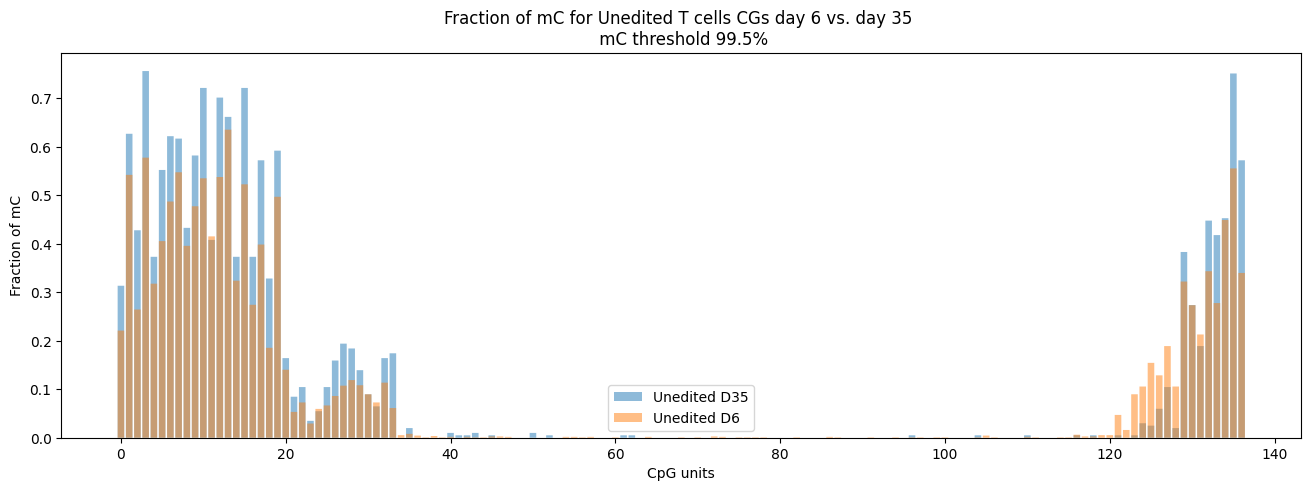

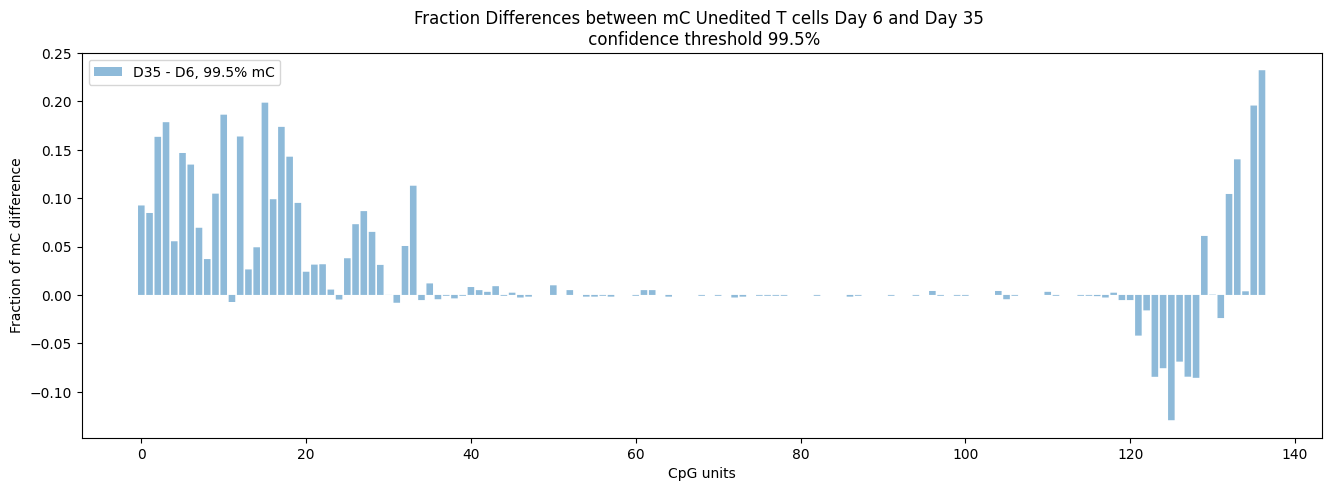

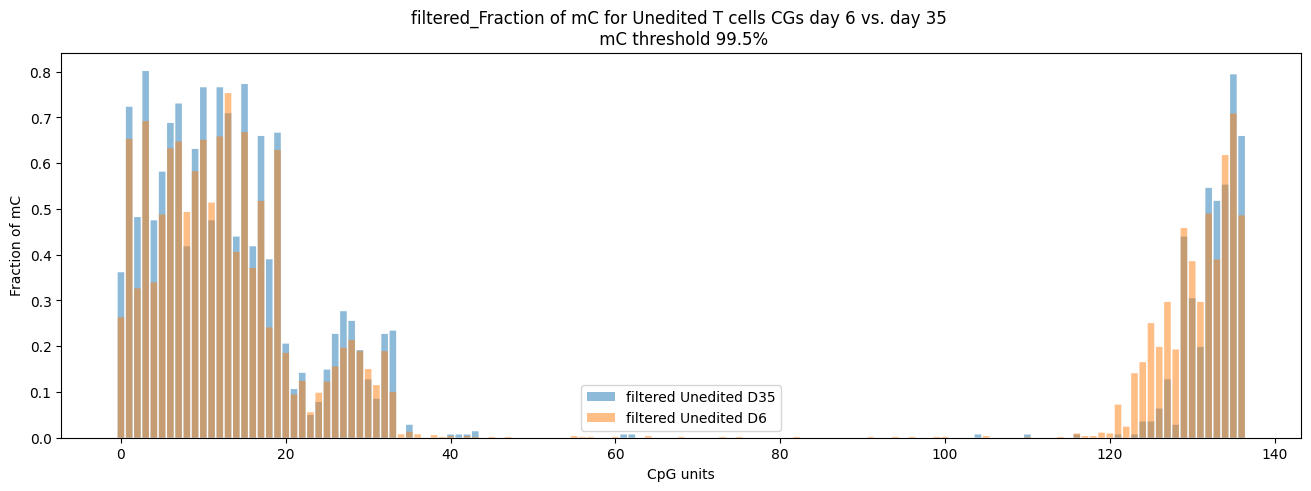

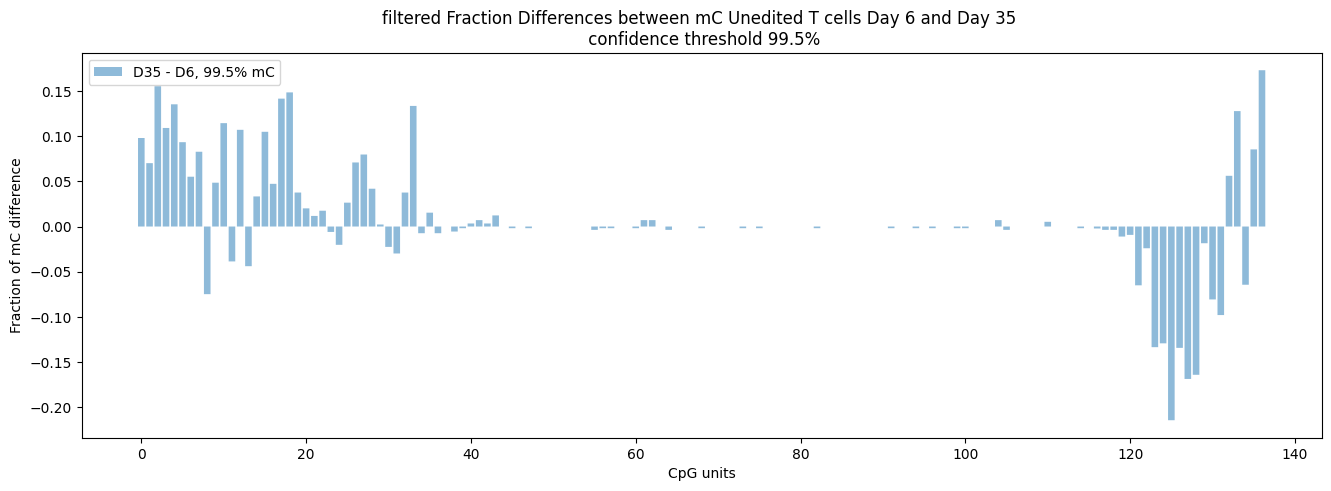

In [16]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_unedited_mc0995_fracs)), CGs_D35_unedited_mc0995_fracs, snap=False, alpha=0.5, label='Unedited D35')
plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='Unedited D6')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 6 vs. day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D6_mCthresh_0995 =   CGs_D35_unedited_mc0995_fracs  - CGs_D6_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='D35 - D6, 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()



plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(filtered_CGs_D35_unedited_mc0995_fracs)), filtered_CGs_D35_unedited_mc0995_fracs, snap=False, alpha=0.5, label='filtered Unedited D35')
plt.bar(np.arange(len(filtered_CGs_D6_unedited_mc0995_fracs)), filtered_CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='filtered Unedited D6')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('filtered_Fraction of mC for Unedited T cells CGs day 6 vs. day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D6_mCthresh_0995 =  filtered_CGs_D35_unedited_mc0995_fracs  - filtered_CGs_D6_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='D35 - D6, 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('filtered Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

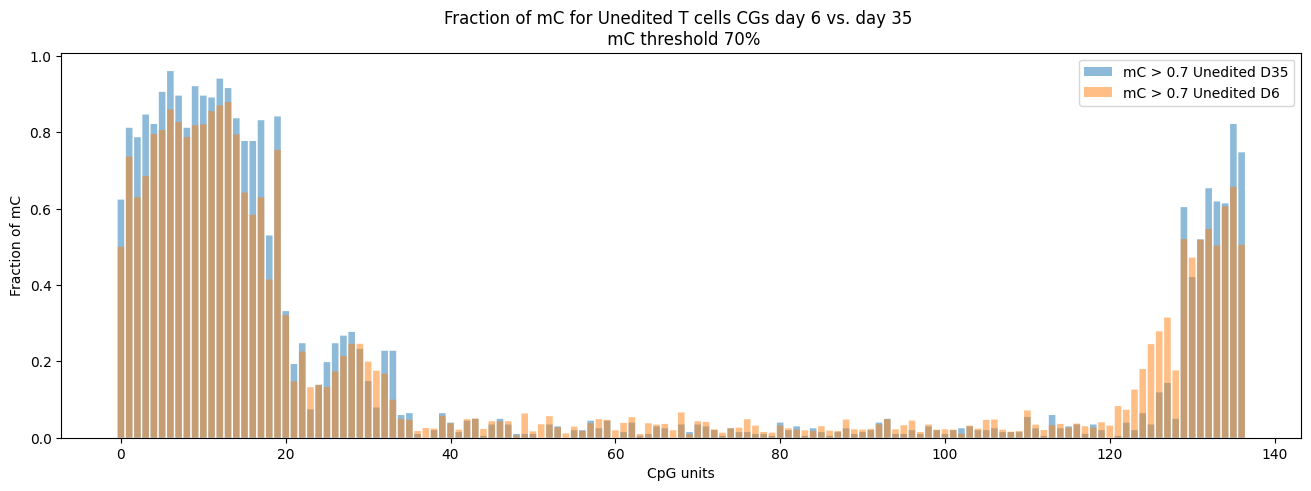

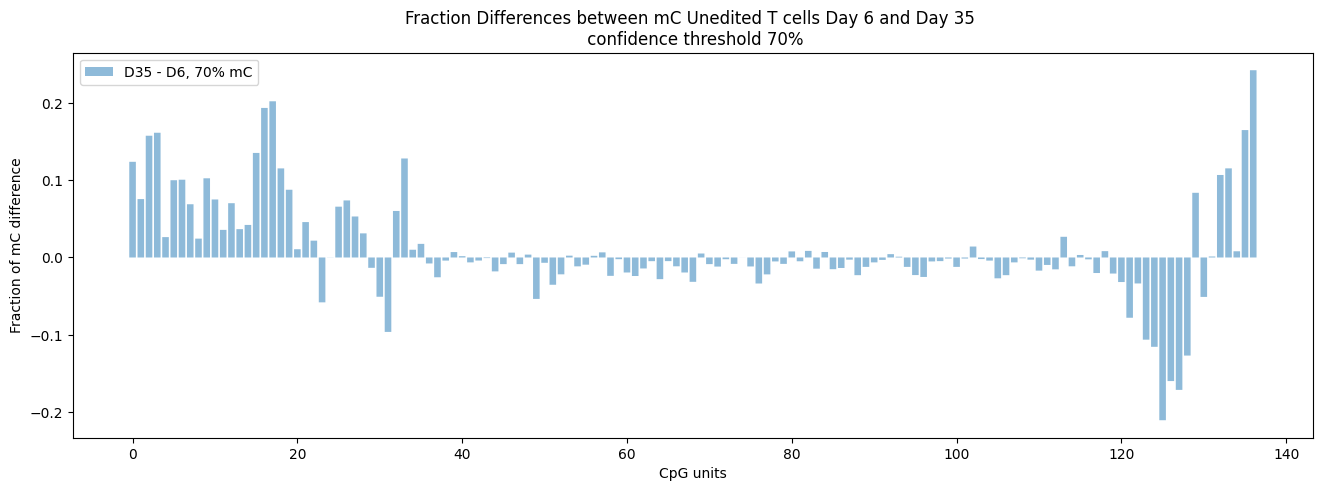

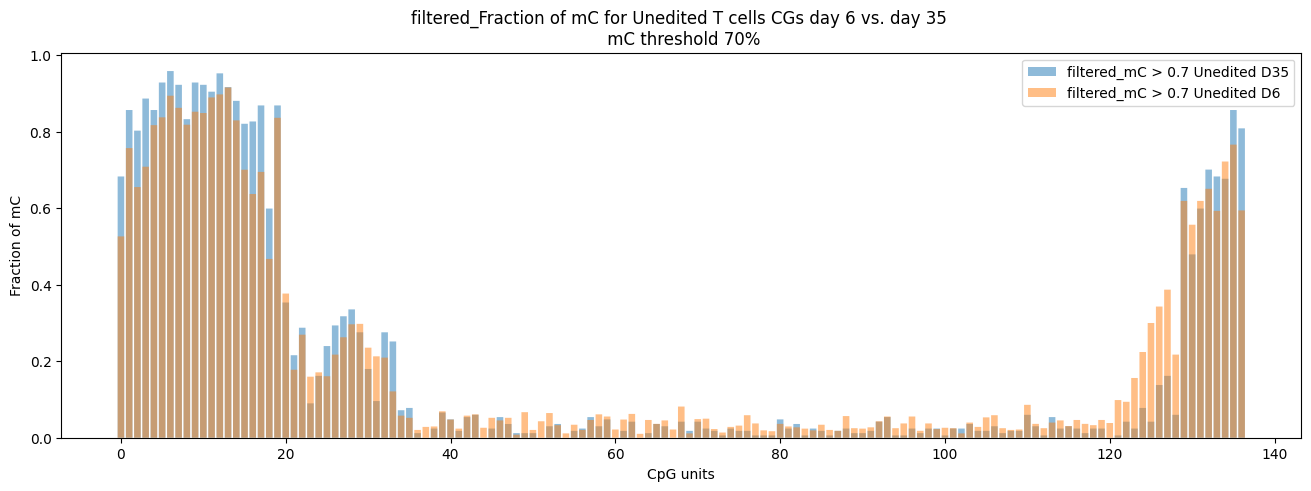

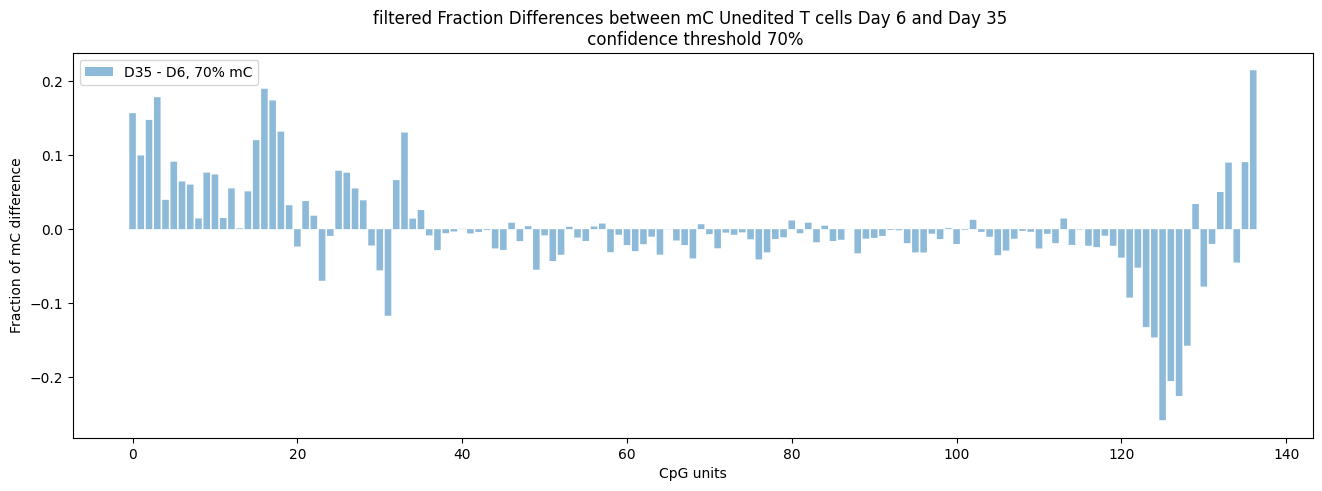

In [17]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_unedited_mc07_fracs)), CGs_D35_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited D35')
plt.bar(np.arange(len(CGs_D6_unedited_mc07_fracs)), CGs_D6_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited D6')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 6 vs. day 35 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D6_mCthresh_07 =   CGs_D35_unedited_mc07_fracs  - CGs_D6_unedited_mc07_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_07)), dif_D35_D6_mCthresh_07, snap=False, alpha=0.5, label='D35 - D6, 70% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()



plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(filtered_CGs_D35_unedited_mc07_fracs)), filtered_CGs_D35_unedited_mc07_fracs, snap=False, alpha=0.5, label='filtered_mC > 0.7 Unedited D35')
plt.bar(np.arange(len(filtered_CGs_D6_unedited_mc07_fracs)), filtered_CGs_D6_unedited_mc07_fracs, snap=False, alpha=0.5, label='filtered_mC > 0.7 Unedited D6')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('filtered_Fraction of mC for Unedited T cells CGs day 6 vs. day 35 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D6_mCthresh_07 =  filtered_CGs_D35_unedited_mc07_fracs  - filtered_CGs_D6_unedited_mc07_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_07)), dif_D35_D6_mCthresh_07, snap=False, alpha=0.5, label='D35 - D6, 70% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('filtered Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()

# Sample same sizes of reads

In [20]:
filtered_CGs_D35_unedited_mc07.shape, filtered_CGs_D6_unedited_mc07.shape

((167, 137), (884, 137))

In [21]:
def balance_datasets(CGs_all_silenced, CGs_all_unedited):
    """Balances two datasets by downsampling the larger one to match the size of the smaller one."""
    if CGs_all_silenced.shape[0] > CGs_all_unedited.shape[0]:
        print("Silenced has more reads than unedited")
        # Assuming CGs_all_silenced is your NumPy array of shape (6657, 10)
        num_rows = CGs_all_silenced.shape[0]  # Total number of rows
        subset_size = CGs_all_unedited.shape[0] # 1743 # 1304  # Define how many rows you want to randomly select
        print('subset_size = ', subset_size)

        # Randomly select row indices
        random_indices = np.random.choice(num_rows, subset_size, replace=False)

        # Get the subset
        subset = CGs_all_silenced[random_indices]

        # Display the shape to confirm
        print(subset.shape)  # Should be (subset_size, 10)

        CGs_all_silenced = subset
        CGs_all_silenced

    else:
        print("Unedited has more reads than silenced")
        # Assuming CGs_all_silenced is your NumPy array of shape (6657, 10)
        num_rows = CGs_all_unedited.shape[0]  # Total number of rows
        subset_size = CGs_all_silenced.shape[0] # 1743 # 1304  # Define how many rows you want to randomly select
        print('subset_size = ', subset_size)

        # Randomly select row indices
        random_indices = np.random.choice(num_rows, subset_size, replace=False)

        # Get the subset
        subset = CGs_all_unedited[random_indices]

        # Display the shape to confirm
        print(subset.shape)  # Should be (subset_size, 10)

        CGs_all_unedited = subset
        CGs_all_unedited
    print("Final shapes after balancing:")
    print(CGs_all_silenced.shape[0], CGs_all_unedited.shape[0])

    return CGs_all_silenced, CGs_all_unedited

CGs_D6_CRoff_mc07_bal, CGs_D6_unedited_mc07_bal = balance_datasets(CGs_D6_CRoff_mc07, CGs_D6_unedited_mc07)

Silenced has more reads than unedited
subset_size =  1134
(1134, 137)
Final shapes after balancing:
1134 1134


Unedited has more reads than silenced
subset_size =  167
(167, 137)
Final shapes after balancing:
167 167


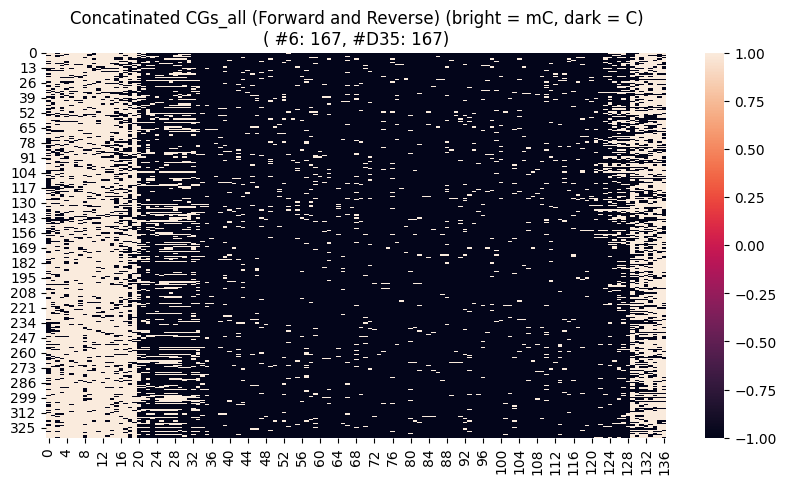

In [22]:
filtered_CGs_D35_unedited_mc07_bal, filtered_CGs_D6_unedited_mc07_bal = balance_datasets(filtered_CGs_D35_unedited_mc07, filtered_CGs_D6_unedited_mc07)

X_unedited_silenced = np.concatenate((filtered_CGs_D6_unedited_mc07_bal, filtered_CGs_D35_unedited_mc07_bal ), axis=0)
X_unedited_silenced, X_unedited_silenced.shape

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(X_unedited_silenced).fillna(-1))
plt.title(f"Concatinated CGs_all (Forward and Reverse) (bright = mC, dark = C)\n( #6: {filtered_CGs_D6_unedited_mc07_bal.shape[0]}, #D35: {filtered_CGs_D35_unedited_mc07_bal.shape[0]})")
plt.show()


Unedited has more reads than silenced
subset_size =  167
(167, 137)
Final shapes after balancing:
167 167


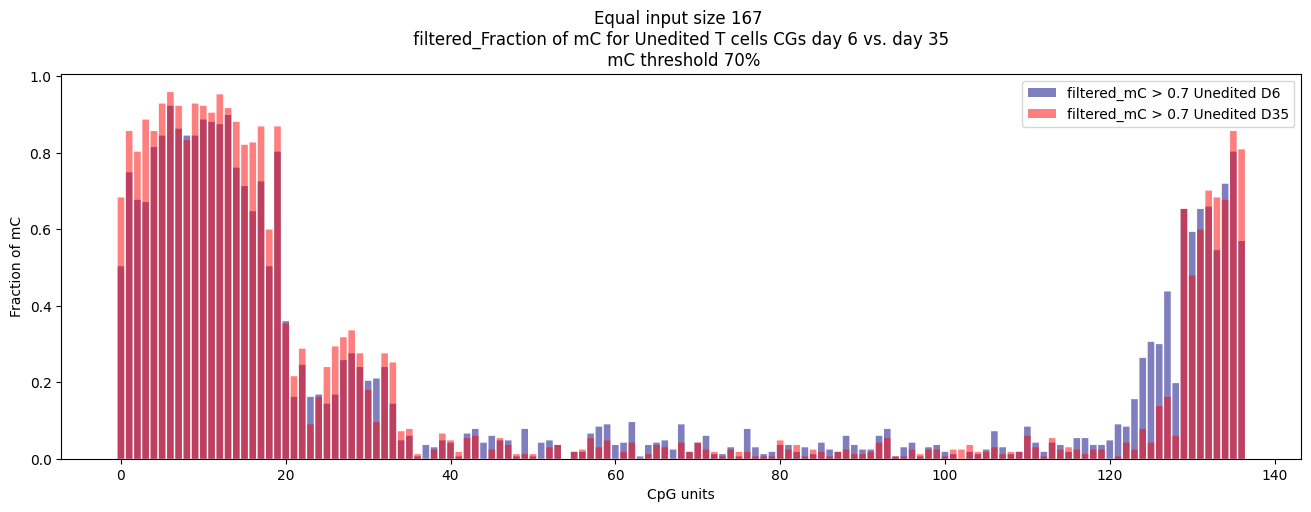

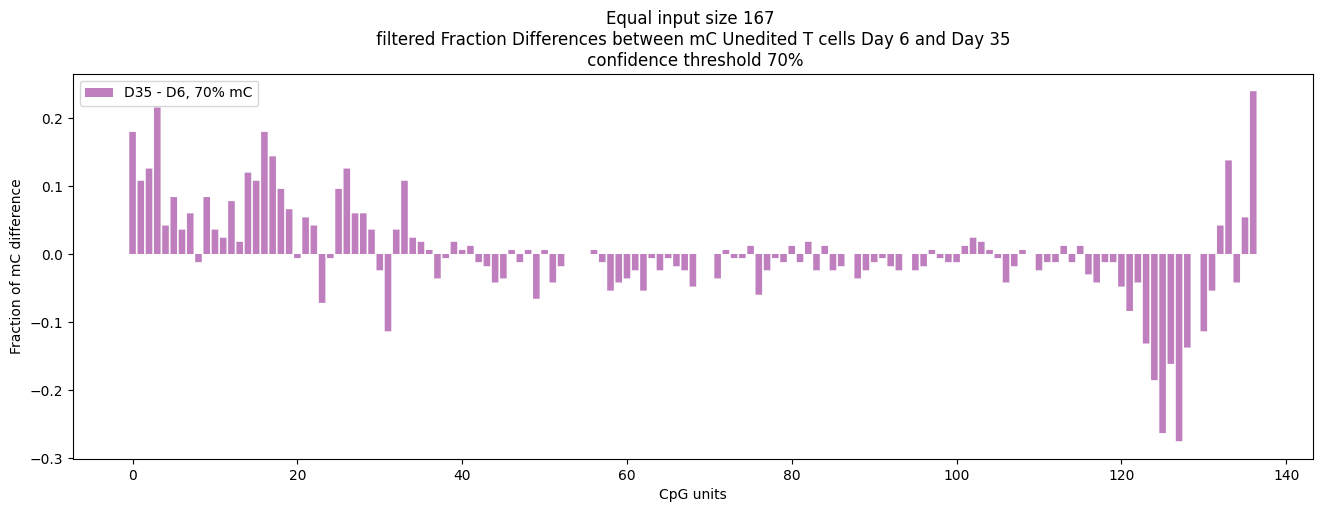

In [23]:
filtered_CGs_D35_unedited_mc07_bal, filtered_CGs_D6_unedited_mc07_bal = balance_datasets(filtered_CGs_D35_unedited_mc07, filtered_CGs_D6_unedited_mc07)
# filtered_CGs_D35_unedited_mc07_bal, filtered_CGs_D6_unedited_mc07_bal

filtered_CGs_D35_unedited_mc07_bal_fracs = get_fractions(filtered_CGs_D35_unedited_mc07_bal)
filtered_CGs_D6_unedited_mc07_bal_fracs = get_fractions(filtered_CGs_D6_unedited_mc07_bal)

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(filtered_CGs_D6_unedited_mc07_bal_fracs)), filtered_CGs_D6_unedited_mc07_bal_fracs, snap=False, alpha=0.5, label='filtered_mC > 0.7 Unedited D6', color='navy')
plt.bar(np.arange(len(filtered_CGs_D35_unedited_mc07_bal_fracs)), filtered_CGs_D35_unedited_mc07_bal_fracs, snap=False, alpha=0.5, label='filtered_mC > 0.7 Unedited D35', color='red')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title(f'Equal input size {filtered_CGs_D6_unedited_mc07_bal.shape[0]} \n filtered_Fraction of mC for Unedited T cells CGs day 6 vs. day 35 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D6_mCthresh_07 =  filtered_CGs_D35_unedited_mc07_bal_fracs  - filtered_CGs_D6_unedited_mc07_bal_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_07)), dif_D35_D6_mCthresh_07, snap=False, alpha=0.5, label='D35 - D6, 70% mC', color='purple' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title(f'Equal input size {filtered_CGs_D6_unedited_mc07_bal.shape[0]} \n filtered Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()

Unedited has more reads than silenced
subset_size =  141
(141, 137)
Final shapes after balancing:
141 141


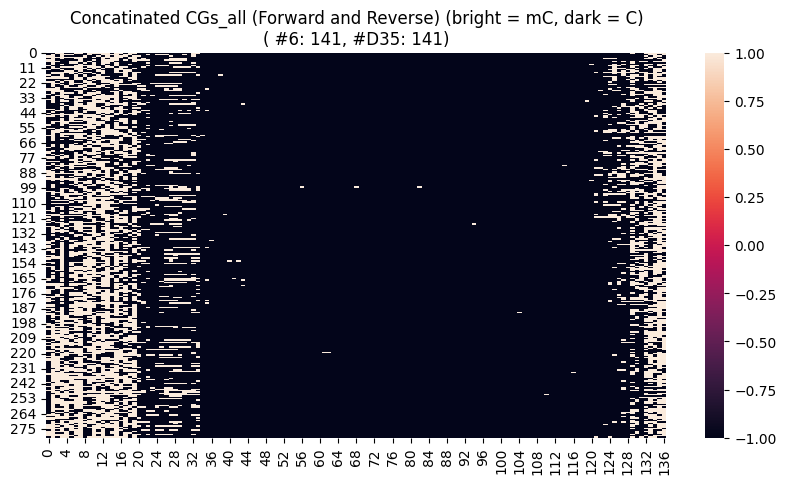

In [24]:
filtered_CGs_D35_unedited_mc0995_bal, filtered_CGs_D6_unedited_mc0995_bal = balance_datasets(filtered_CGs_D35_unedited_mc0995, filtered_CGs_D6_unedited_mc0995)

X_unedited_silenced = np.concatenate((filtered_CGs_D6_unedited_mc0995_bal, filtered_CGs_D35_unedited_mc0995_bal ), axis=0)
X_unedited_silenced, X_unedited_silenced.shape

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(X_unedited_silenced).fillna(-1))
plt.title(f"Concatinated CGs_all (Forward and Reverse) (bright = mC, dark = C)\n( #6: {filtered_CGs_D6_unedited_mc0995_bal.shape[0]}, #D35: {filtered_CGs_D35_unedited_mc0995_bal.shape[0]})")
plt.show()


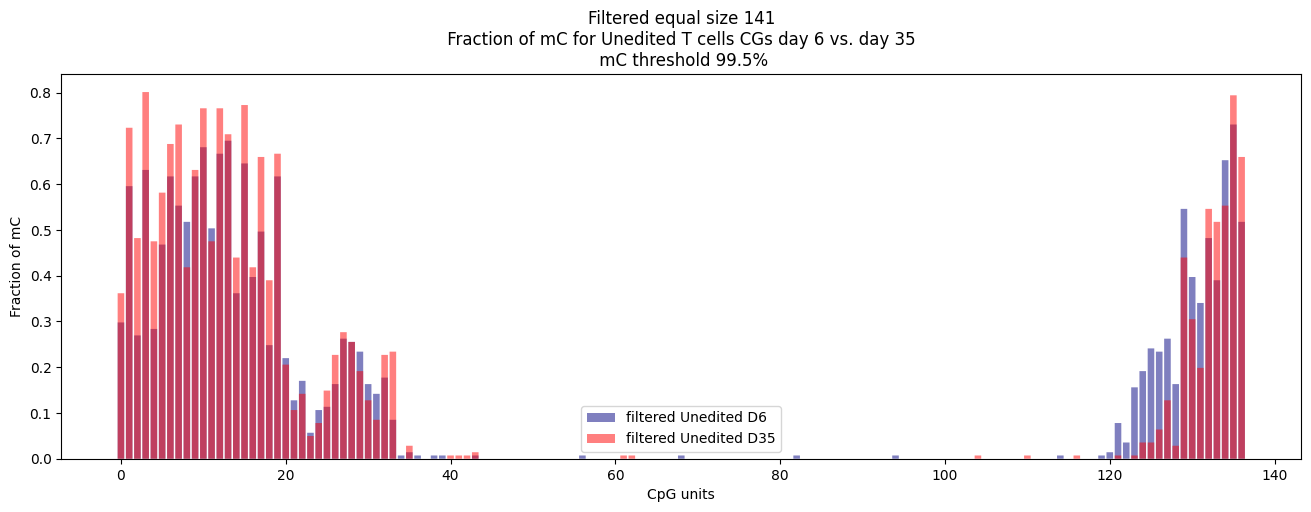

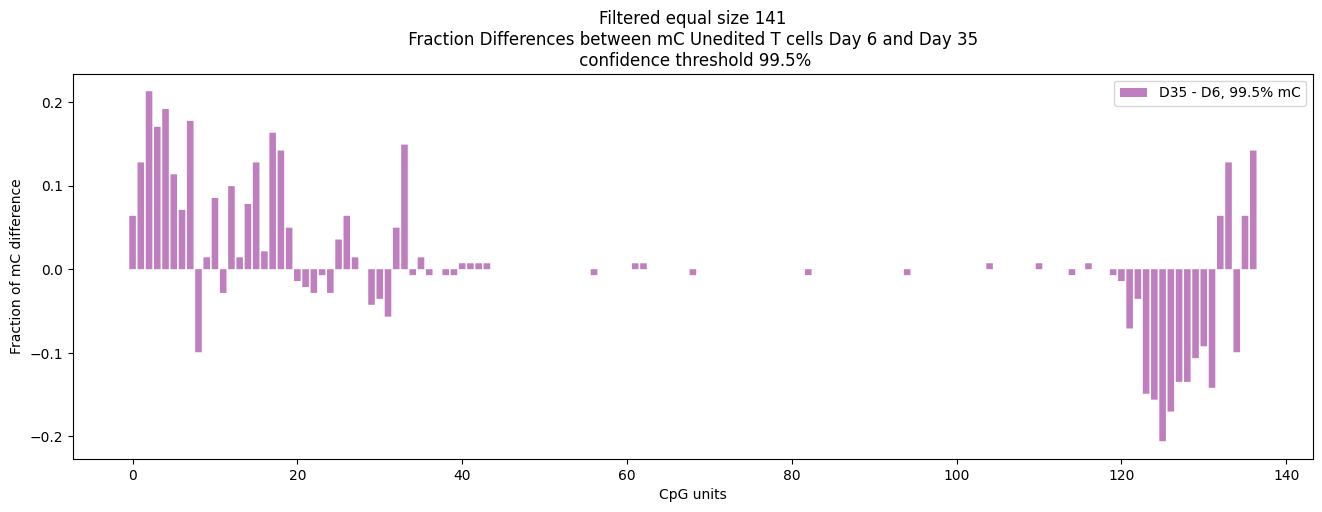

In [25]:

filtered_CGs_D35_unedited_mc0995_bal_fracs = get_fractions(filtered_CGs_D35_unedited_mc0995_bal)
filtered_CGs_D6_unedited_mc0995_bal_fracs = get_fractions(filtered_CGs_D6_unedited_mc0995_bal)


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(filtered_CGs_D6_unedited_mc0995_fracs)), filtered_CGs_D6_unedited_mc0995_bal_fracs, snap=False, alpha=0.5, label='filtered Unedited D6',color='navy')
plt.bar(np.arange(len(filtered_CGs_D35_unedited_mc0995_fracs)), filtered_CGs_D35_unedited_mc0995_bal_fracs, snap=False, alpha=0.5, label='filtered Unedited D35', color='red')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title(f'Filtered equal size {filtered_CGs_D6_unedited_mc0995_bal.shape[0]}\n Fraction of mC for Unedited T cells CGs day 6 vs. day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D6_mCthresh_0995 =  filtered_CGs_D35_unedited_mc0995_bal_fracs  - filtered_CGs_D6_unedited_mc0995_bal_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='D35 - D6, 99.5% mC', color='purple' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title(f'Filtered equal size {filtered_CGs_D6_unedited_mc0995_bal.shape[0]}\n Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()


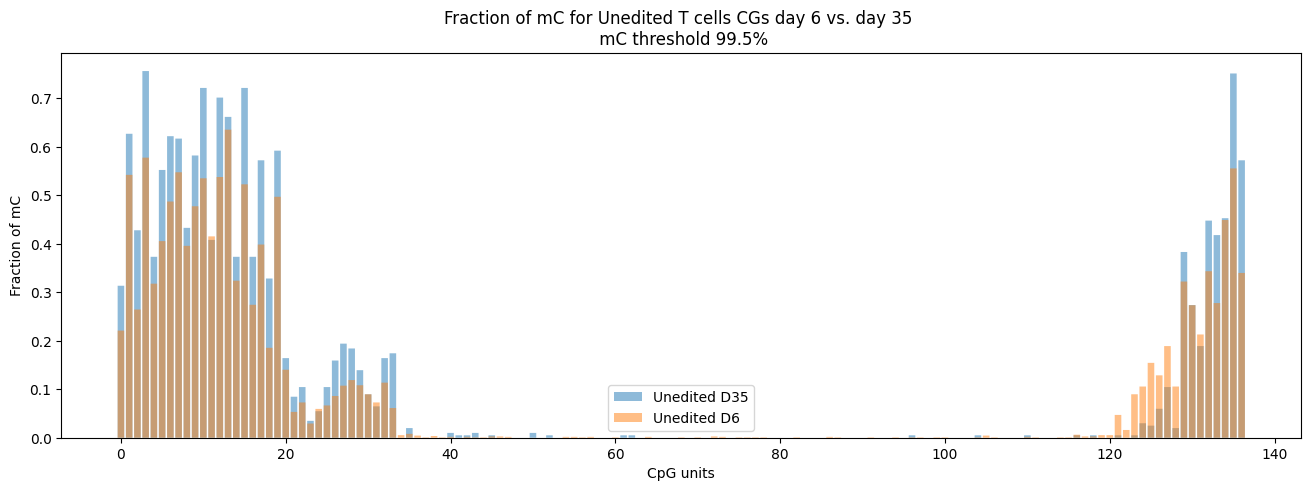

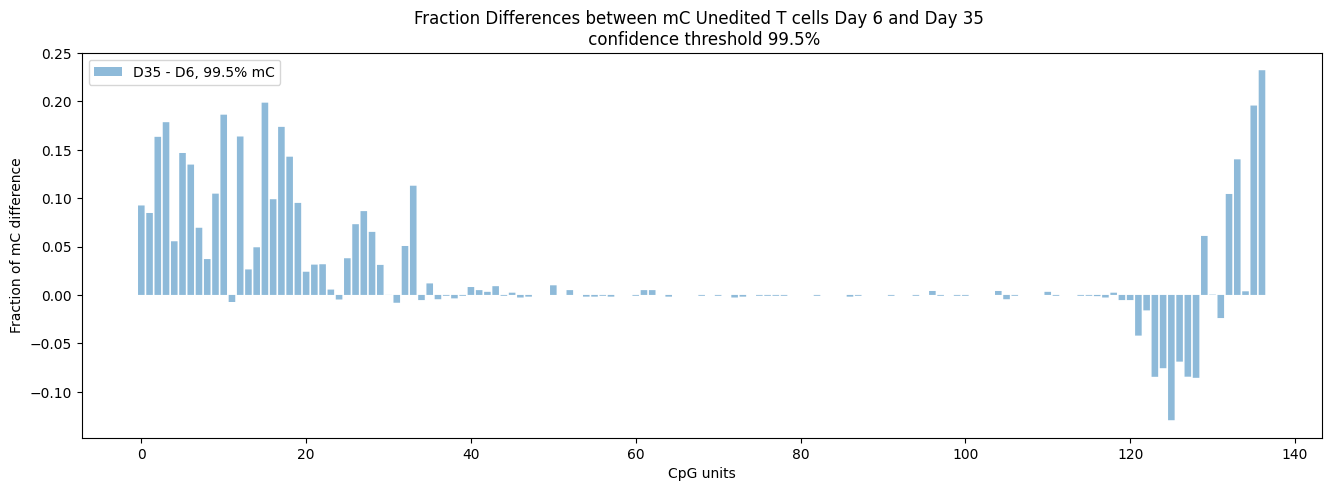

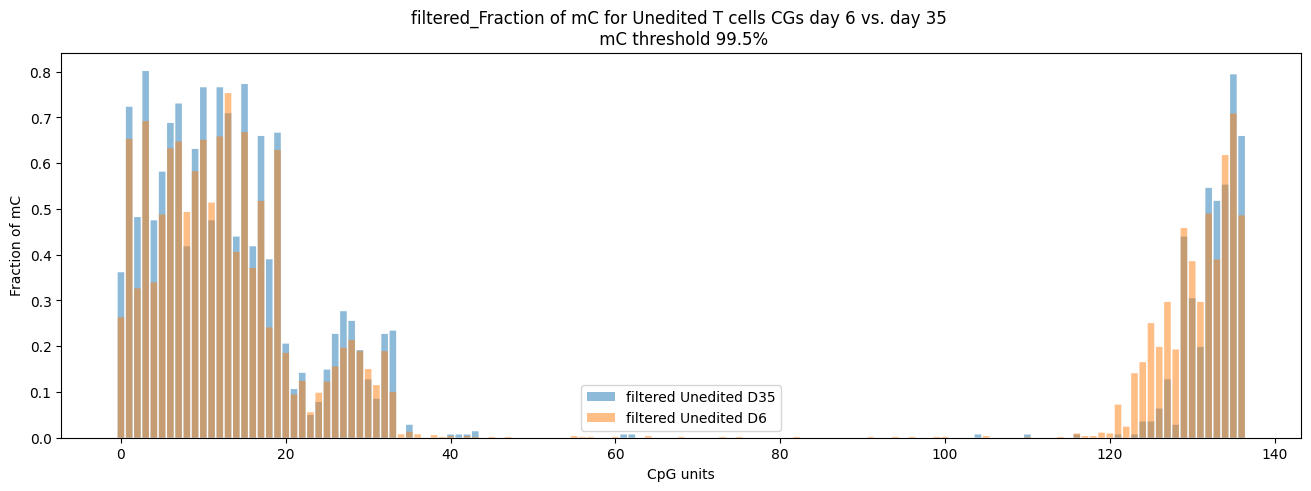

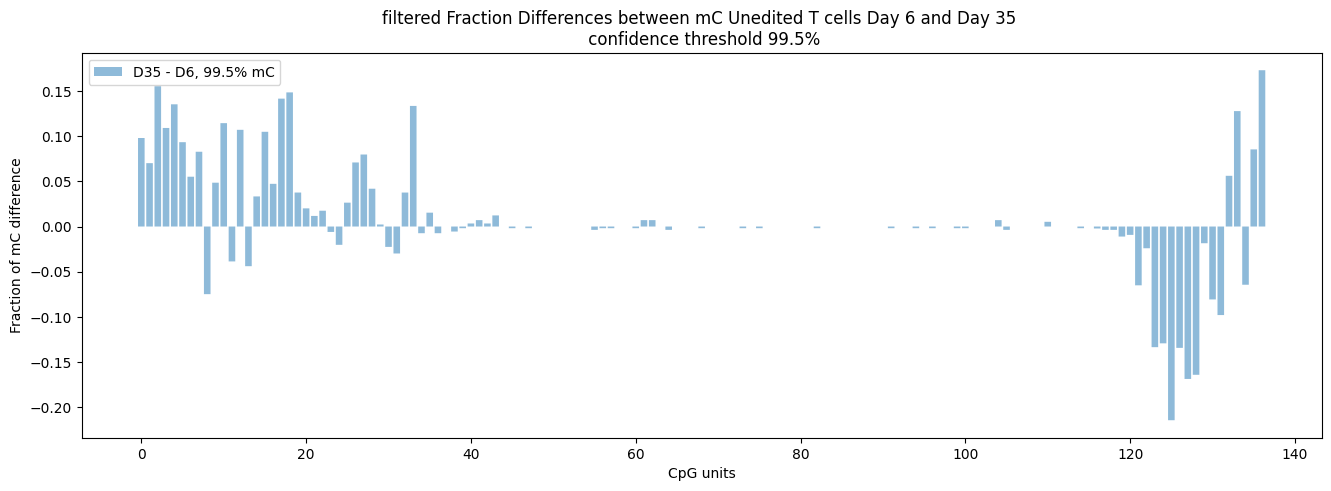

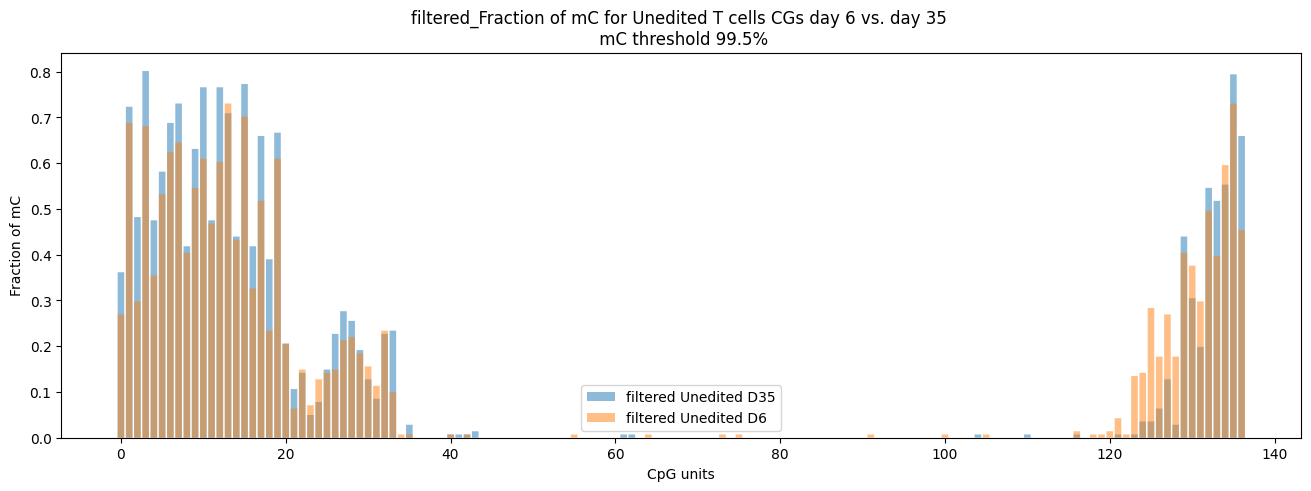

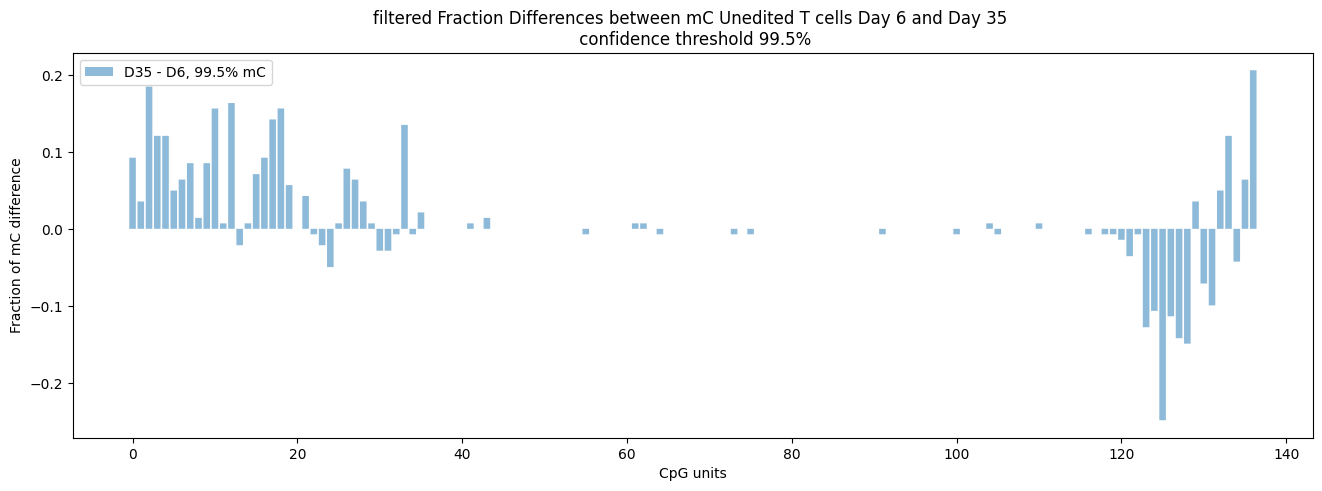

In [90]:

# filtered_CGs_D35_unedited_mc0995_bal_fracs = get_fractions(filtered_CGs_D35_unedited_mc0995_bal)
# filtered_CGs_D6_unedited_mc0995_bal_fracs = get_fractions(filtered_CGs_D6_unedited_mc0995_bal)


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_unedited_mc0995_fracs)), CGs_D35_unedited_mc0995_fracs, snap=False, alpha=0.5, label='Unedited D35')
plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='Unedited D6')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 6 vs. day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D6_mCthresh_0995 =   CGs_D35_unedited_mc0995_fracs  - CGs_D6_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='D35 - D6, 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()



plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(filtered_CGs_D35_unedited_mc0995_fracs)), filtered_CGs_D35_unedited_mc0995_fracs, snap=False, alpha=0.5, label='filtered Unedited D35')
plt.bar(np.arange(len(filtered_CGs_D6_unedited_mc0995_fracs)), filtered_CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='filtered Unedited D6')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('filtered_Fraction of mC for Unedited T cells CGs day 6 vs. day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D6_mCthresh_0995 =  filtered_CGs_D35_unedited_mc0995_fracs  - filtered_CGs_D6_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='D35 - D6, 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('filtered Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()




plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(filtered_CGs_D35_unedited_mc0995_fracs)), filtered_CGs_D35_unedited_mc0995_bal_fracs, snap=False, alpha=0.5, label='filtered Unedited D35')
plt.bar(np.arange(len(filtered_CGs_D6_unedited_mc0995_fracs)), filtered_CGs_D6_unedited_mc0995_bal_fracs, snap=False, alpha=0.5, label='filtered Unedited D6')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('filtered_Fraction of mC for Unedited T cells CGs day 6 vs. day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D6_mCthresh_0995 =  filtered_CGs_D35_unedited_mc0995_bal_fracs  - filtered_CGs_D6_unedited_mc0995_bal_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='D35 - D6, 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('filtered Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()


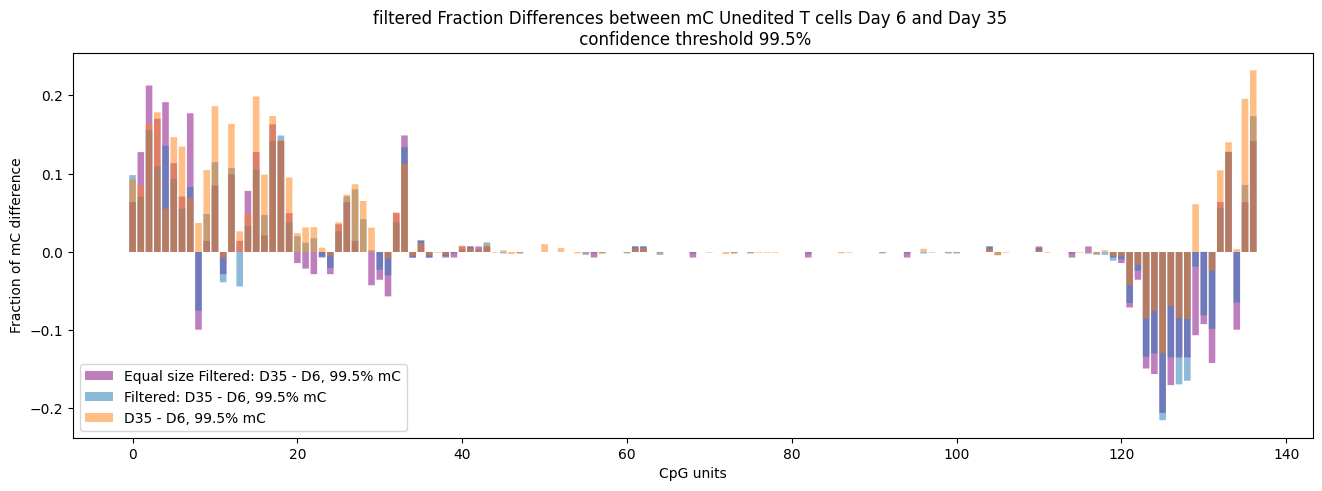

In [26]:

filtered_CGs_D35_unedited_mc0995_bal_fracs = get_fractions(filtered_CGs_D35_unedited_mc0995_bal)
filtered_CGs_D6_unedited_mc0995_bal_fracs = get_fractions(filtered_CGs_D6_unedited_mc0995_bal)
 
# DIFFERENCES


plt.figure(figsize=(16, 5)) 
# DIFFERENCES

dif_D35_D6_mCthresh_0995 =  filtered_CGs_D35_unedited_mc0995_bal_fracs  - filtered_CGs_D6_unedited_mc0995_bal_fracs 
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='Equal size Filtered: D35 - D6, 99.5% mC', color='purple' )



# DIFFERENCES

dif_D35_D6_mCthresh_0995 =  filtered_CGs_D35_unedited_mc0995_fracs  - filtered_CGs_D6_unedited_mc0995_fracs

# plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='Filtered: D35 - D6, 99.5% mC' )

dif_D35_D6_mCthresh_0995 =   CGs_D35_unedited_mc0995_fracs  - CGs_D6_unedited_mc0995_fracs

plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='D35 - D6, 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('filtered Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()


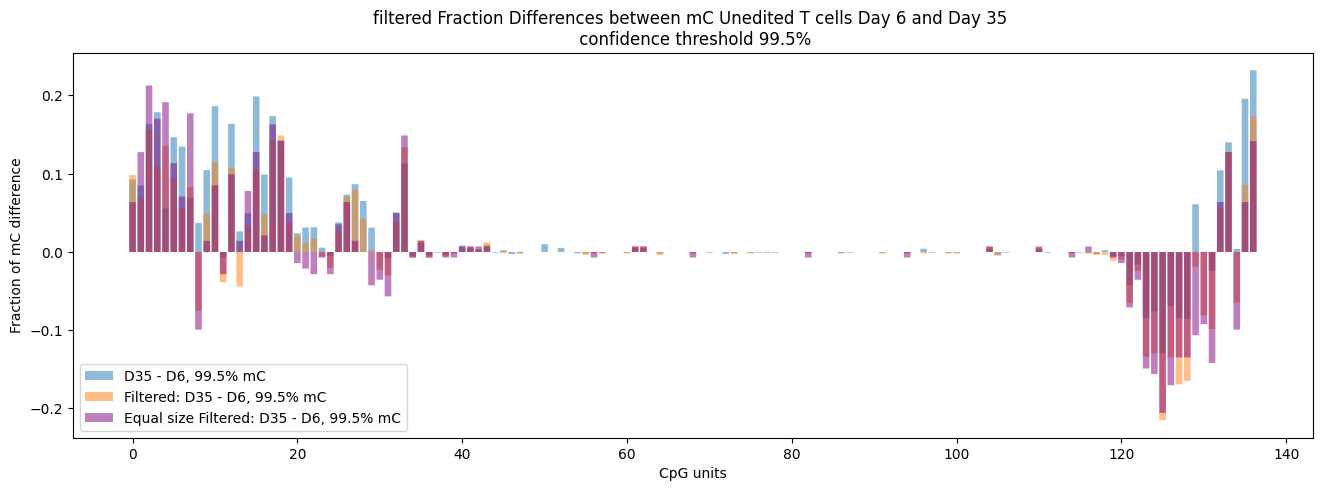

In [27]:

filtered_CGs_D35_unedited_mc0995_bal_fracs = get_fractions(filtered_CGs_D35_unedited_mc0995_bal)
filtered_CGs_D6_unedited_mc0995_bal_fracs = get_fractions(filtered_CGs_D6_unedited_mc0995_bal)
 
# DIFFERENCES


plt.figure(figsize=(16, 5)) 

dif_D35_D6_mCthresh_0995 =   CGs_D35_unedited_mc0995_fracs  - CGs_D6_unedited_mc0995_fracs

plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='D35 - D6, 99.5% mC' )


dif_D35_D6_mCthresh_0995 =  filtered_CGs_D35_unedited_mc0995_fracs  - filtered_CGs_D6_unedited_mc0995_fracs

# plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='Filtered: D35 - D6, 99.5% mC' )


dif_D35_D6_mCthresh_0995 =  filtered_CGs_D35_unedited_mc0995_bal_fracs  - filtered_CGs_D6_unedited_mc0995_bal_fracs 
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='Equal size Filtered: D35 - D6, 99.5% mC', color='purple' )




# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('filtered Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()


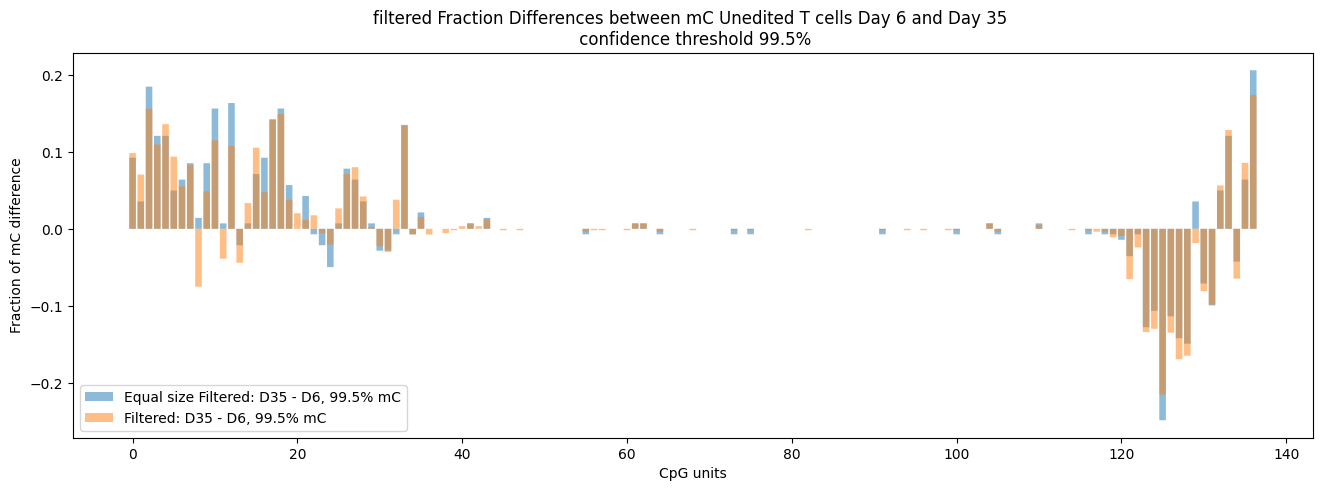

In [87]:


# DIFFERENCES

# dif_D35_D6_mCthresh_0995 =   CGs_D35_unedited_mc0995_fracs  - CGs_D6_unedited_mc0995_fracs

plt.figure(figsize=(16, 5)) 
# DIFFERENCES

dif_D35_D6_mCthresh_0995 =  filtered_CGs_D35_unedited_mc0995_bal_fracs  - filtered_CGs_D6_unedited_mc0995_bal_fracs

# plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='Equal size Filtered: D35 - D6, 99.5% mC' )

# DIFFERENCES
dif_D35_D6_mCthresh_0995 =  filtered_CGs_D35_unedited_mc0995_fracs  - filtered_CGs_D6_unedited_mc0995_fracs 
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='Filtered: D35 - D6, 99.5% mC' ) 
# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('filtered Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()


# On / off D 6, 35

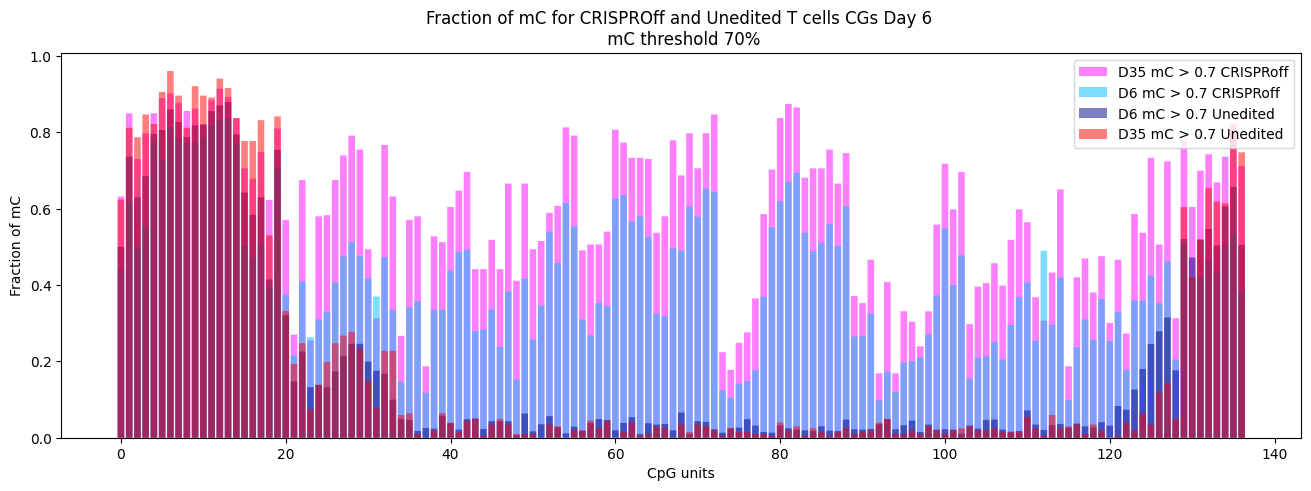

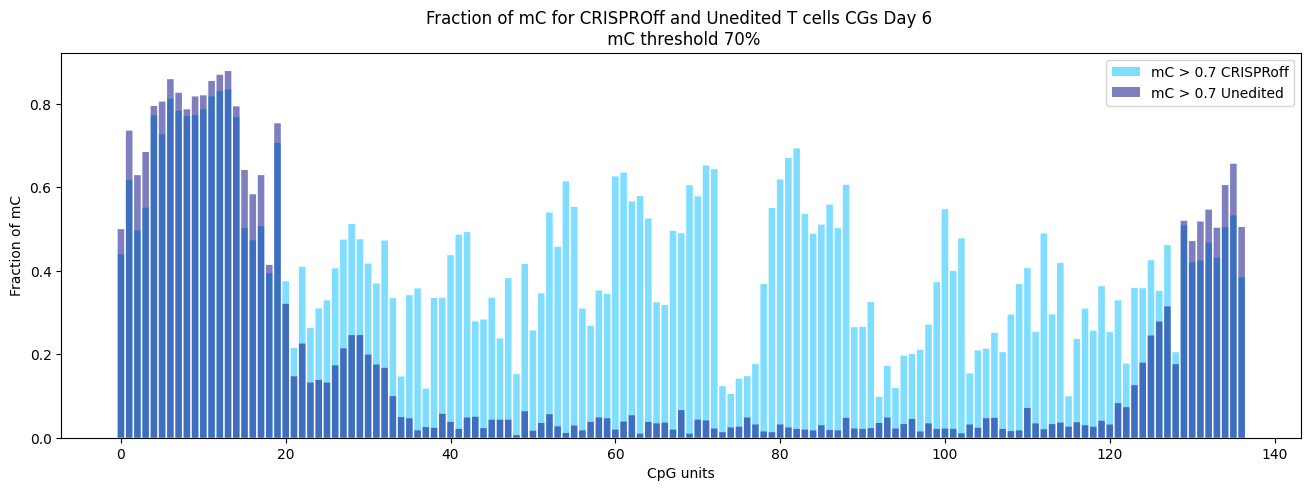

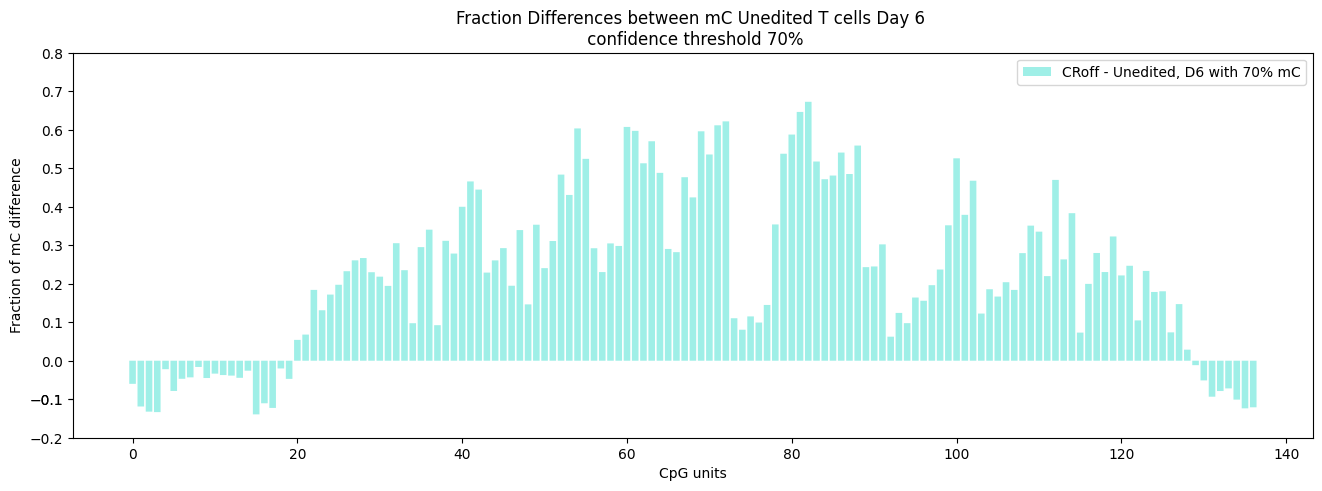

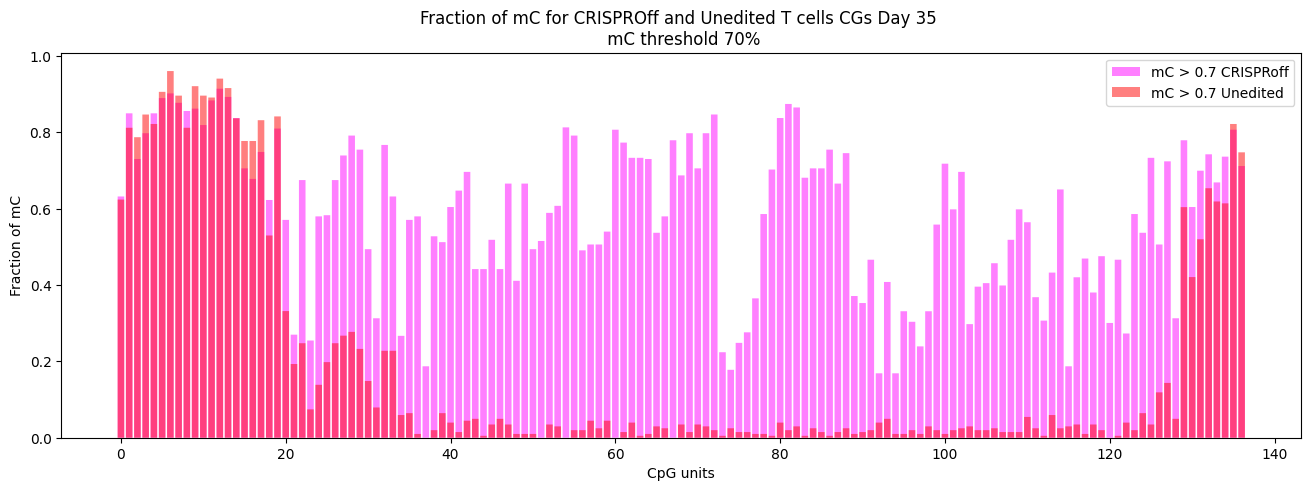

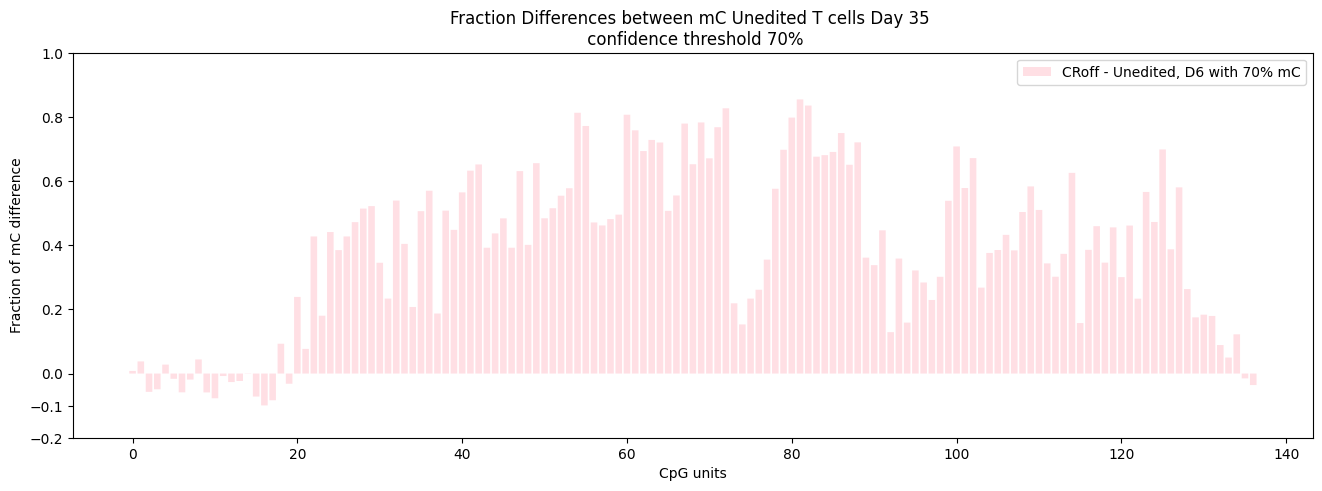

In [39]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_mc07_fracs)), CGs_D35_CRoff_mc07_fracs, snap=False, alpha=0.5, label='D35 mC > 0.7 CRISPRoff', color='magenta')

plt.bar(np.arange(len(CGs_D6_CRoff_mc07_fracs)), CGs_D6_CRoff_mc07_fracs, snap=False, alpha=0.5, label='D6 mC > 0.7 CRISPRoff', color='deepskyblue')
plt.bar(np.arange(len(CGs_D6_unedited_mc07_fracs)), CGs_D6_unedited_mc07_fracs, snap=False, alpha=0.5, label='D6 mC > 0.7 Unedited', color='navy')

plt.bar(np.arange(len(CGs_D35_unedited_mc07_fracs)), CGs_D35_unedited_mc07_fracs, snap=False, alpha=0.5, label='D35 mC > 0.7 Unedited', color='red')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 6 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()




# =======================
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_mc07_fracs)), CGs_D6_CRoff_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 CRISPRoff', color='deepskyblue')
plt.bar(np.arange(len(CGs_D6_unedited_mc07_fracs)), CGs_D6_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited', color='navy')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 6 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_7 =   CGs_D6_CRoff_mc07_fracs  - CGs_D6_unedited_mc07_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_7)), dif_D6_mCthresh_7, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 70% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])

plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_mc07_fracs)), CGs_D35_CRoff_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 CRISPRoff', color='magenta')
plt.bar(np.arange(len(CGs_D35_unedited_mc07_fracs)), CGs_D35_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited', color='red')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 35 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_7 =   CGs_D35_CRoff_mc07_fracs  - CGs_D35_unedited_mc07_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_7)), dif_D6_mCthresh_7, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 70% mC', color='pink'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])

plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()

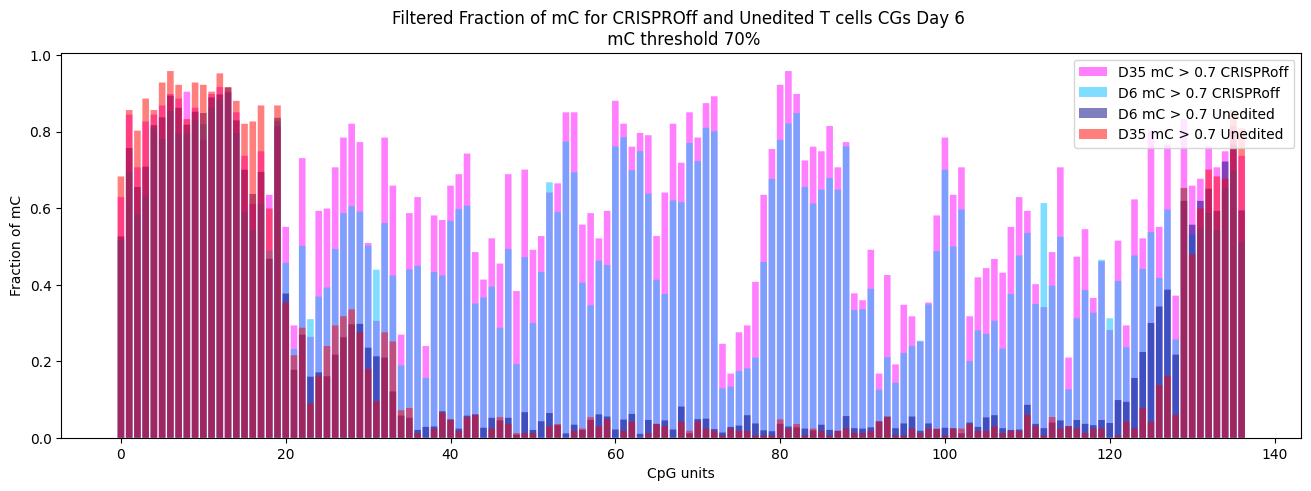

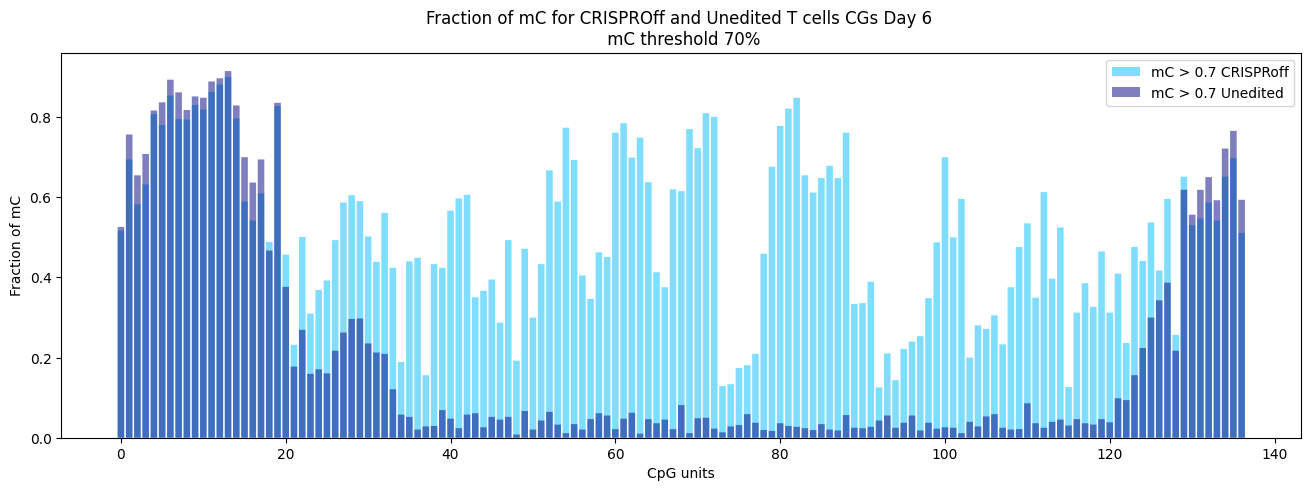

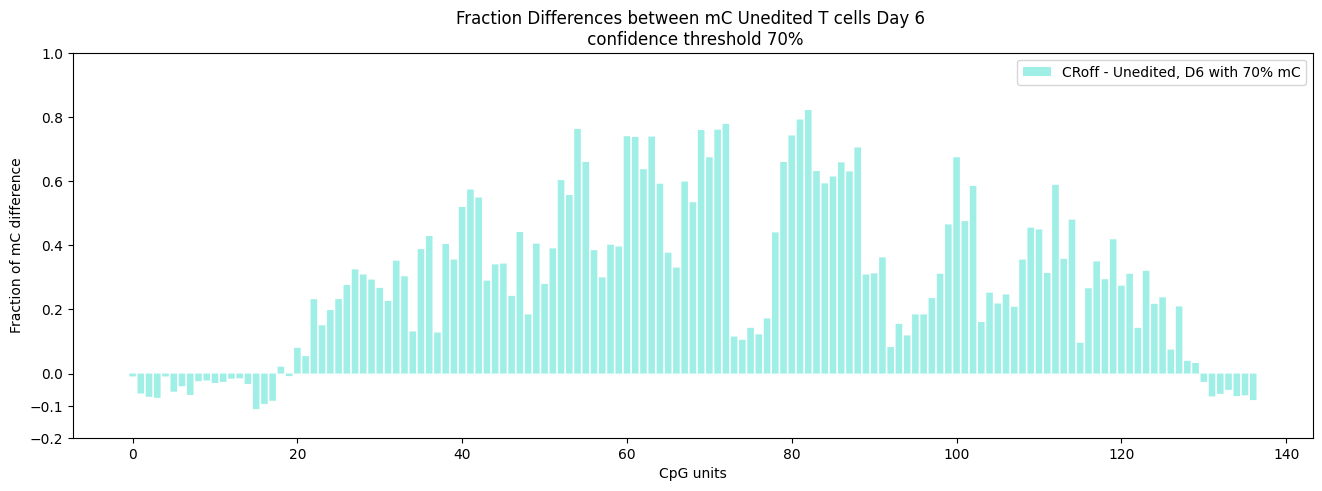

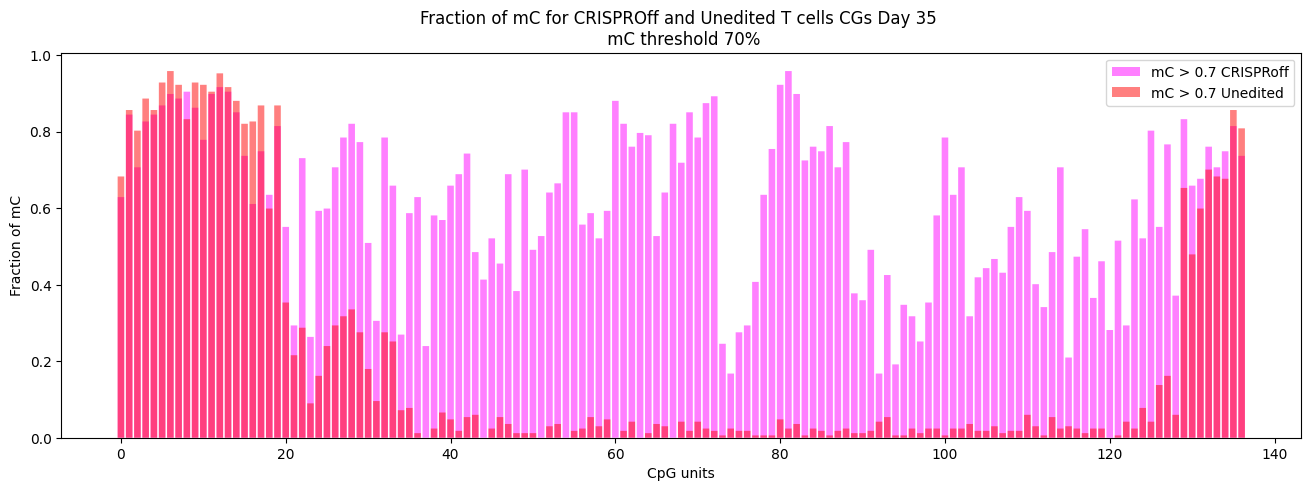

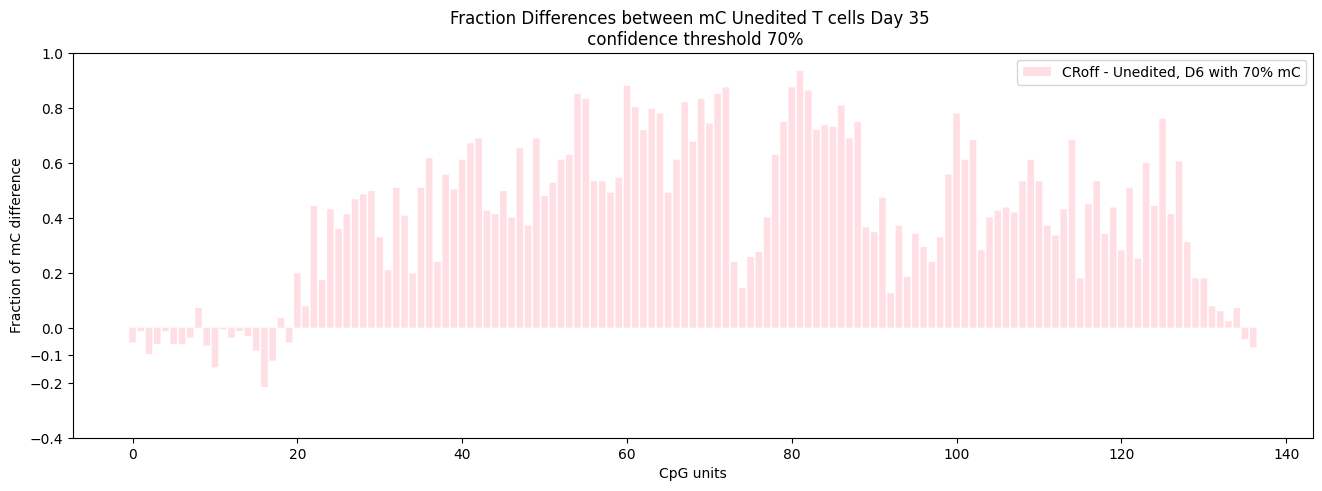

In [40]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(filtered_CGs_D35_CRoff_mc07_fracs)), filtered_CGs_D35_CRoff_mc07_fracs, snap=False, alpha=0.5, label='D35 mC > 0.7 CRISPRoff', color='magenta')

plt.bar(np.arange(len(filtered_CGs_D6_CRoff_mc07_fracs)), filtered_CGs_D6_CRoff_mc07_fracs, snap=False, alpha=0.5, label='D6 mC > 0.7 CRISPRoff', color='deepskyblue')
plt.bar(np.arange(len(filtered_CGs_D6_unedited_mc07_fracs)), filtered_CGs_D6_unedited_mc07_fracs, snap=False, alpha=0.5, label='D6 mC > 0.7 Unedited', color='navy')

plt.bar(np.arange(len(filtered_CGs_D35_unedited_mc07_fracs)), filtered_CGs_D35_unedited_mc07_fracs, snap=False, alpha=0.5, label='D35 mC > 0.7 Unedited', color='red')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Filtered Fraction of mC for CRISPROff and Unedited T cells CGs Day 6 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()




# =======================
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(filtered_CGs_D6_CRoff_mc07_fracs)), filtered_CGs_D6_CRoff_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 CRISPRoff', color='deepskyblue')
plt.bar(np.arange(len(filtered_CGs_D6_unedited_mc07_fracs)), filtered_CGs_D6_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited', color='navy')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 6 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_7 =   filtered_CGs_D6_CRoff_mc07_fracs  - filtered_CGs_D6_unedited_mc07_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_7)), dif_D6_mCthresh_7, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 70% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])

plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(filtered_CGs_D35_CRoff_mc07_fracs)), filtered_CGs_D35_CRoff_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 CRISPRoff', color='magenta')
plt.bar(np.arange(len(filtered_CGs_D35_unedited_mc07_fracs)), filtered_CGs_D35_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited', color='red')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 35 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_7 =   filtered_CGs_D35_CRoff_mc07_fracs  - filtered_CGs_D35_unedited_mc07_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_7)), dif_D6_mCthresh_7, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 70% mC', color='pink'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])

plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()

# 99.5 vs 70

# 99.5% mC confs

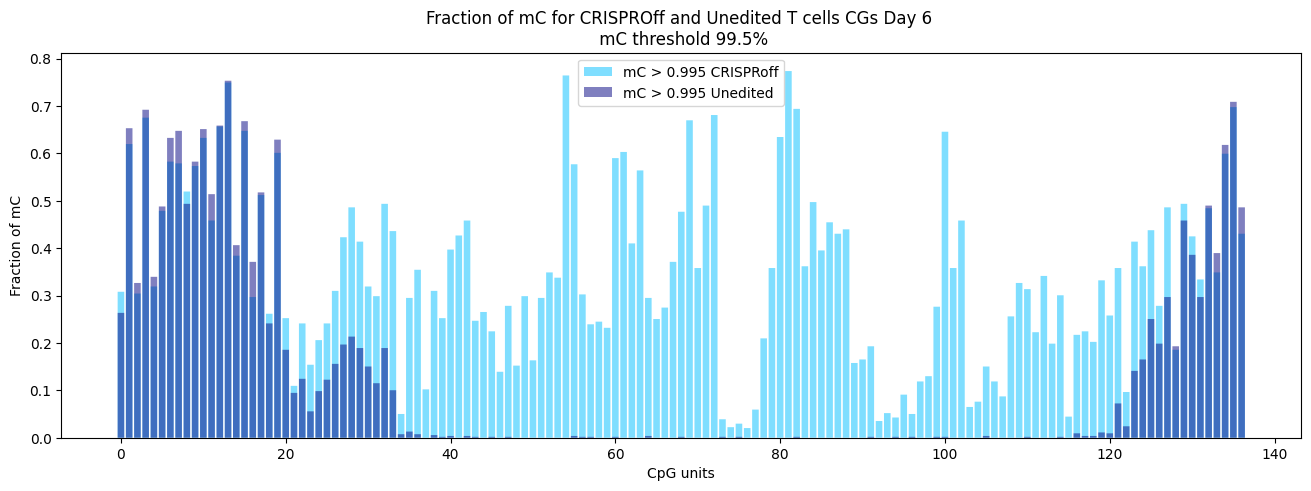

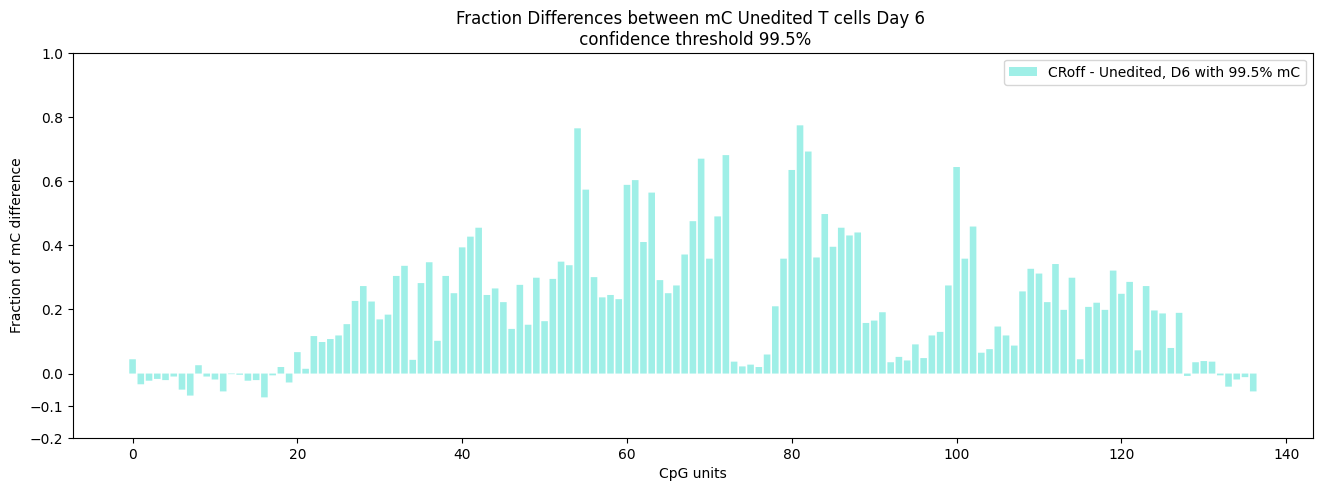

In [29]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(filtered_CGs_D6_CRoff_mc0995_fracs)), filtered_CGs_D6_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 CRISPRoff', color='deepskyblue')
plt.bar(np.arange(len(filtered_CGs_D6_unedited_mc0995_fracs)), filtered_CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='navy')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 6 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995 =   filtered_CGs_D6_CRoff_mc0995_fracs  - filtered_CGs_D6_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 99.5% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])

plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

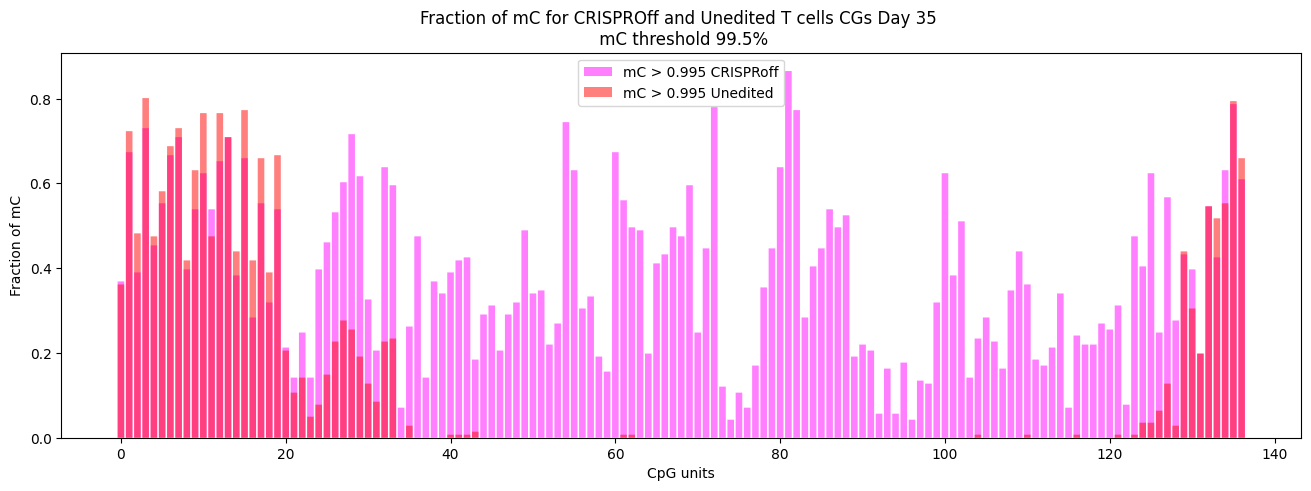

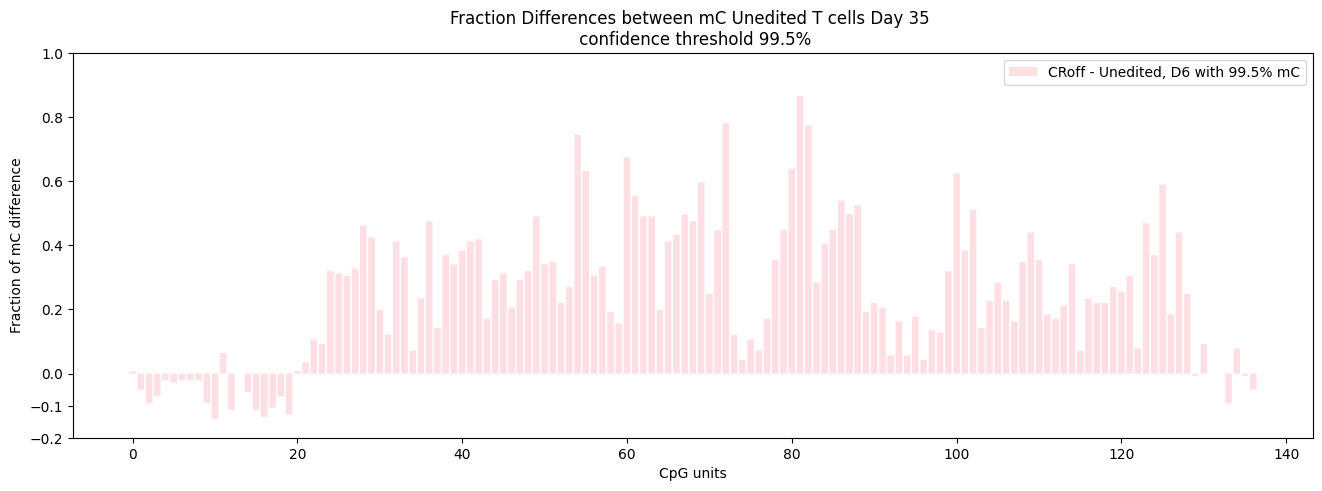

In [36]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(filtered_CGs_D35_CRoff_mc0995_fracs)), filtered_CGs_D35_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 CRISPRoff', color='magenta')
plt.bar(np.arange(len(filtered_CGs_D35_unedited_mc0995_fracs)), filtered_CGs_D35_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='red')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995 =   filtered_CGs_D35_CRoff_mc0995_fracs  - filtered_CGs_D35_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 99.5% mC', color='pink'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])

plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

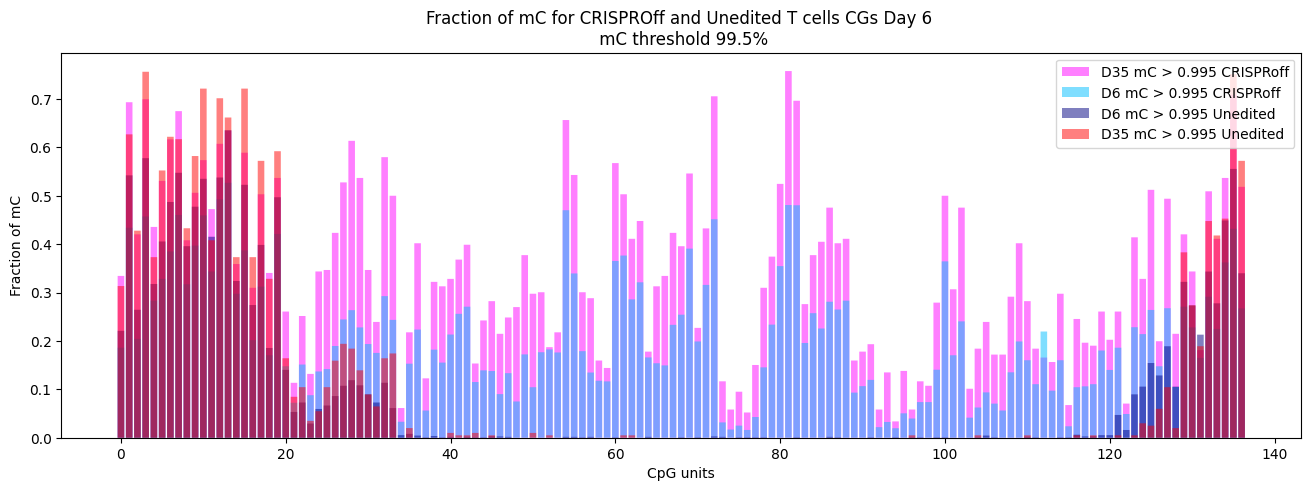

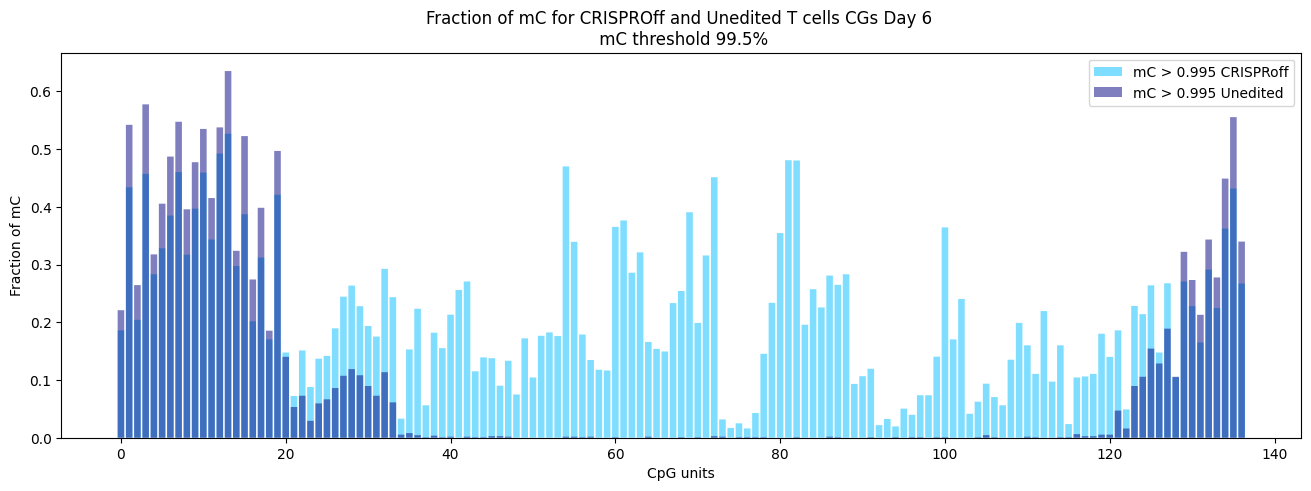

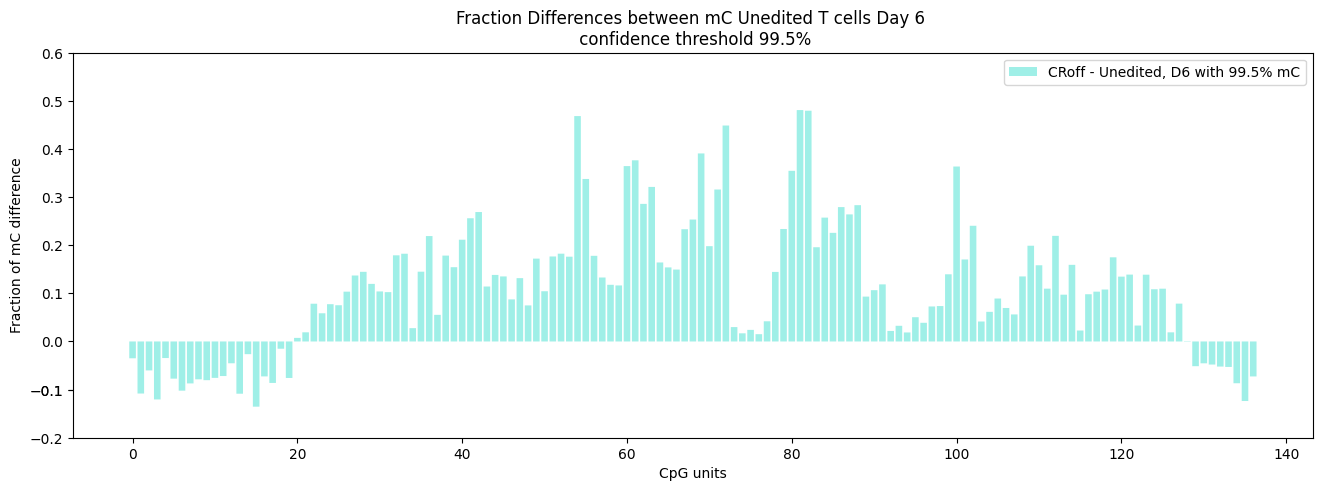

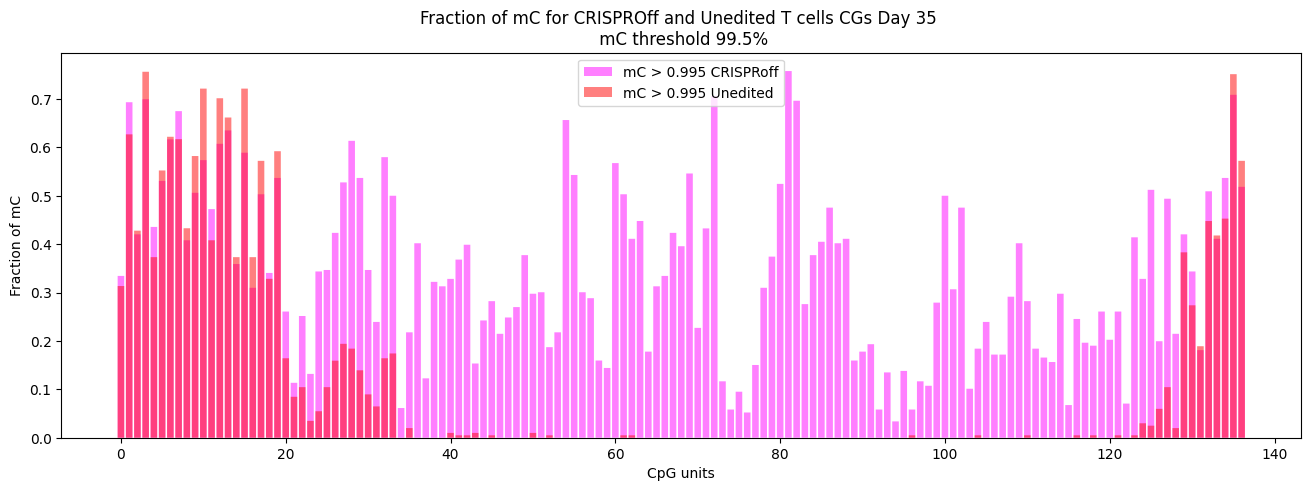

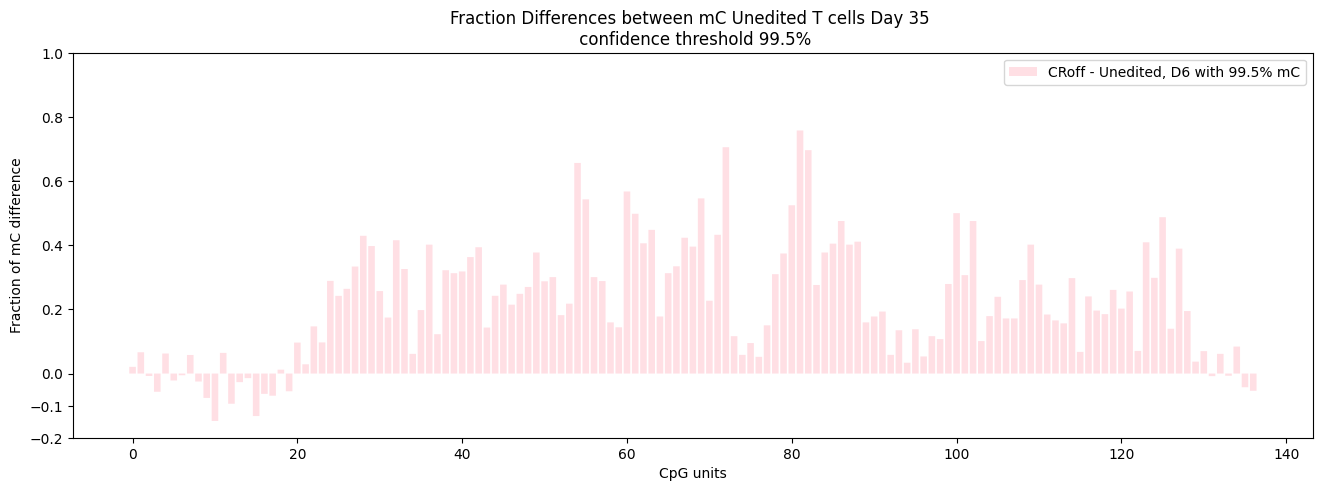

In [35]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_mc0995_fracs)), CGs_D35_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='D35 mC > 0.995 CRISPRoff', color='magenta')

plt.bar(np.arange(len(CGs_D6_CRoff_mc0995_fracs)), CGs_D6_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='D6 mC > 0.995 CRISPRoff', color='deepskyblue')
plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='D6 mC > 0.995 Unedited', color='navy')

plt.bar(np.arange(len(CGs_D35_unedited_mc0995_fracs)), CGs_D35_unedited_mc0995_fracs, snap=False, alpha=0.5, label='D35 mC > 0.995 Unedited', color='red')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 6 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()




# =======================
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_mc0995_fracs)), CGs_D6_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 CRISPRoff', color='deepskyblue')
plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='navy')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 6 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995 =   CGs_D6_CRoff_mc0995_fracs  - CGs_D6_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 99.5% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])

plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_mc0995_fracs)), CGs_D35_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 CRISPRoff', color='magenta')
plt.bar(np.arange(len(CGs_D35_unedited_mc0995_fracs)), CGs_D35_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='red')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995 =   CGs_D35_CRoff_mc0995_fracs  - CGs_D35_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 99.5% mC', color='pink'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])

plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

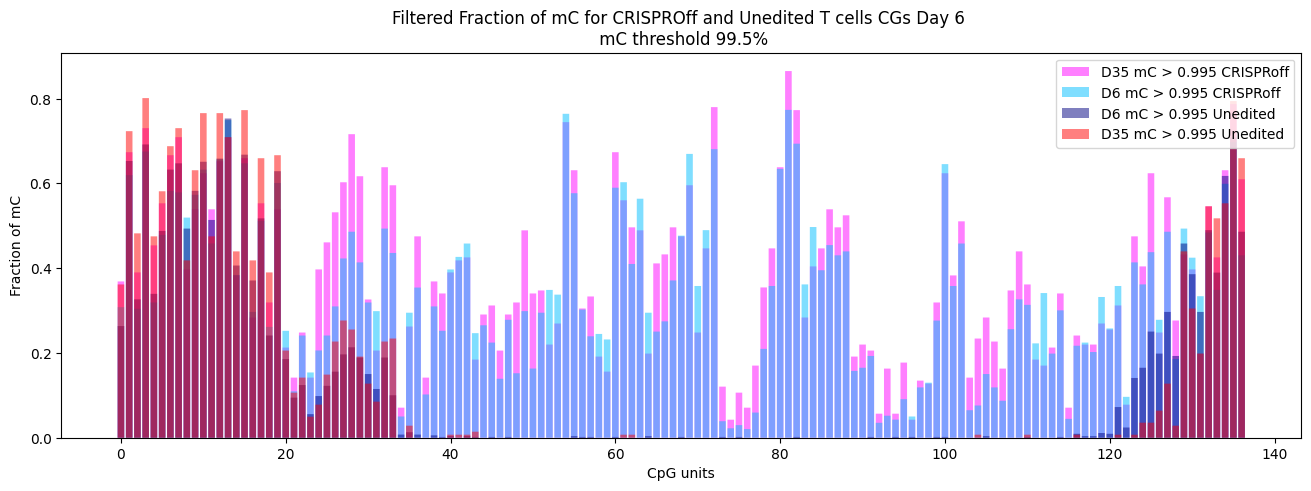

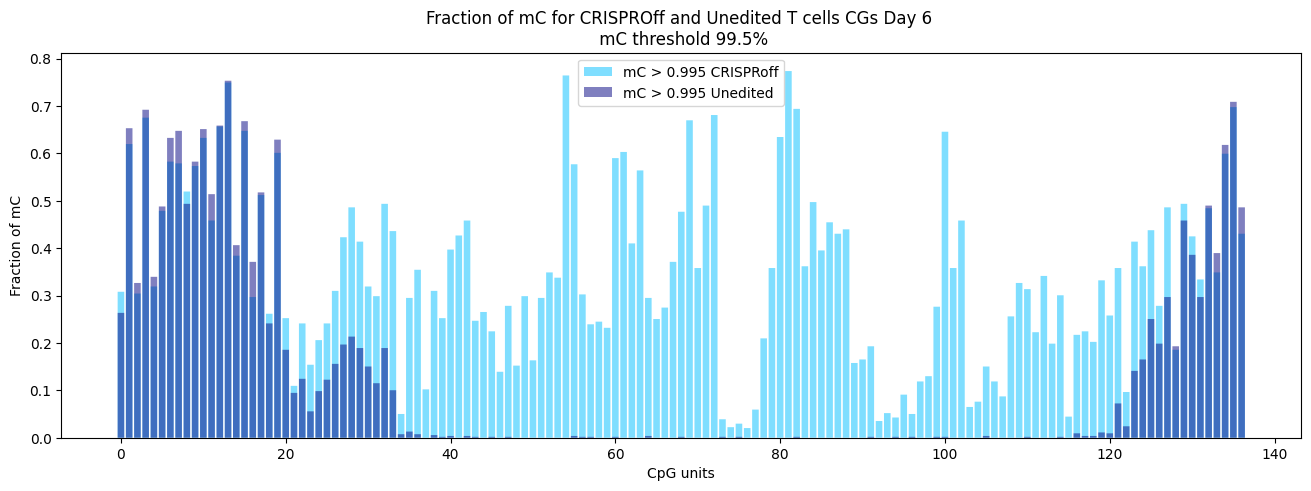

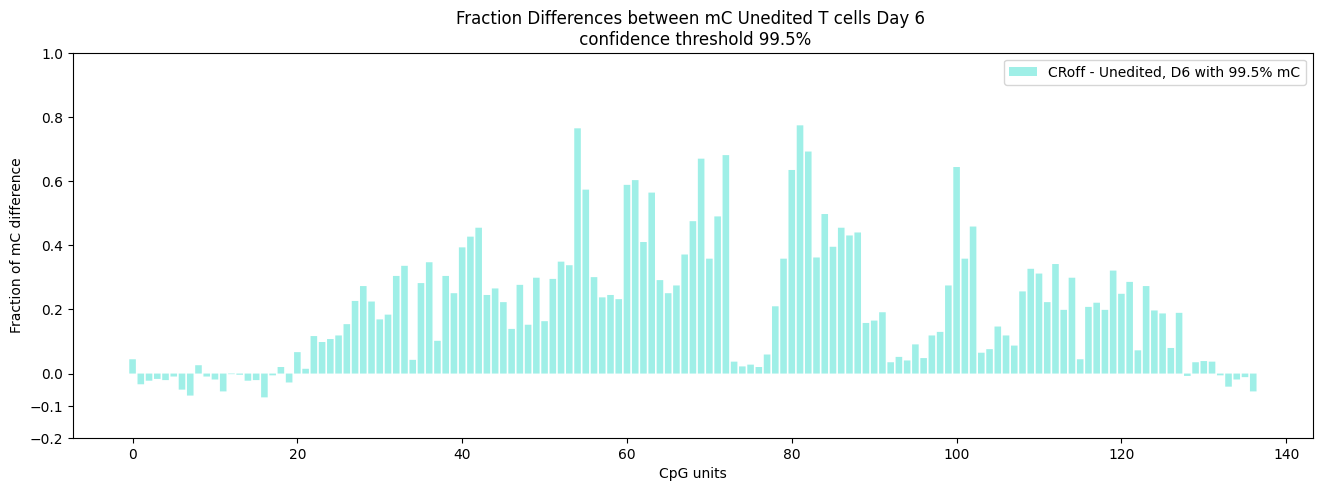

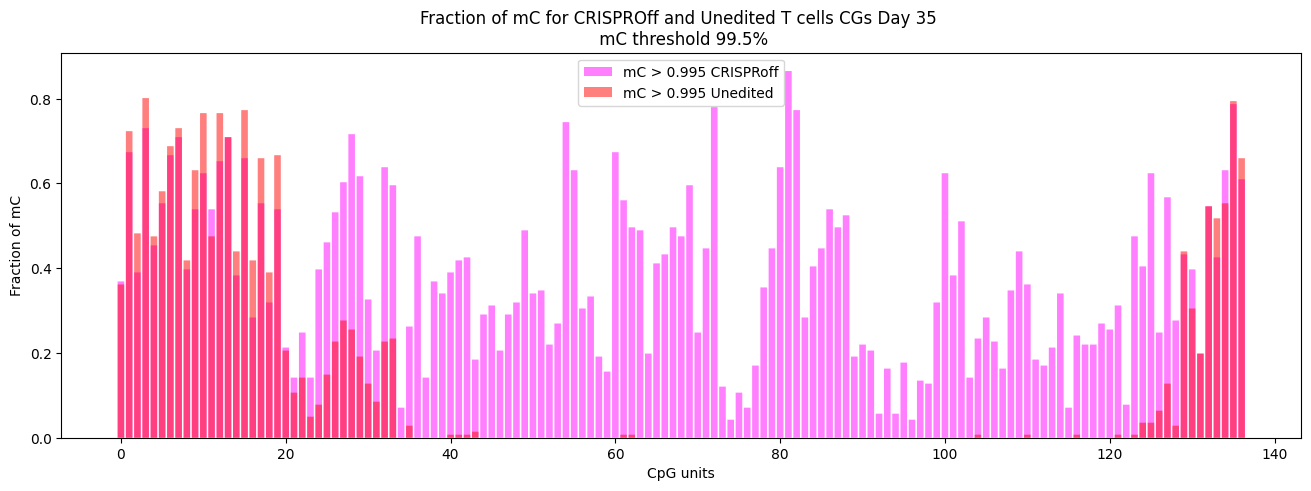

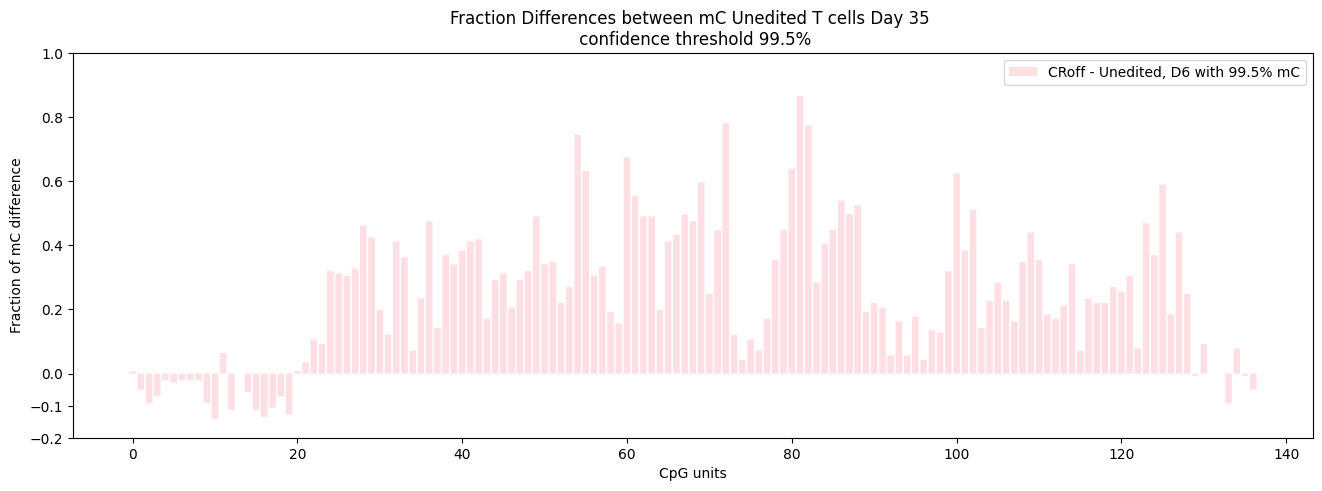

In [34]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(filtered_CGs_D35_CRoff_mc0995_fracs)), filtered_CGs_D35_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='D35 mC > 0.995 CRISPRoff', color='magenta')

plt.bar(np.arange(len(filtered_CGs_D6_CRoff_mc0995_fracs)), filtered_CGs_D6_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='D6 mC > 0.995 CRISPRoff', color='deepskyblue')
plt.bar(np.arange(len(filtered_CGs_D6_unedited_mc0995_fracs)), filtered_CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='D6 mC > 0.995 Unedited', color='navy')

plt.bar(np.arange(len(filtered_CGs_D35_unedited_mc0995_fracs)), filtered_CGs_D35_unedited_mc0995_fracs, snap=False, alpha=0.5, label='D35 mC > 0.995 Unedited', color='red')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Filtered Fraction of mC for CRISPROff and Unedited T cells CGs Day 6 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()




# =======================
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(filtered_CGs_D6_CRoff_mc0995_fracs)), filtered_CGs_D6_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 CRISPRoff', color='deepskyblue')
plt.bar(np.arange(len(filtered_CGs_D6_unedited_mc0995_fracs)), filtered_CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='navy')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 6 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995 =   filtered_CGs_D6_CRoff_mc0995_fracs  - filtered_CGs_D6_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 99.5% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])

plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(filtered_CGs_D35_CRoff_mc0995_fracs)), filtered_CGs_D35_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 CRISPRoff', color='magenta')
plt.bar(np.arange(len(filtered_CGs_D35_unedited_mc0995_fracs)), filtered_CGs_D35_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='red')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995 =   filtered_CGs_D35_CRoff_mc0995_fracs  - filtered_CGs_D35_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 99.5% mC', color='pink'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])

plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

# Balance to the minimum size of the datasets:

In [ ]:
filtered_CGs_D35_CRoff_mc0995.shape, filtered_CGs_D6_CRoff_mc0995.shape, filtered_CGs_D6_unedited_mc0995.shape, filtered_CGs_D35_unedited_mc0995.shape

((141, 137), (539, 137), (539, 137), (141, 137))

In [95]:
filtered_CGs_D35_CRoff_mc0995_bal, filtered_CGs_D6_CRoff_mc0995_bal = balance_datasets(filtered_CGs_D35_CRoff_mc0995, filtered_CGs_D6_CRoff_mc0995)

filtered_CGs_D35_CRoff_mc0995_bal.shape, filtered_CGs_D6_CRoff_mc0995_bal.shape

Unedited has more reads than silenced
subset_size =  141
(141, 137)
Final shapes after balancing:
141 141


((141, 137), (141, 137))

In [96]:
filtered_CGs_D35_unedited_mc0995_bal, filtered_CGs_D6_unedited_mc0995_bal = balance_datasets(filtered_CGs_D35_unedited_mc0995, filtered_CGs_D6_unedited_mc0995)

filtered_CGs_D35_unedited_mc0995_bal.shape, filtered_CGs_D6_unedited_mc0995_bal.shape

Unedited has more reads than silenced
subset_size =  141
(141, 137)
Final shapes after balancing:
141 141


((141, 137), (141, 137))

In [97]:
filtered_CGs_D35_unedited_mc0995_bal_fracs = get_fractions(filtered_CGs_D35_unedited_mc0995_bal)
filtered_CGs_D6_unedited_mc0995_bal_fracs = get_fractions(filtered_CGs_D6_unedited_mc0995_bal)
filtered_CGs_D35_CRoff_mc0995_bal_fracs = get_fractions(filtered_CGs_D35_CRoff_mc0995_bal)
filtered_CGs_D6_CRoff_mc0995_bal_fracs = get_fractions(filtered_CGs_D6_CRoff_mc0995_bal)


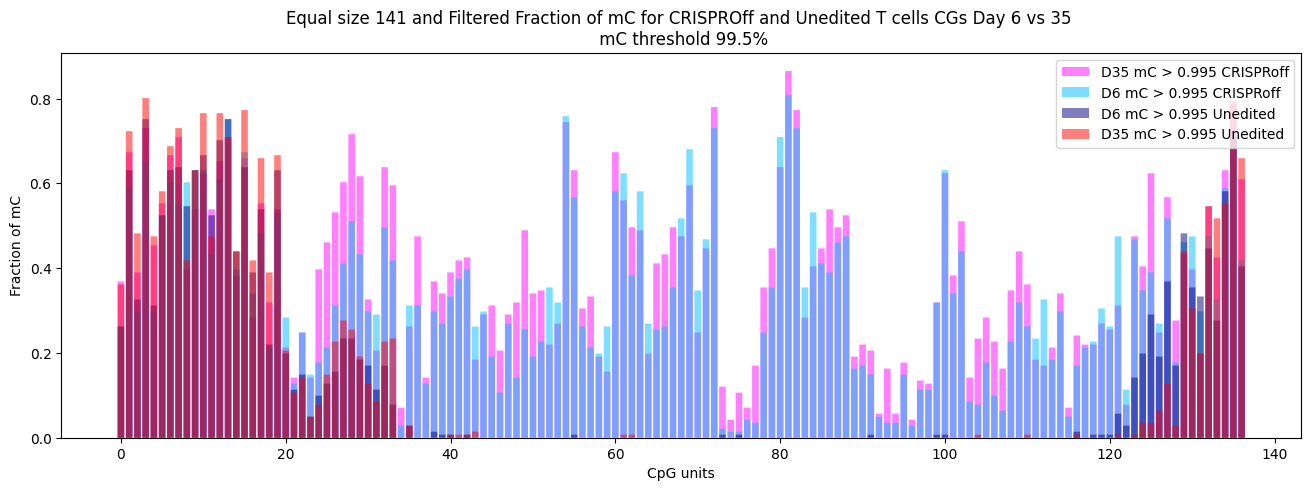

In [98]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(filtered_CGs_D35_CRoff_mc0995_fracs)), filtered_CGs_D35_CRoff_mc0995_bal_fracs, snap=False, alpha=0.5, label='D35 mC > 0.995 CRISPRoff', color='magenta')

plt.bar(np.arange(len(filtered_CGs_D6_CRoff_mc0995_fracs)), filtered_CGs_D6_CRoff_mc0995_bal_fracs, snap=False, alpha=0.5, label='D6 mC > 0.995 CRISPRoff', color='deepskyblue')
plt.bar(np.arange(len(filtered_CGs_D6_unedited_mc0995_fracs)), filtered_CGs_D6_unedited_mc0995_bal_fracs, snap=False, alpha=0.5, label='D6 mC > 0.995 Unedited', color='navy')

plt.bar(np.arange(len(filtered_CGs_D35_unedited_mc0995_fracs)), filtered_CGs_D35_unedited_mc0995_bal_fracs, snap=False, alpha=0.5, label='D35 mC > 0.995 Unedited', color='red')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title(f'Equal size {filtered_CGs_D6_CRoff_mc0995_bal.shape[0]} and Filtered Fraction of mC for CRISPROff and Unedited T cells CGs Day 6 vs 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()

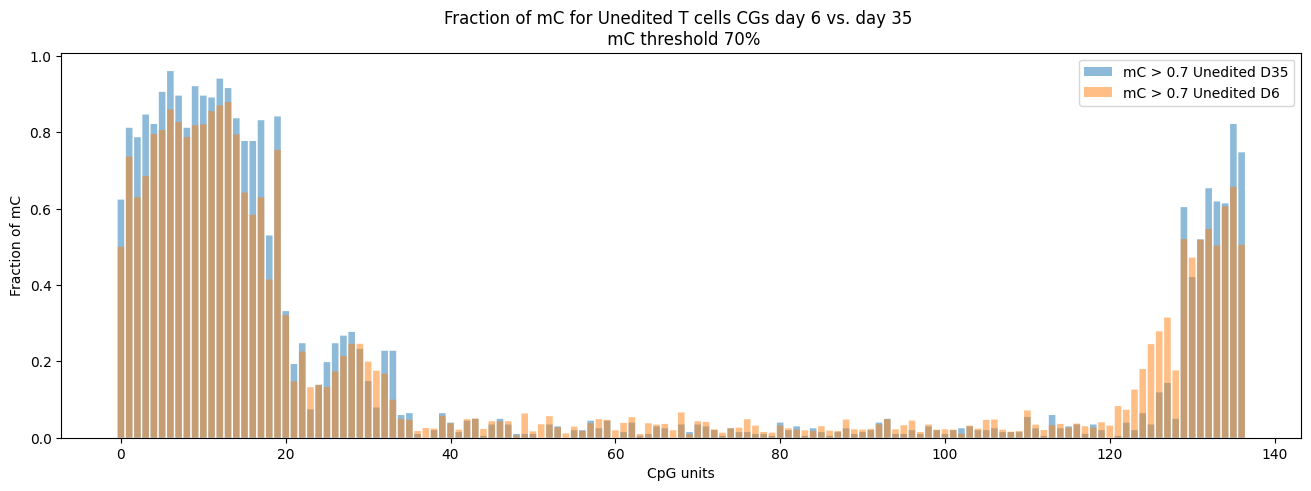

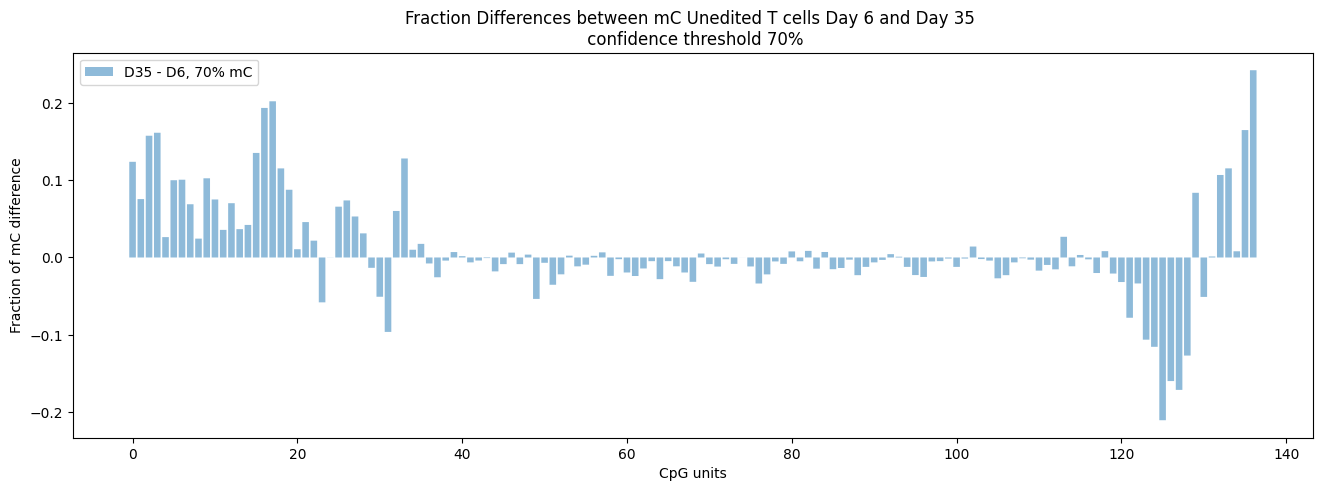

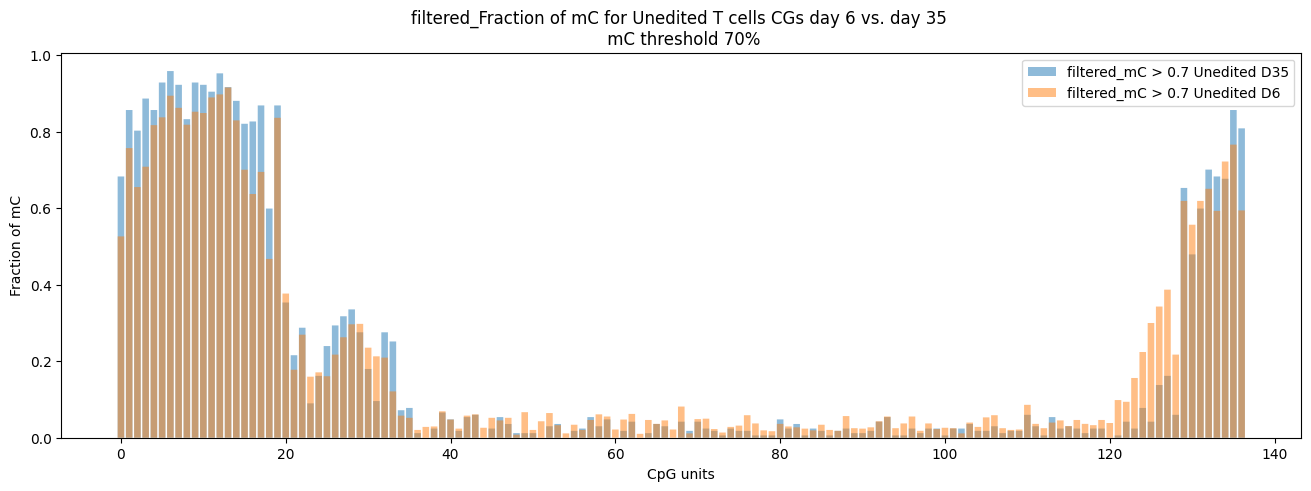

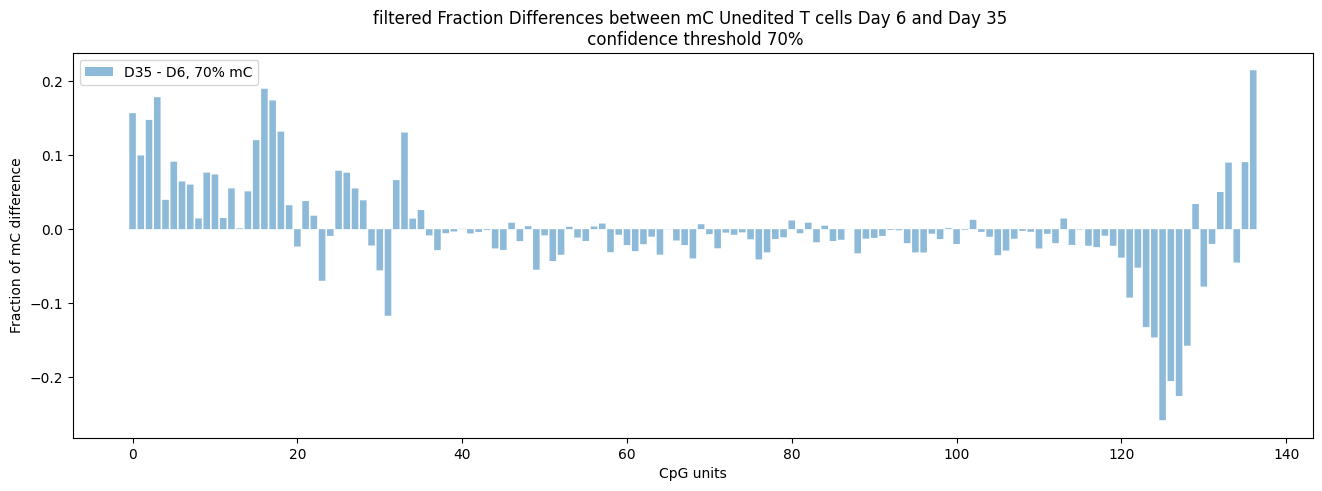

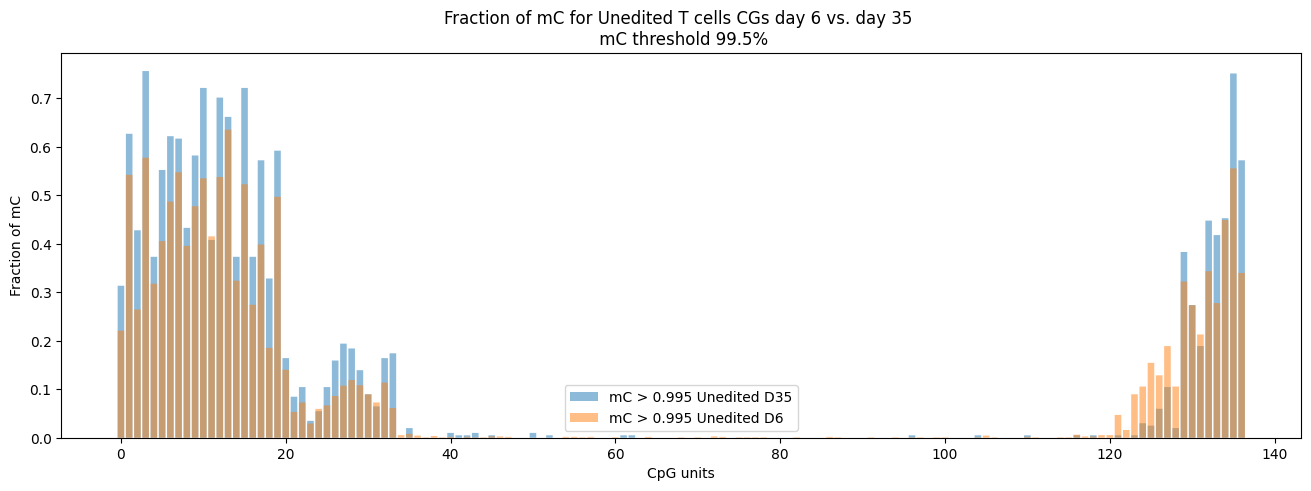

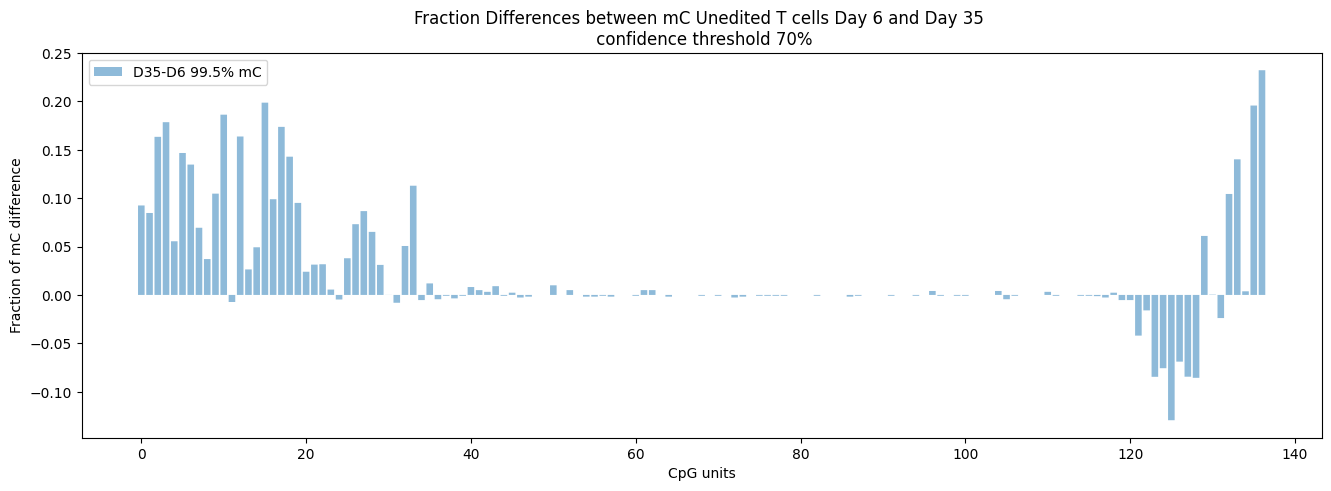

In [17]:
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_unedited_mc0995_fracs)), CGs_D35_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited D35')
plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited D6')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 6 vs. day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D6_mCthresh_0995 =   CGs_D35_unedited_mc0995_fracs  - CGs_D6_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='D35-D6 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()

# Normilize by deviding per position

In [54]:
# dif_D35_D6_mCthresh_0995

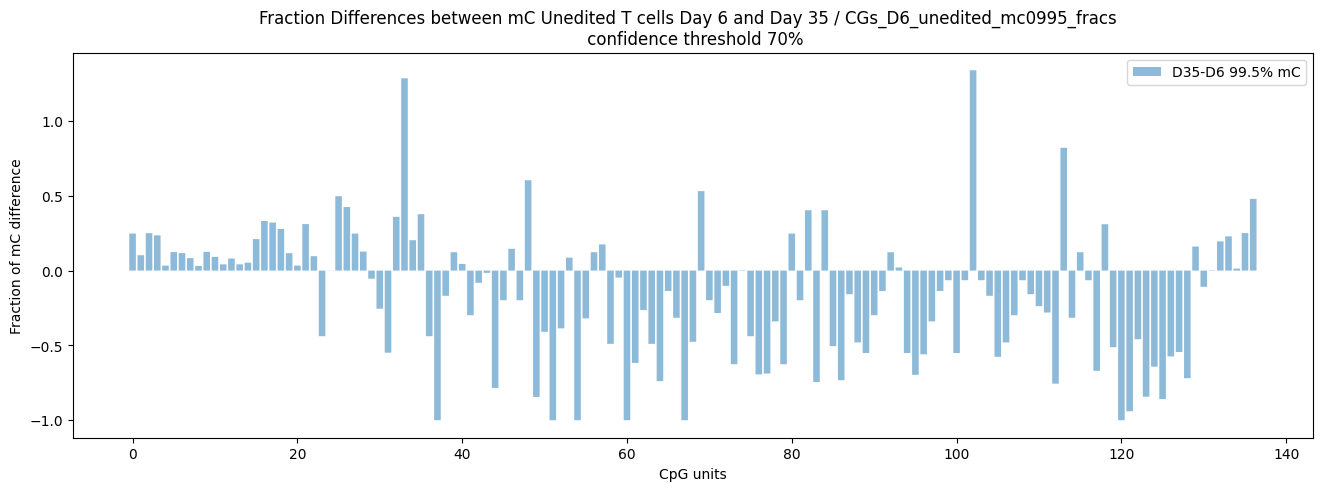

/tmp/ipykernel_3604097/662311908.py:15: RuntimeWarning:

divide by zero encountered in divide



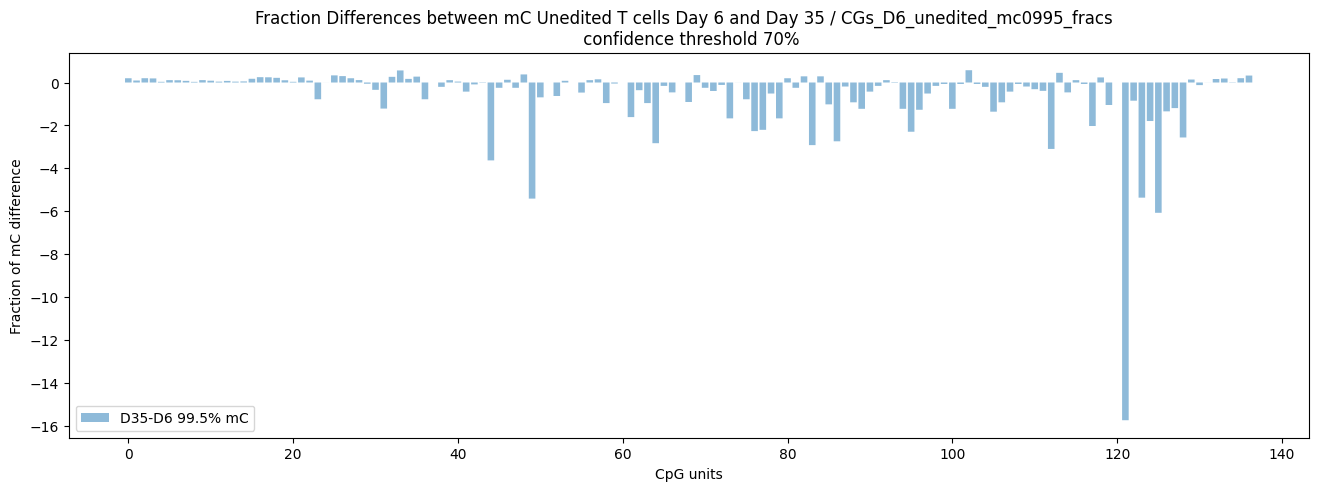

In [55]:
dif_D35_D6_mCthresh_07_byD35 = dif_D35_D6_mCthresh_07/CGs_D6_unedited_mc07_fracs 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_07_byD35)), dif_D35_D6_mCthresh_07_byD35, snap=False, alpha=0.5, label='D35-D6 99.5% mC' )


# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 / CGs_D6_unedited_mc0995_fracs  \n confidence threshold 70%')
plt.legend()
# Show the plot
plt.show()

dif_D35_D6_mCthresh_07_byD35 = dif_D35_D6_mCthresh_07/CGs_D35_unedited_mc07_fracs 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_07_byD35)), dif_D35_D6_mCthresh_07_byD35, snap=False, alpha=0.5, label='D35-D6 99.5% mC' )


# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 / CGs_D6_unedited_mc0995_fracs  \n confidence threshold 70%')
plt.legend()
# Show the plot
plt.show()

/tmp/ipykernel_3604097/220525511.py:1: RuntimeWarning:

divide by zero encountered in divide

/tmp/ipykernel_3604097/220525511.py:1: RuntimeWarning:

invalid value encountered in divide



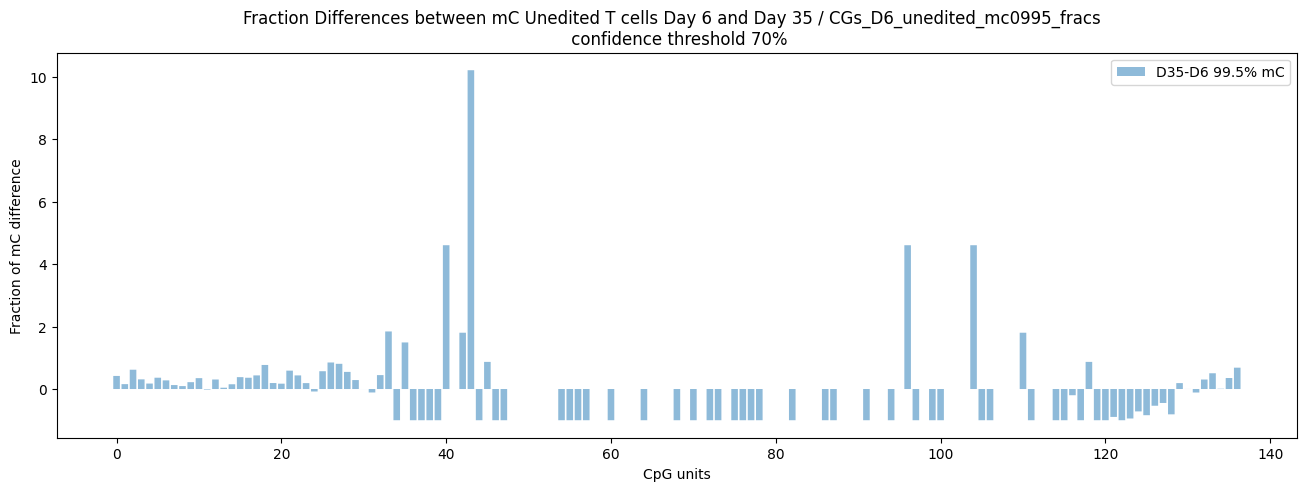

/tmp/ipykernel_3604097/220525511.py:15: RuntimeWarning:

divide by zero encountered in divide

/tmp/ipykernel_3604097/220525511.py:15: RuntimeWarning:

invalid value encountered in divide



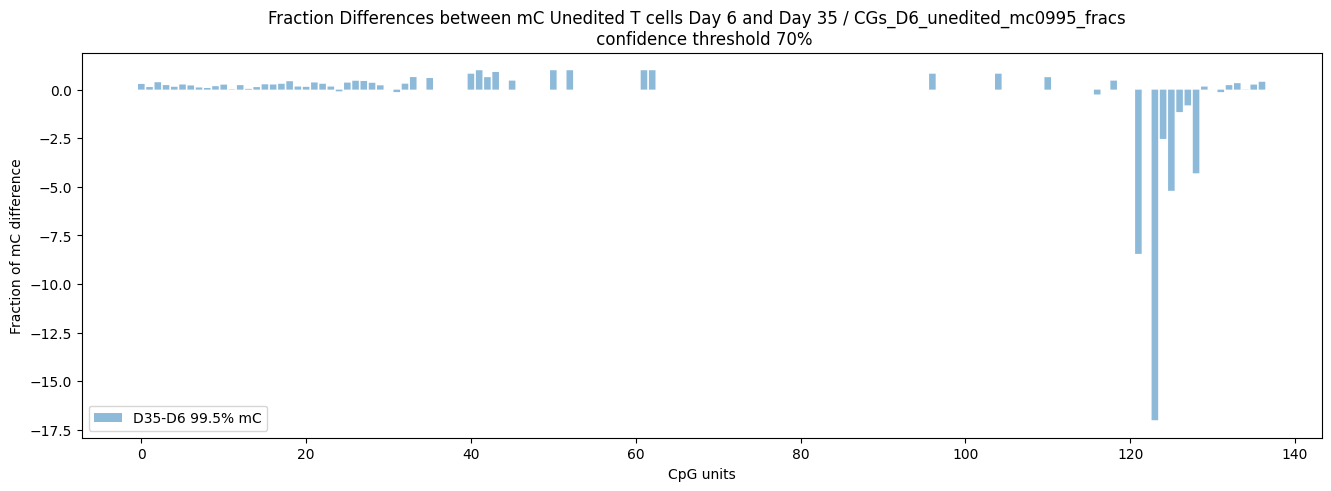

In [56]:
dif_D35_D6_mCthresh_0995_byD35 = dif_D35_D6_mCthresh_0995/CGs_D6_unedited_mc0995_fracs 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995_byD35)), dif_D35_D6_mCthresh_0995_byD35, snap=False, alpha=0.5, label='D35-D6 99.5% mC' )


# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 / CGs_D6_unedited_mc0995_fracs  \n confidence threshold 70%')
plt.legend()
# Show the plot
plt.show()

dif_D35_D6_mCthresh_0995_byD35 = dif_D35_D6_mCthresh_0995/CGs_D35_unedited_mc0995_fracs 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995_byD35)), dif_D35_D6_mCthresh_0995_byD35, snap=False, alpha=0.5, label='D35-D6 99.5% mC' )


# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 / CGs_D6_unedited_mc0995_fracs  \n confidence threshold 70%')
plt.legend()
# Show the plot
plt.show()

# Day 28 vs. 35

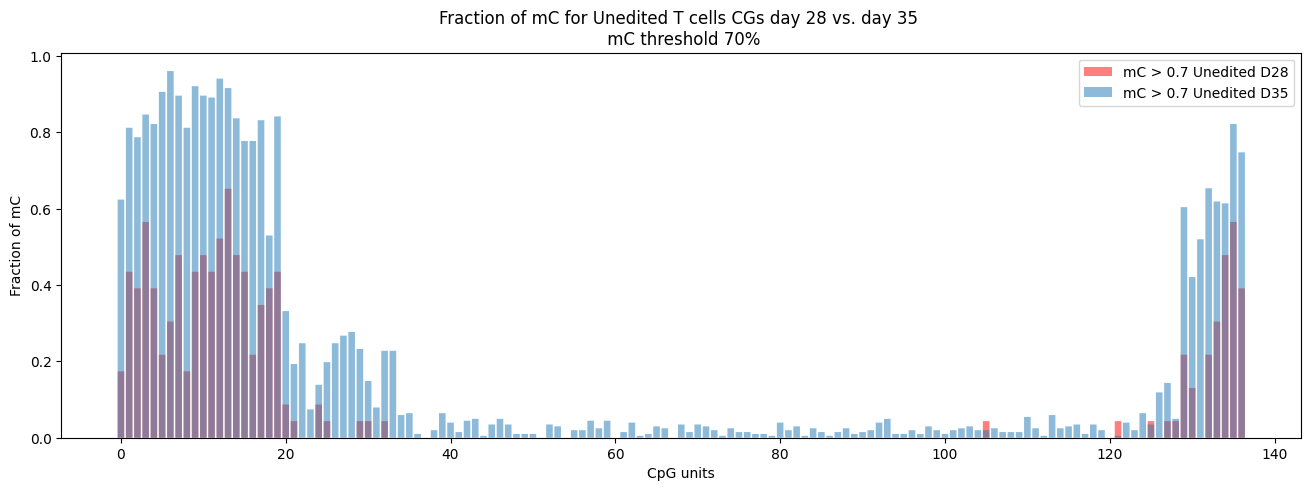

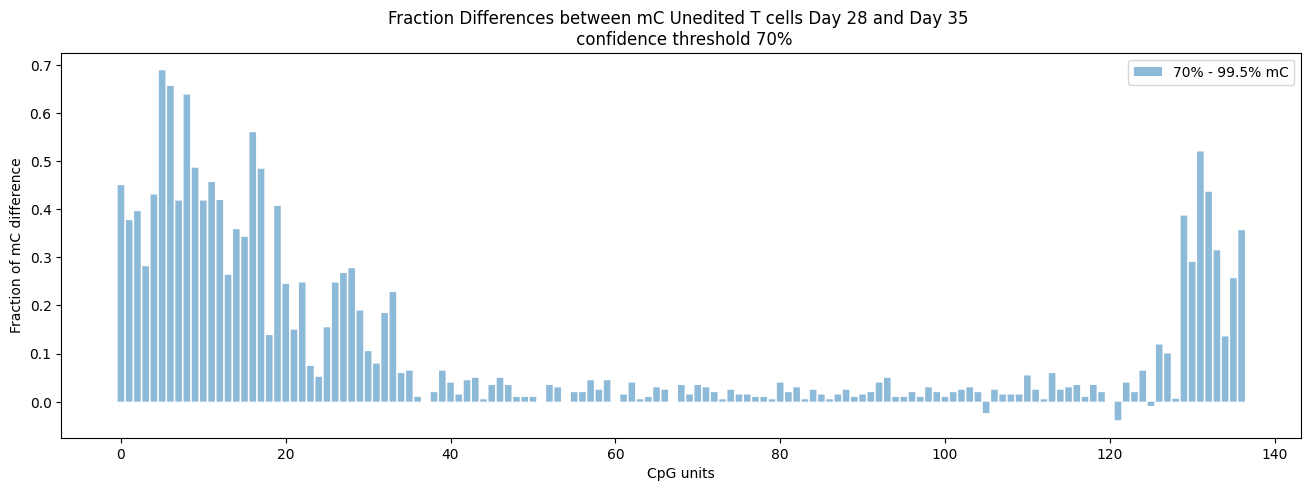

In [61]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D28_unedited_mc07_fracs)), CGs_D28_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited D28', color='red')
plt.bar(np.arange(len(CGs_D35_unedited_mc07_fracs)), CGs_D35_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited D35') #, color='blue')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 28 vs. day 35 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D28_mCthresh_70 =   CGs_D35_unedited_mc07_fracs  - CGs_D28_unedited_mc07_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D28_mCthresh_70)), dif_D35_D28_mCthresh_70, snap=False, alpha=0.5, label='70% - 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 28 and Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()

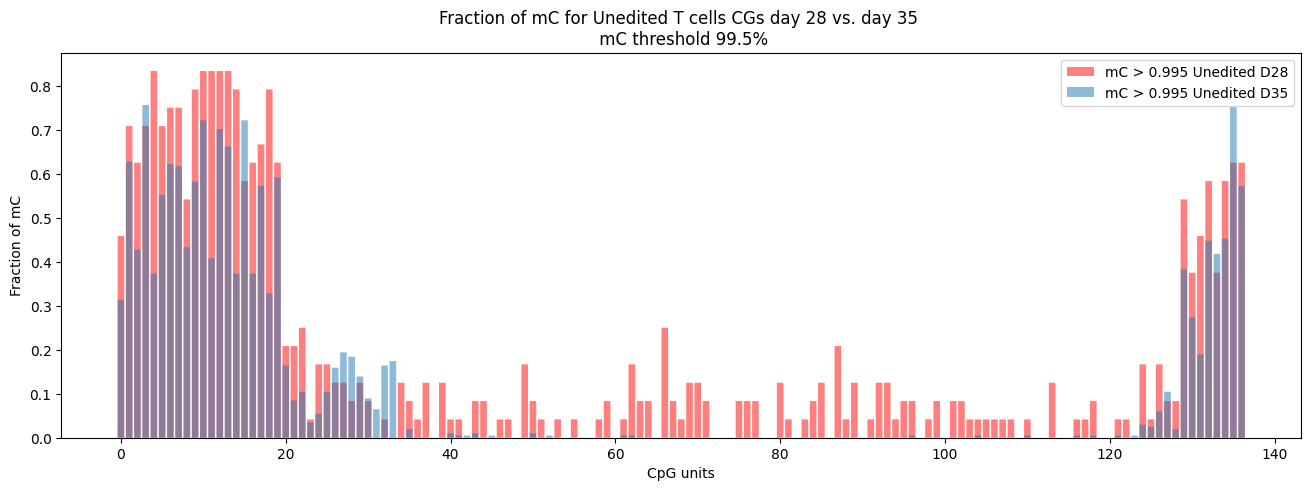

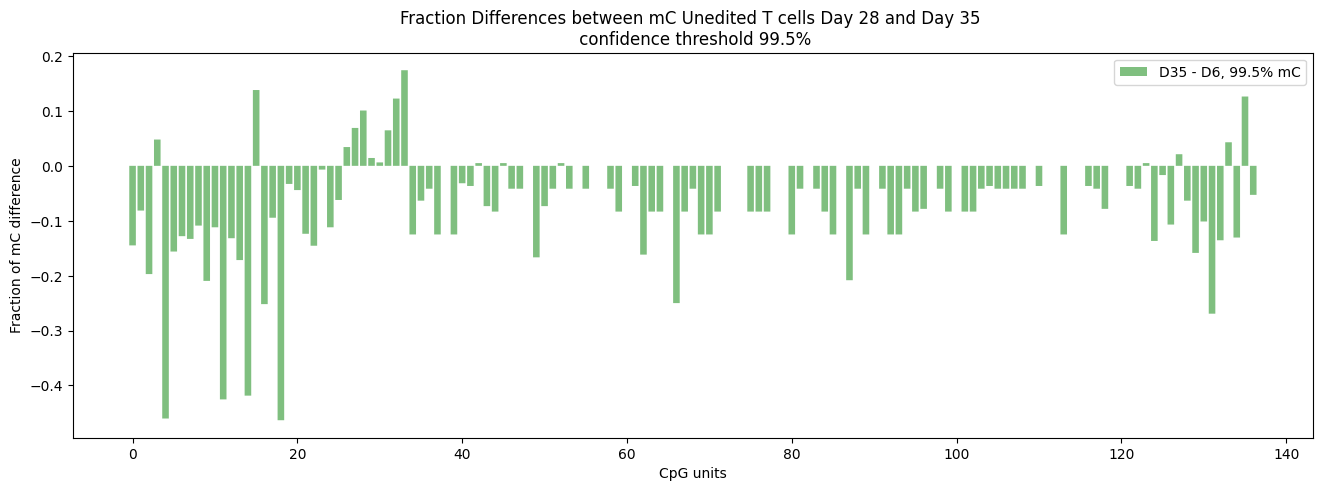

In [66]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D28_unedited_mc0995_fracs)), CGs_D28_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited D28', color='red')
plt.bar(np.arange(len(CGs_D35_unedited_mc0995_fracs)), CGs_D35_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited D35')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 28 vs. day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D28_mCthresh_0995 =   CGs_D35_unedited_mc0995_fracs  - CGs_D28_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D28_mCthresh_0995)), dif_D35_D28_mCthresh_0995, snap=False, alpha=0.5, label='D35 - D6, 99.5% mC', color='green' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 28 and Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

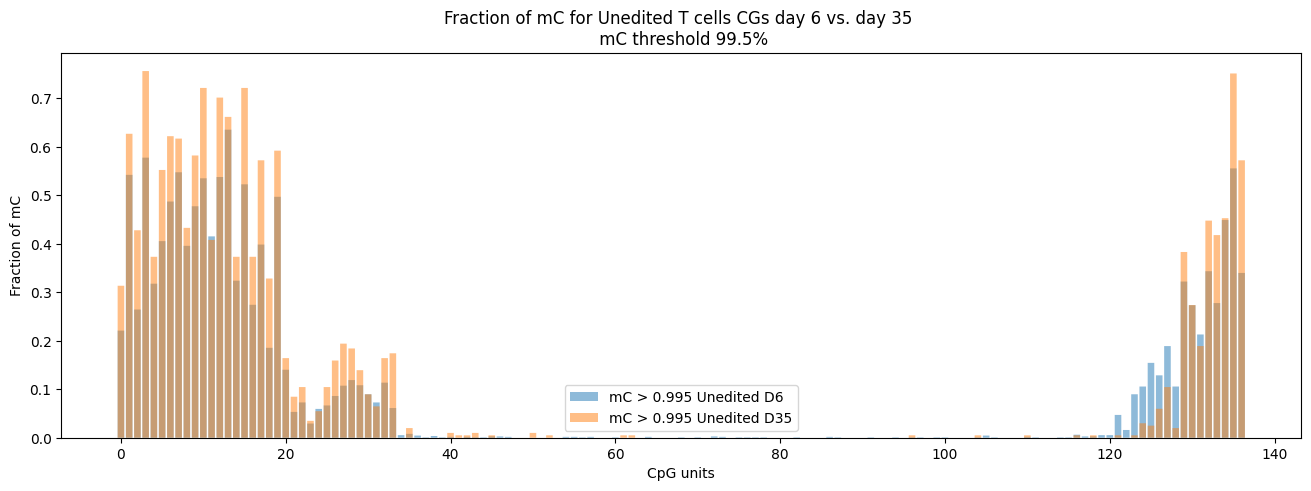

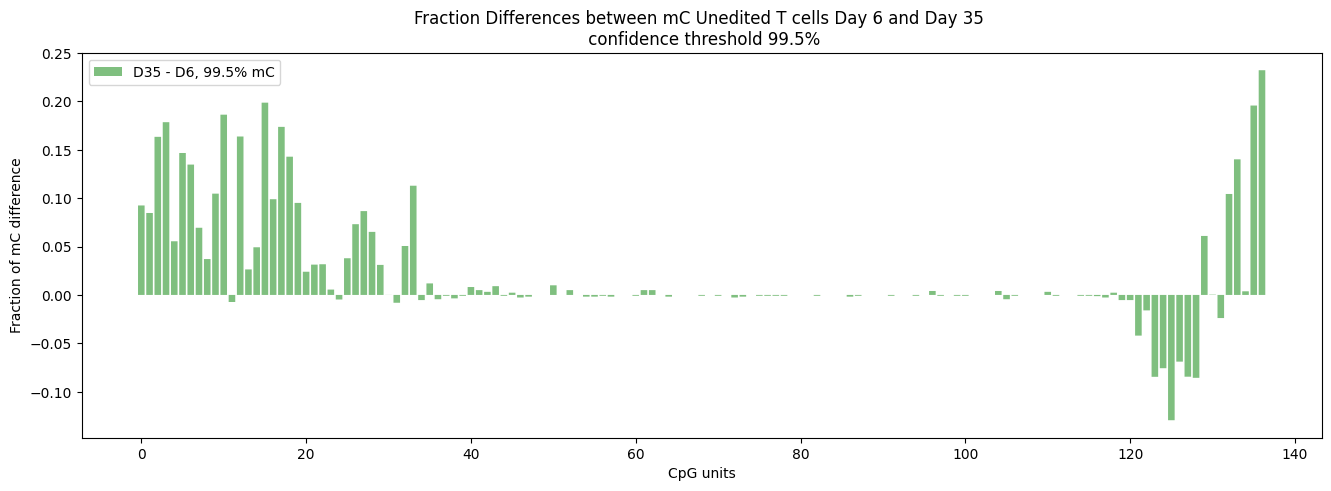

In [67]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited D6')
plt.bar(np.arange(len(CGs_D35_unedited_mc0995_fracs)), CGs_D35_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited D35')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 6 vs. day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D6_mCthresh_0995 =   CGs_D35_unedited_mc0995_fracs  - CGs_D6_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='D35 - D6, 99.5% mC', color='green'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

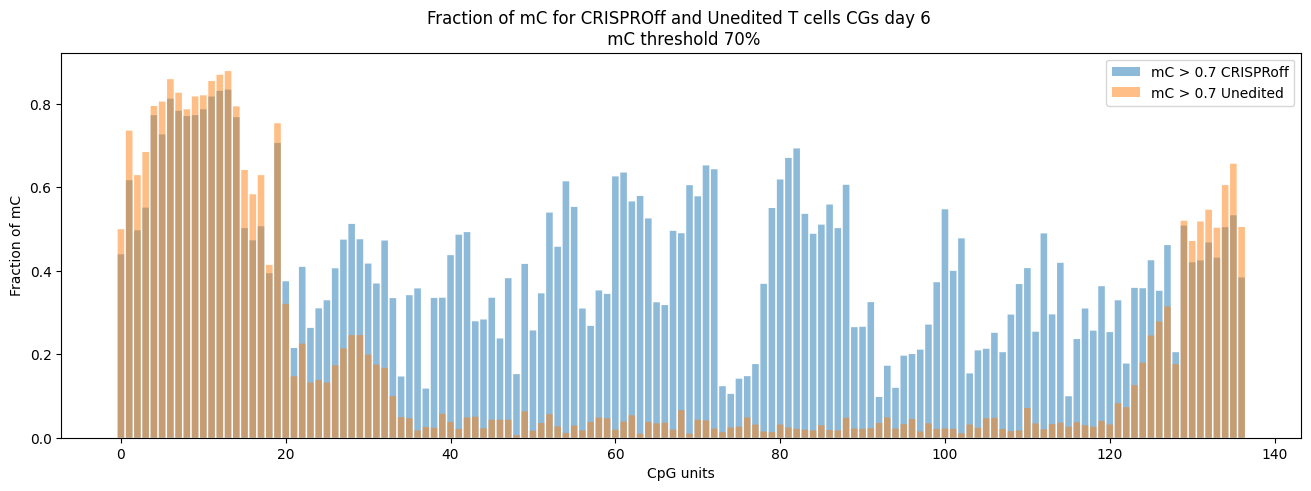

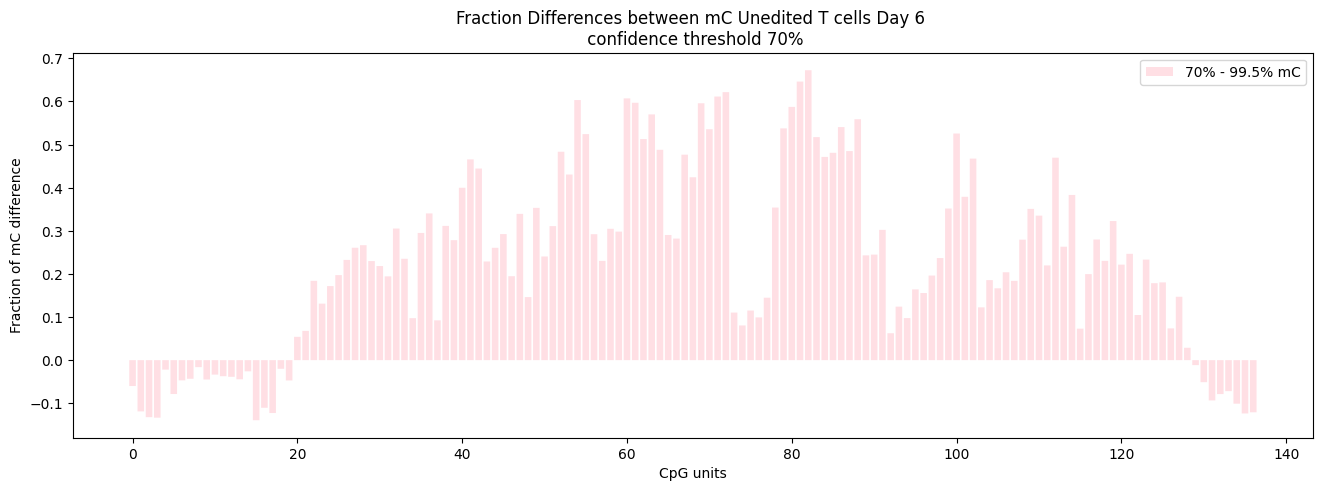

In [68]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_mc07_fracs)), CGs_D6_CRoff_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 CRISPRoff')
plt.bar(np.arange(len(CGs_D6_unedited_mc07_fracs)), CGs_D6_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs day 6 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_70 =   CGs_D6_CRoff_mc07_fracs  - CGs_D6_unedited_mc07_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_70)), dif_D6_mCthresh_70, snap=False, alpha=0.5, label='70% - 99.5% mC' , color='pink' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()

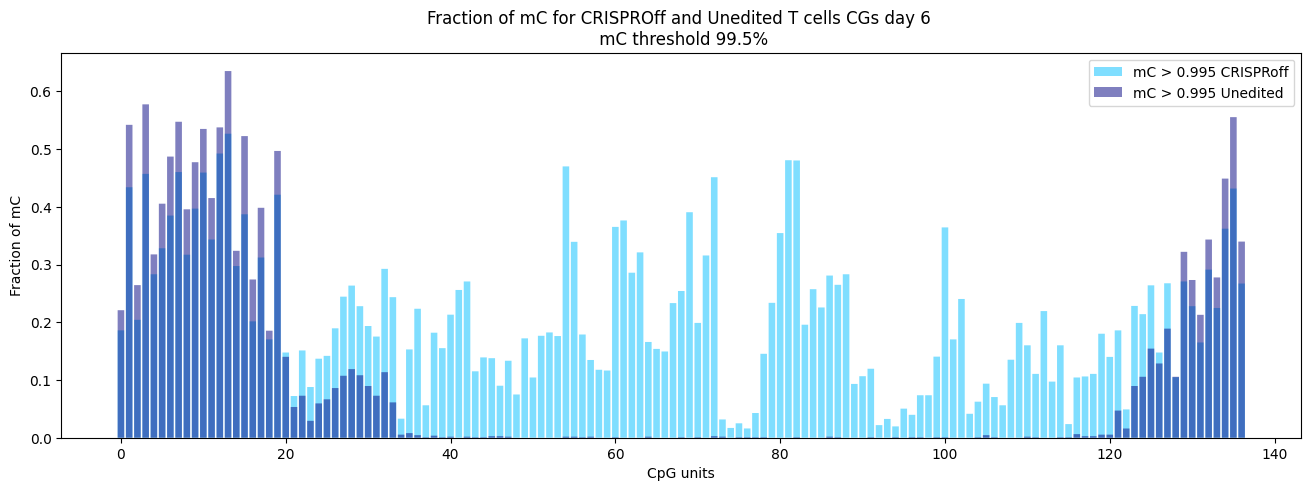

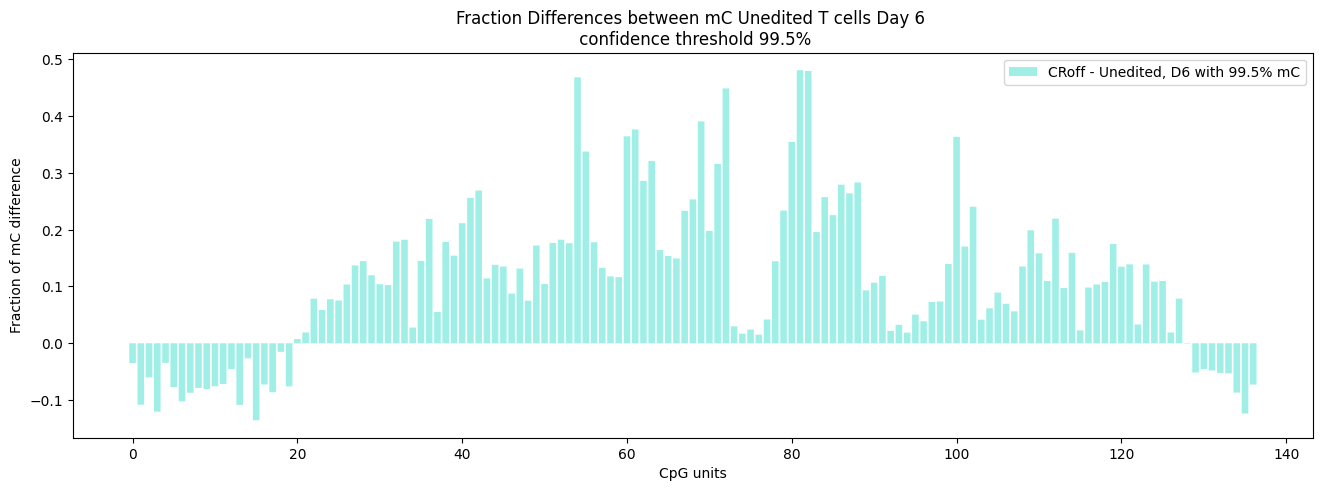

In [124]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_mc0995_fracs)), CGs_D6_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 CRISPRoff', color='deepskyblue')
plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='navy')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs day 6 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995 =   CGs_D6_CRoff_mc0995_fracs  - CGs_D6_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 99.5% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

In [125]:
dif_D6_mCthresh_995

array([-0.0349459 , -0.10815978, -0.06013692, -0.12045866, -0.03442824,
       -0.07722301, -0.10220981, -0.08716786, -0.07861334, -0.08040656,
       -0.07563756, -0.0718184 , -0.04529325, -0.10855318, -0.02636645,
       -0.13547212, -0.07257353, -0.08618161, -0.01506451, -0.07584178,
        0.00744083,  0.01901823,  0.07844474,  0.0585867 ,  0.07748144,
        0.07528929,  0.10349368,  0.13705994,  0.14470419,  0.1196695 ,
        0.10395871,  0.10253038,  0.17902003,  0.18230807,  0.02768238,
        0.1450026 ,  0.21902464,  0.05531251,  0.17843113,  0.15433124,
        0.21142787,  0.25602141,  0.26896579,  0.11418851,  0.13827415,
        0.13516144,  0.08743619,  0.13158845,  0.0749331 ,  0.17216771,
        0.1043711 ,  0.17662801,  0.1824264 ,  0.17618198,  0.46834134,
        0.33765446,  0.17797085,  0.13292654,  0.11775201,  0.11641392,
        0.36441153,  0.3764496 ,  0.28590544,  0.32114184,  0.16414866,
        0.15388046,  0.14942016,  0.23327386,  0.25334998,  0.39

In [129]:

# Step 2: Create a DataFrame
df_dmc = pd.DataFrame({
    "CpG Index": np.arange(1, len(dif_D6_mCthresh_995)+1),
    "ΔmC": dif_D6_mCthresh_995
})

# Step 3: Define significance threshold
# You can adjust the thresholds based on biological interest
df_dmc["Significant"] = (df_dmc["ΔmC"] > 0.3) | (df_dmc["ΔmC"] < -0.1)

# Step 4: Filter top differentially methylated CpGs
top_dmc = df_dmc[df_dmc["Significant"]].sort_values(by="ΔmC", ascending=False)

# Step 5 (optional): Save as CSV
top_dmc.to_csv("Top_Differential_mCs.csv", index=False)

# Print or display
print(top_dmc)

     CpG Index       ΔmC  Significant
81          82  0.480821         True
82          83  0.479487         True
54          55  0.468341         True
72          73  0.448721         True
69          70  0.390723         True
61          62  0.376450         True
60          61  0.364412         True
100        101  0.363519         True
80          81  0.354594         True
55          56  0.337654         True
63          64  0.321142         True
71          72  0.315789         True
6            7 -0.102210         True
1            2 -0.108160         True
13          14 -0.108553         True
3            4 -0.120459         True
135        136 -0.123700         True
15          16 -0.135472         True


# CRISPRoff compare

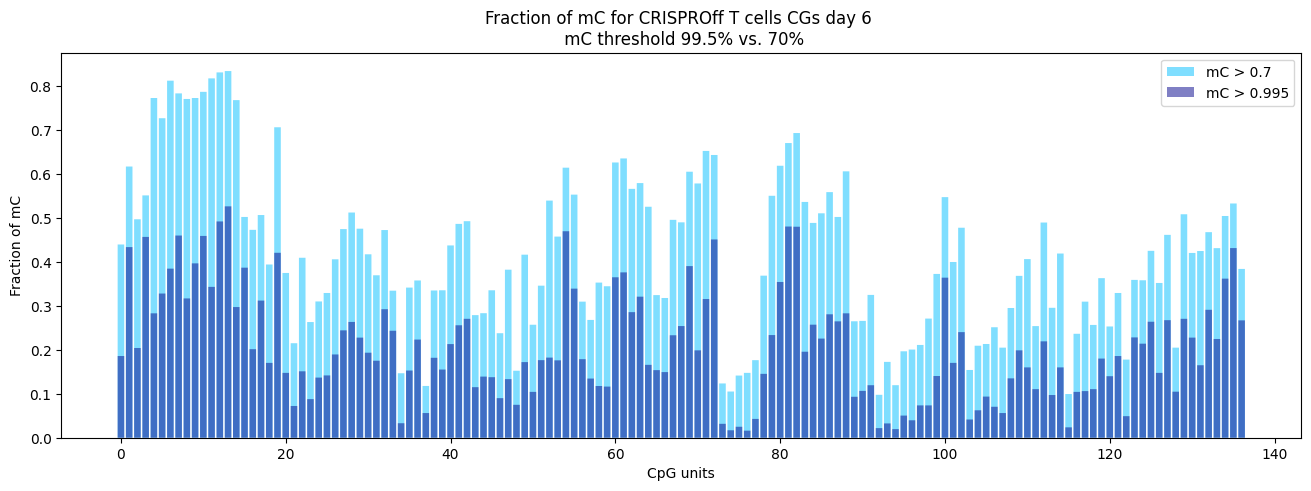

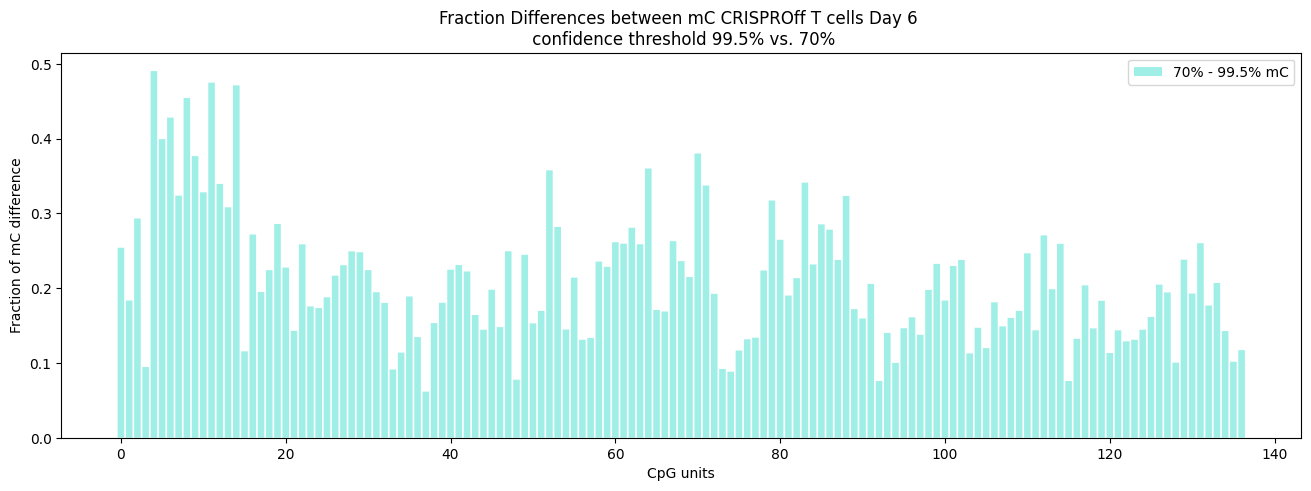

In [100]:
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_mc07_fracs)), CGs_D6_CRoff_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7', color='deepskyblue')
plt.bar(np.arange(len(CGs_D6_CRoff_mc0995_fracs)), CGs_D6_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995', color='darkblue')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff T cells CGs day 6 \n mC threshold 99.5% vs. 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_CRoff_mCthresh =   CGs_D6_CRoff_mc07_fracs  - CGs_D6_CRoff_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_CRoff_mCthresh)), dif_D6_CRoff_mCthresh, snap=False, alpha=0.5, label='70% - 99.5% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPROff T cells Day 6 \n confidence threshold 99.5% vs. 70%')
plt.legend()

# Show the plot
plt.show()

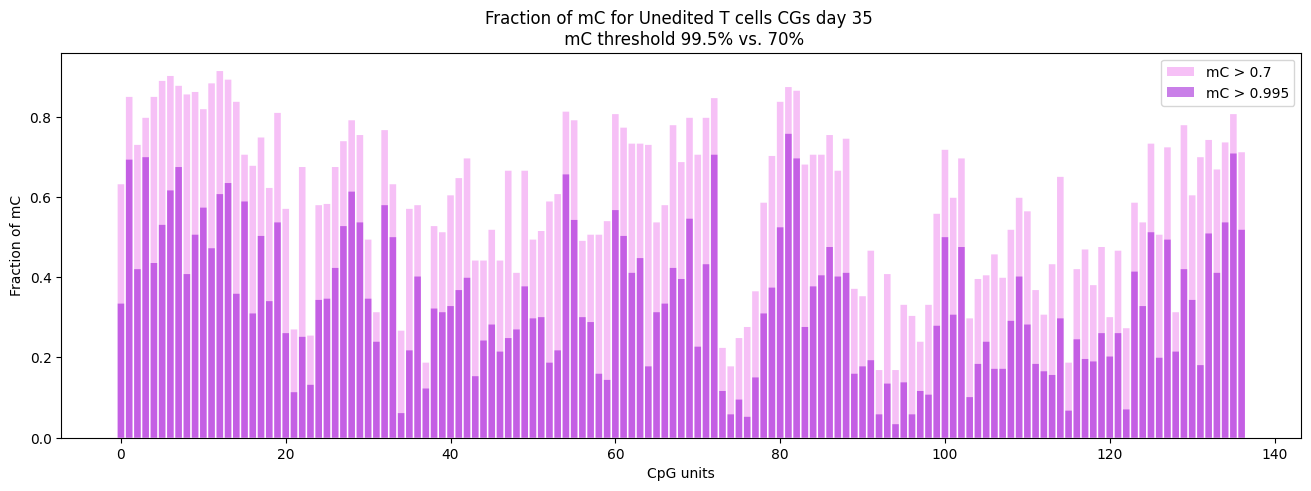

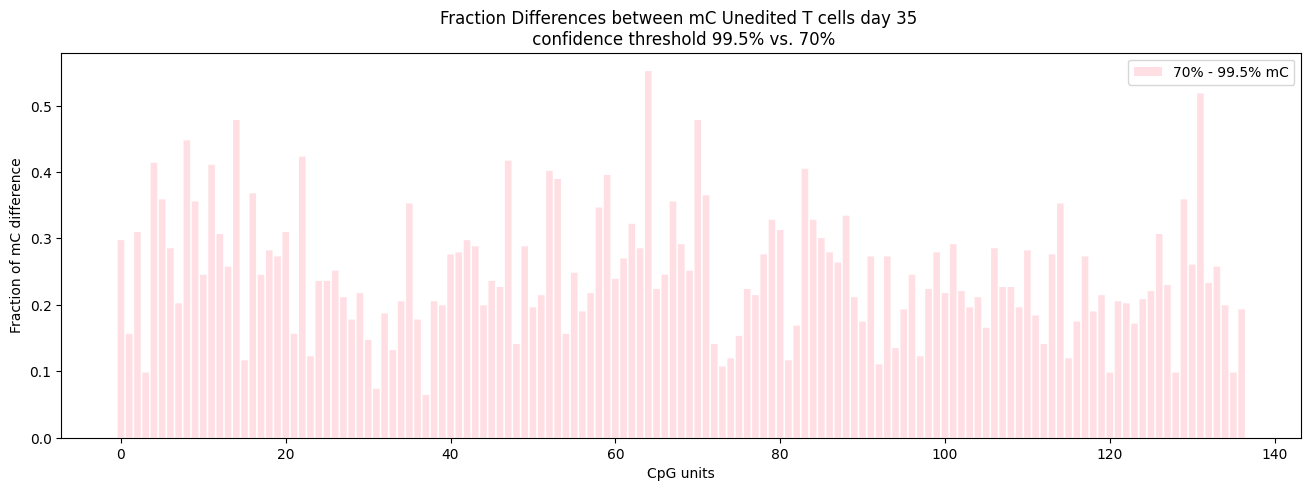

In [109]:
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_mc07_fracs)), CGs_D35_CRoff_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7', color='violet')
plt.bar(np.arange(len(CGs_D35_CRoff_mc0995_fracs)), CGs_D35_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995', color='darkviolet')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 35 \n mC threshold 99.5% vs. 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_CRoff_mCthresh =   CGs_D35_CRoff_mc07_fracs  - CGs_D35_CRoff_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_CRoff_mCthresh)), dif_D35_CRoff_mCthresh, snap=False, alpha=0.5, label='70% - 99.5% mC', color='pink')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells day 35 \n confidence threshold 99.5% vs. 70%')
plt.legend()

# Show the plot
plt.show()

# Difference between the differences

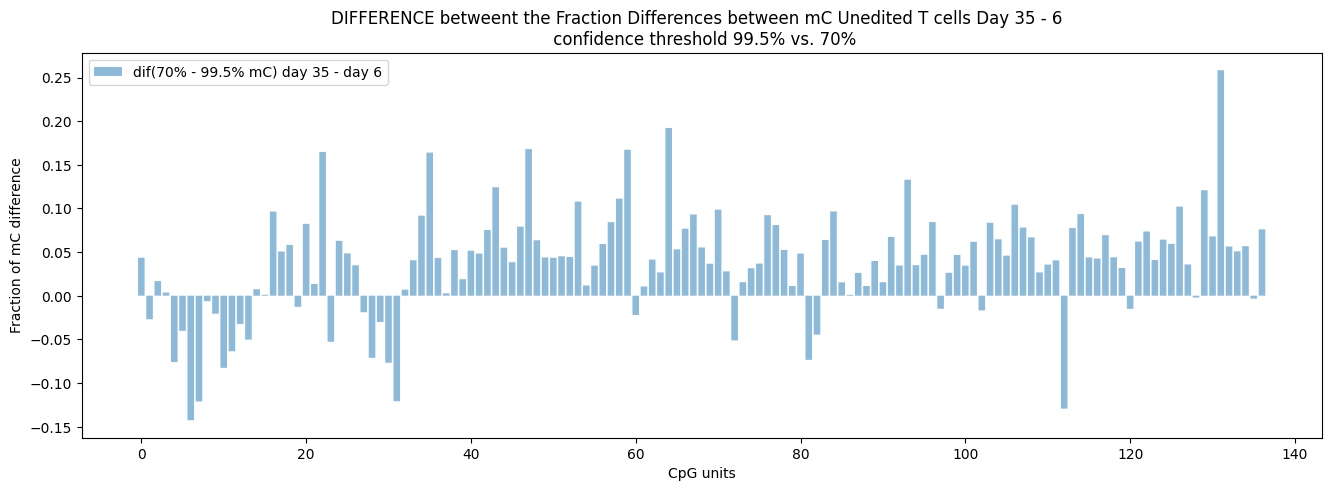

In [111]:

# DIFFERENCES

dif_dif_D6_D35_CRoff_mCthresh = dif_D35_CRoff_mCthresh - dif_D6_CRoff_mCthresh

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_dif_D6_D35_CRoff_mCthresh)), dif_dif_D6_D35_CRoff_mCthresh, snap=False, alpha=0.5, label='dif(70% - 99.5% mC) day 35 - day 6')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('DIFFERENCE betweent the Fraction Differences between mC Unedited T cells Day 35 - 6  \n confidence threshold 99.5% vs. 70%')
plt.legend()

# Show the plot
plt.show()

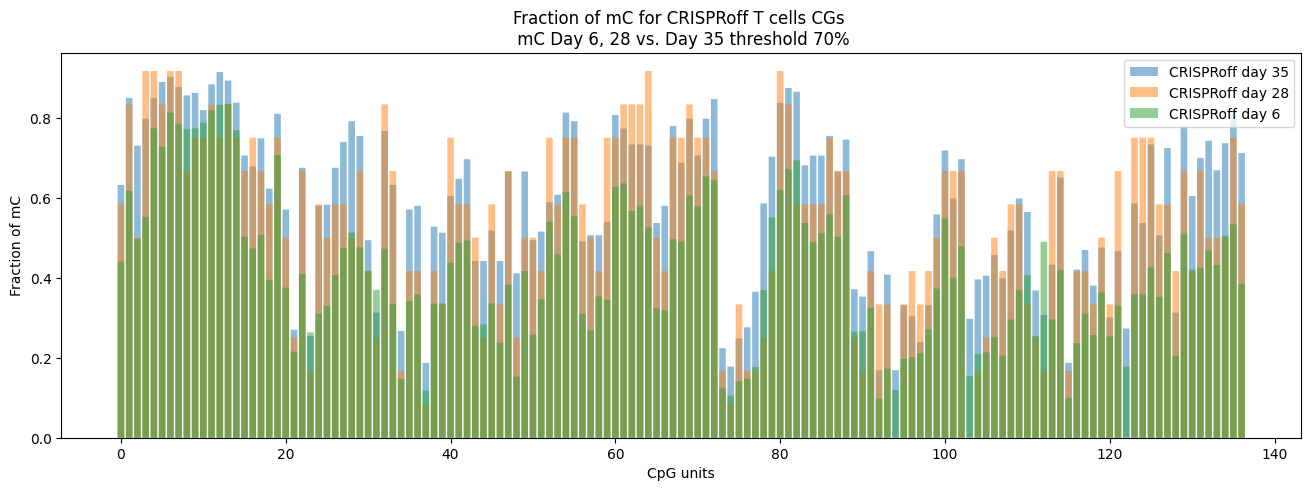

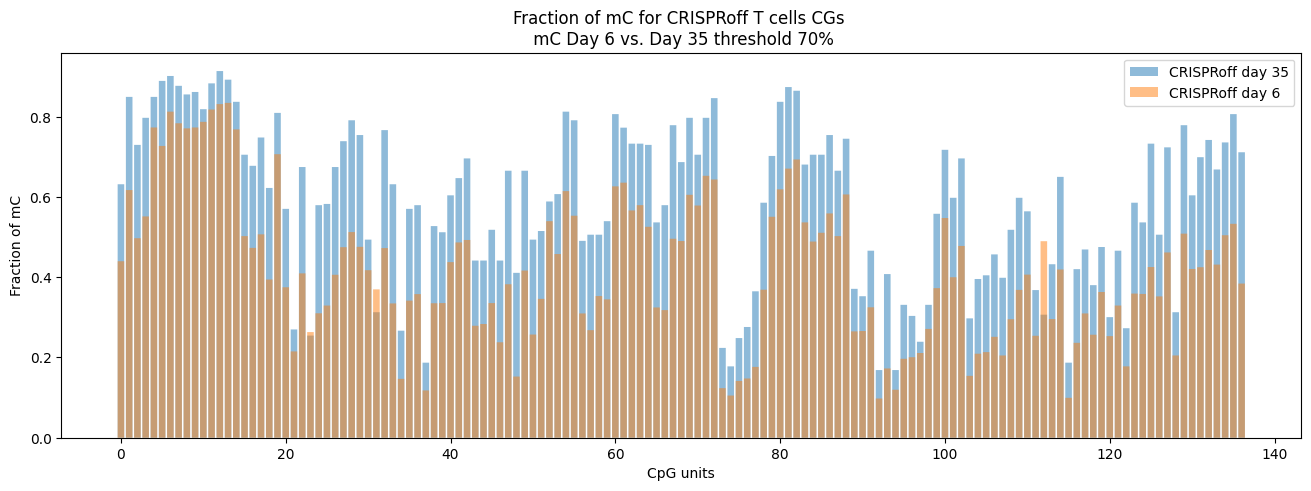

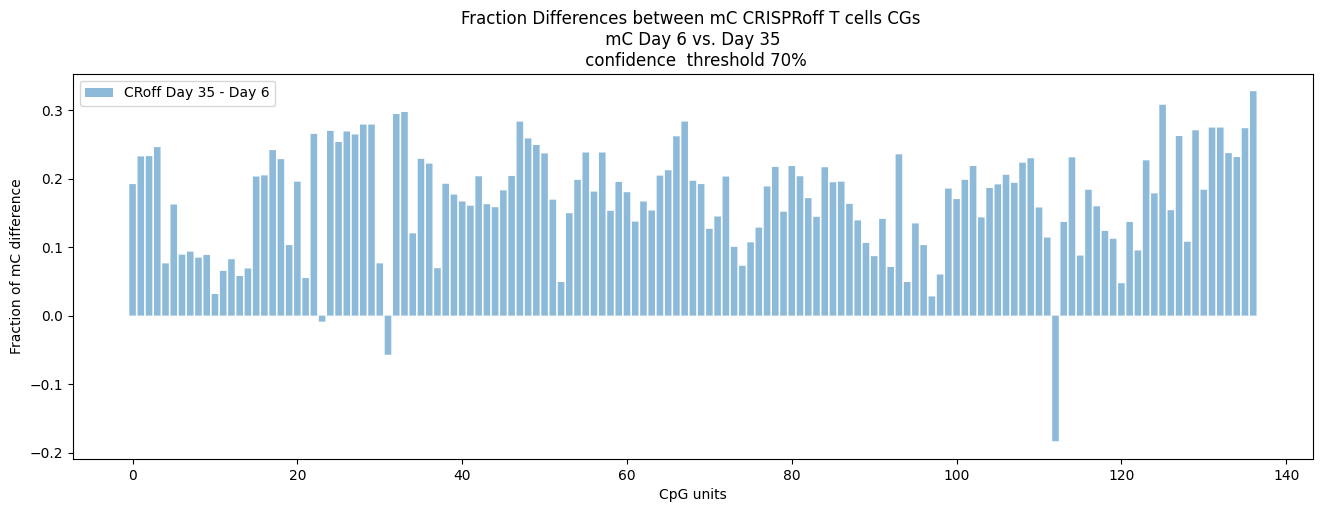

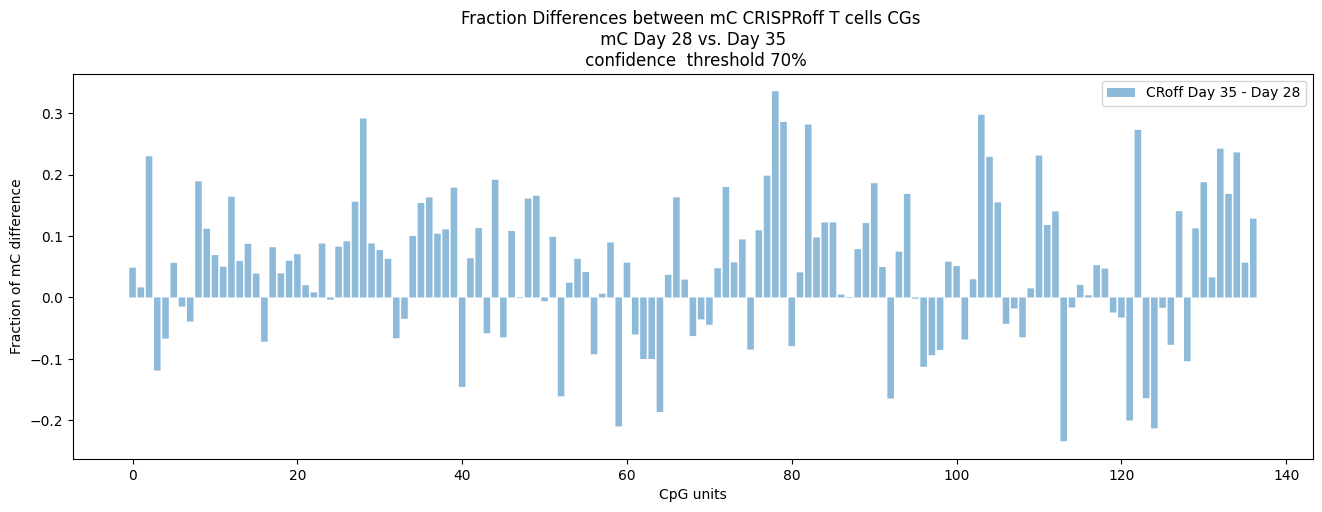

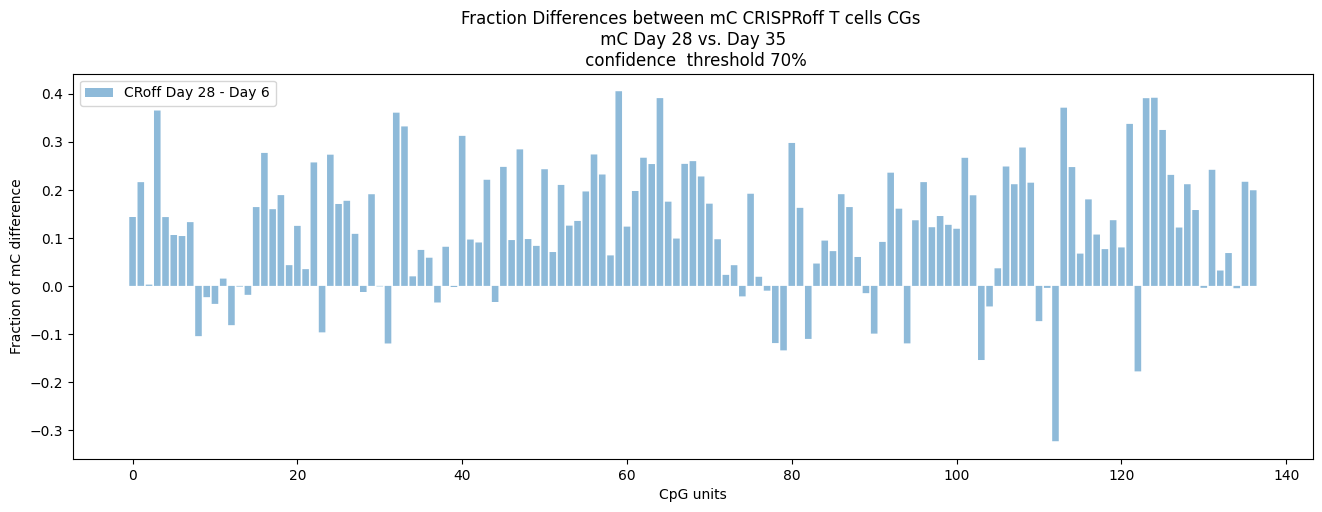

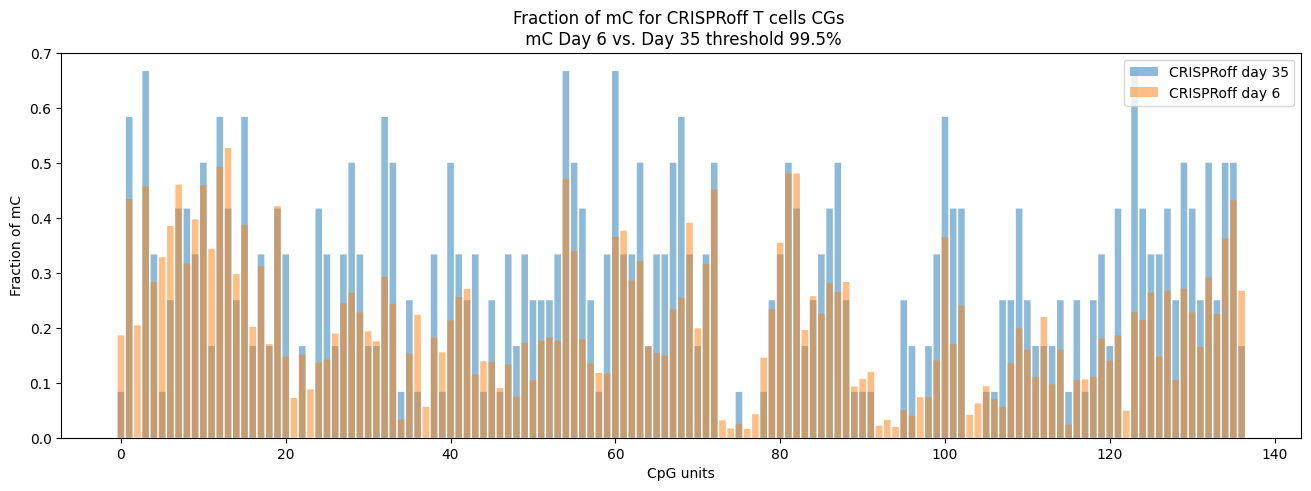

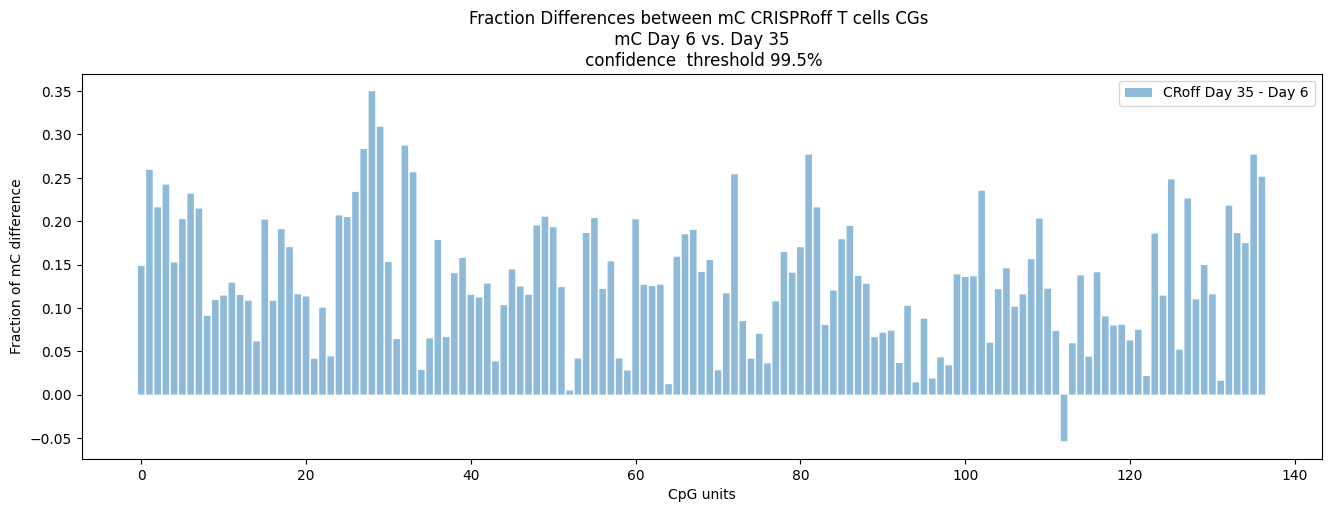

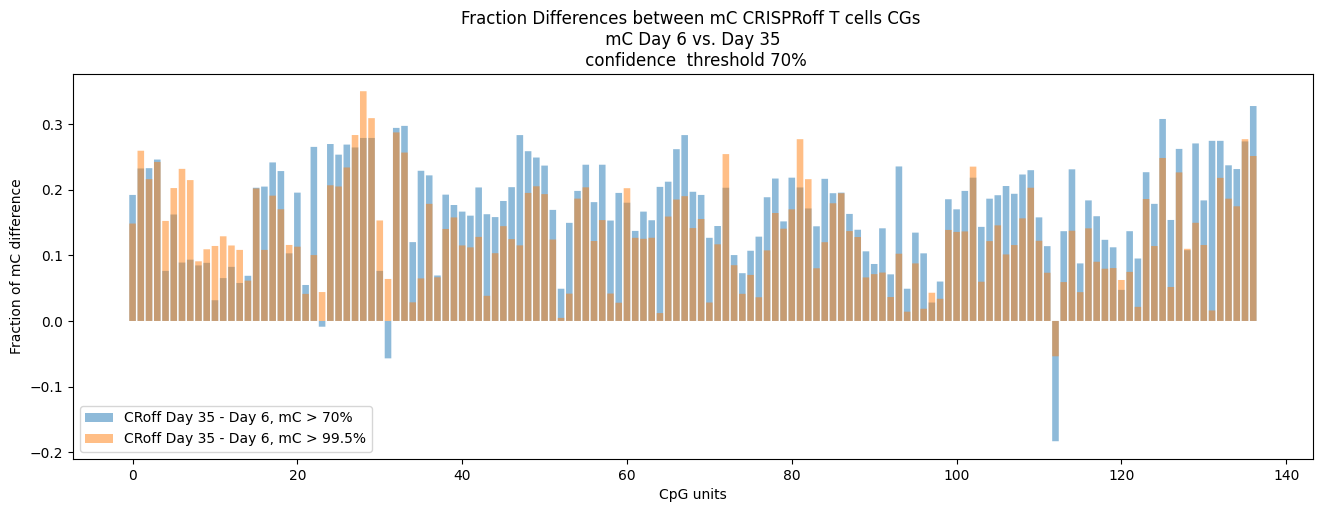

In [119]:

# Day 35 vs Day 6
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_mc07_fracs)), CGs_D35_CRoff_mc07_fracs, snap=False, alpha=0.5, label='CRISPRoff day 35')
plt.bar(np.arange(len(CGs_D28_CRoff_mc07_fracs)), CGs_D28_CRoff_mc07_fracs, snap=False, alpha=0.5, label='CRISPRoff day 28')
plt.bar(np.arange(len(CGs_D6_CRoff_mc07_fracs)), CGs_D6_CRoff_mc07_fracs, snap=False, alpha=0.5, label='CRISPRoff day 6')
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPRoff T cells CGs \n mC Day 6, 28 vs. Day 35 threshold 70%')
plt.legend()
plt.show()

# Day 35 vs Day 6
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_mc07_fracs)), CGs_D35_CRoff_mc07_fracs, snap=False, alpha=0.5, label='CRISPRoff day 35')
plt.bar(np.arange(len(CGs_D6_CRoff_mc07_fracs)), CGs_D6_CRoff_mc07_fracs, snap=False, alpha=0.5, label='CRISPRoff day 6')
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPRoff T cells CGs \n mC Day 6 vs. Day 35 threshold 70%')
plt.legend()
plt.show()
# DIFFERENCES
dif_mCthresh_CRoff_D35_D6_07 = CGs_D35_CRoff_mc07_fracs  - CGs_D6_CRoff_mc07_fracs
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_D35_D6_07)), dif_mCthresh_CRoff_D35_D6_07, snap=False, alpha=0.5, label='CRoff Day 35 - Day 6' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff T cells CGs \n mC Day 6 vs. Day 35 \n confidence  threshold 70%')
plt.legend()
plt.show()
# DIFFERENCES
dif_mCthresh_CRoff_D35_D28_07 = CGs_D35_CRoff_mc07_fracs - CGs_D28_CRoff_mc07_fracs
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_D35_D28_07)), dif_mCthresh_CRoff_D35_D28_07, snap=False, alpha=0.5, label='CRoff Day 35 - Day 28' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff T cells CGs \n mC Day 28 vs. Day 35 \n confidence  threshold 70%')
plt.legend()
plt.show()

# DIFFERENCES
dif_mCthresh_CRoff_D28_D6_07 = CGs_D28_CRoff_mc07_fracs - CGs_D6_CRoff_mc07_fracs
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_D28_D6_07)), dif_mCthresh_CRoff_D28_D6_07, snap=False, alpha=0.5, label='CRoff Day 28 - Day 6' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff T cells CGs \n mC Day 28 vs. Day 35 \n confidence  threshold 70%')
plt.legend()
plt.show()

# Day 35 vs Day 6
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_mc0995_fracs)), CGs_D28_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='CRISPRoff day 35')
plt.bar(np.arange(len(CGs_D6_CRoff_mc0995_fracs)), CGs_D6_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='CRISPRoff day 6')
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPRoff T cells CGs \n mC Day 6 vs. Day 35 threshold 99.5%')
plt.legend()
plt.show()
# DIFFERENCES
dif_mCthresh_CRoff_D35_D6_0995 = CGs_D35_CRoff_mc0995_fracs - CGs_D6_CRoff_mc0995_fracs
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_D35_D6_0995)), dif_mCthresh_CRoff_D35_D6_0995, snap=False, alpha=0.5, label='CRoff Day 35 - Day 6' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff T cells CGs \n mC Day 6 vs. Day 35 \n confidence  threshold 99.5%')
plt.legend()
plt.show()


# DIFFERENCES
dif_mCthresh_CRoff_D35_D6_07 = CGs_D35_CRoff_mc07_fracs  - CGs_D6_CRoff_mc07_fracs
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_D35_D6_07)), dif_mCthresh_CRoff_D35_D6_07, snap=False, alpha=0.5, label='CRoff Day 35 - Day 6, mC > 70%' )
plt.bar(np.arange(len(dif_mCthresh_CRoff_D35_D6_0995)), dif_mCthresh_CRoff_D35_D6_0995, snap=False, alpha=0.5, label='CRoff Day 35 - Day 6, mC > 99.5%' )

plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff T cells CGs \n mC Day 6 vs. Day 35 \n confidence  threshold 70%')
plt.legend()
plt.show()